In [1]:
%%javascript
/** Below because this notebook is pretty large */
var rto = 180;
console.log('NB: Increase require timeout to ' + rto + ' seconds');
window.requirejs.config({waitSeconds: rto}); 

<IPython.core.display.Javascript object>

<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>

___

<a href="https://lms.clarusway.com/mod/lesson/view.php?id=8511&pageid=8142&startlastseen=no"><img align="left" src="https://i.ibb.co/6Z5pQxD/lmss.png" alt="Open in Clarusway LMS" width="70" height="200" title="Open Clarusway Learning Management Sytem"></a>

<a href=""><img align="right" src="https://i.ibb.co/n3HWyQX/github-logo.png" alt="Open in Clarusway GitHub" width="100" height="150" title="Open and Execute in Clarusway GitHub Repository"></a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/b5xXg11/used-cars1.jpg width="1100" height="100">

[Image Credit](https://myscriptneedshelp.com/2022/auto/buying-used-cars-in-tempe-is-easier-now/)

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [PART-03 (HANDLING WITH OUTLIERS)](#1)
* [THE EXAMINATION OF OUTLIERS IN THE COLUMNS](#2)
* [SOME SPECIFIC OUESTIONS ON ANALYSIS](#3)    
* [AN ANALYSIS OF INFERENTIAL STATISTICS/HYPOTHESIS TESTING ON SOME SPECIFIC FEATURES](#4)    
* [DUMMY OPERATION](#5)    
* [THE END OF DATA CLEANING (PART - 03)](#6)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy, Pandas & other related you can import them as a library:

In [2]:
# !pip install termcolor

In [3]:
# conda install geopandas  # you have to install it at Anaconda Prompt
# conda install -c conda-forge geopy  # you have to install it at Anaconda Prompt
# !pip install shapely
# conda install descartes  
# !pip install descarteslabs[complete]
# !pip install -U scikit-learn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize
import re

import requests
# import geopy
# from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 2000
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_rows', df.shape[0]+1)
pd.options.display.max_columns = 150

## User Defined Functions (DEFs) to fill the missing values

In [5]:
def first_looking(df, col):
    """
    Prints basic information about a column in a Pandas DataFrame.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to analyze.
    col : str
        The name of the column to analyze.

    Returns:
    --------
    None.

    Prints:
    -------
    column name    : str
        The name of the column being analyzed.
    per_of_nulls   : float
        The percentage of null values in the column.
    num_of_nulls   : int
        The number of null values in the column.
    num_of_uniques : int
        The number of unique values in the column.
    shape_of_df    : tuple
        The shape of the DataFrame.
    The unique values in the column and their frequency of occurrence.
    """
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum() * 100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].astype(str).nunique())
    print("shape_of_df    : ", df.shape)
    print("--------------------------------")
    print(df[col].value_counts(dropna=False))

In [6]:
def fill_most_freq(df, group_col, col_name):
    """
    Fills missing values in a column of a Pandas DataFrame `df` with the most frequent value 
    in each group defined by a grouping column.

    Parameters:
    df (pandas.DataFrame): The DataFrame to operate on.
    group_col (str): The name of the grouping column.
    col_name (str): The name of the column to fill missing values in.

    Returns:
    None.

    Prints:
    - The name of the column that was filled.
    - The percentage of null values in the column after filling.
    - The number of null values in the column after filling.
    - The number of unique values in the column after filling.
    - The value counts for each unique value in the column after filling, including null values, sorted by index.
    """    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    
    print("COLUMN NAME    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna = False).sort_index())

In [7]:
def fill_prop(df, group_col, col_name):
    """
    Fills missing values in a column of a Pandas DataFrame `df` using forward and backward fill based on a grouping column.

    Parameters:
    df (pandas.DataFrame): The DataFrame to operate on.
    group_col (str): The name of the grouping column.
    col_name (str): The name of the column to fill missing values in.

    Returns:
    None.

    Prints:
    - The name of the column that was filled.
    - The percentage of null values in the column after filling.
    - The number of null values in the column after filling.
    - The number of unique values in the column after filling.
    - The value counts for each unique value in the column after filling, including null values, sorted by index.
    """    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("COLUMN NAME    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna = False).sort_index())

In [8]:
def fill(df, group_col1, group_col2, col_name, method):
    """
    Fills missing values in a column of a Pandas DataFrame `df` based on double-stage grouping and a specified filling method.

    Parameters:
    df (pandas.DataFrame): The DataFrame to operate on.
    group_col1 (str): The name of the first grouping column.
    group_col2 (str): The name of the second grouping column.
    col_name (str): The name of the column to fill missing values in.
    method (str): The filling method to use. Can be "mode", "mean", "median", "ffill", or "bfill".

    Returns:
    None.

    Prints:
    None.
    """
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    elif method == "mean":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df[col_name].mean(), inplace = True)
        
    elif method == "median":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df[col_name].median(), inplace = True)
        
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("COLUMN NAME    : ", col_name)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col_name].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col_name].isnull().sum())
    print("num_of_uniques : ", df[col_name].nunique())
    print("--------------------------------")
    print(df[col_name].value_counts(dropna = False).sort_index())

In [9]:
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outliers_tukey(df, col_name):
    """
    Drops outliers from a Pandas DataFrame based on the Tukey's Fence Rule for a specific feature.
    
    Parameters:
    df (Pandas DataFrame): The input DataFrame.
    feature (str): The name of the feature to use for outlier detection.
    
    Returns:
    Pandas DataFrame: The DataFrame with the outliers removed.
    """    
    print("Number of rows before dropping outliers:", len(df))
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1  # Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
    df.reset_index(drop=True, inplace=True)
    print("Number of rows after dropping outliers:", len(df))
    return df

In [10]:
def drop_outliers_zscore(df, feature, threshold=3):
    """
    Drops outliers from a Pandas DataFrame based on the z-score of a specific feature.
    
    Parameters:
    df (Pandas DataFrame): The input DataFrame.
    feature (str): The name of the feature to use for outlier detection.
    threshold (float, optional): The threshold value for the z-score. Defaults to 3.
    
    Returns:
    Pandas DataFrame: The DataFrame with the outliers removed.
    """
    # Print the number of rows before dropping outliers
    print("Number of rows before dropping outliers:", len(df))
    
    # Calculate the z-scores for the feature
    z_scores = np.abs((df[feature] - df[feature].mean()) / df[feature].std())

    # Drop the rows with z-scores above the threshold
    df = df[z_scores < threshold]

    # Drop the rows with z-scores above the threshold
    df.reset_index(drop=True, inplace=True)
    
    # Print the number of rows after dropping outliers
    print("Number of rows after dropping outliers:", len(df))
    
    return df.info()

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">PART - 03 (Handling with Outliers)</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## What is an Outlier?

In simple terms, an outlier is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in a data graph or dataset you're working with.

Outliers are extreme values that stand out greatly from the overall pattern of values in a dataset or graph.

There are various ways handling with outliers. Please have a look at below link for further information.

**🧐 [Detecting and Treating Outliers | Treating the odd one out!](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/)**<br>
**🧐 [Detect and Remove the Outliers using Python](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/)**<br>
**🧐 [How to Remove Outliers for Machine Learning](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)**<br>

Outliers are often mischievous. Outliers in regression are observations that fall far from the "cloud" of points. These points are especially important because they can have a strong influence on the least squares line. So, they have the potential to disrupt an otherwise simple process of regression by introducing themselves as data that is as equally important as the rest, often skewing the fitted model.

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:75%; text-align:center; border-radius:10px 10px;">Linear Regression Model WITH Outliers</p>
<img src=https://i.ibb.co/nfzhxb2/with-outliers.png width="250" height="100">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:75%; text-align:center; border-radius:10px 10px;">Linear Regression Model WITHOUT Outliers</p>
<img src=https://i.ibb.co/dmkccDB/witout-outliers.png width="250" height="100">

**🧐 [Types of Outliers in Linear Regression](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_OpenIntro_Statistics_(Diez_et_al)./07%3A_Introduction_to_Linear_Regression/7.04%3A_Types_of_Outliers_in_Linear_Regression#:~:text=Outliers%20in%20regression%20are%20observations,on%20the%20least%20squares%20line.)**<br>
**🧐 [When Outliers are Significant: Weighted Linear Regression](https://towardsdatascience.com/when-outliers-are-significant-weighted-linear-regression-bcdc8389ab10)**<br>
**🧐 [Dealing with Outliers Using Three Robust Linear Regression Models](https://developer.nvidia.com/blog/dealing-with-outliers-using-three-robust-linear-regression-models/)**<br>

In [11]:
df0 = pd.read_csv("filled_scout2022.csv")
df = df0.copy()

**Before diving into our analysis, let's first explore how our DataFrame/Dataset looks like:**

In [12]:
df.head(3).T

0  \
make_model                                                   Mercedes-Benz A 160   
make                                                               Mercedes-Benz   
model                                                                      A 160   
location                       P.I. EL PALMAR C/FORJA 6,  11500 PUERTO DE SAN...   
price                                                                   16950.00   
body_type                                                                Compact   
type                                                                        Used   
doors                                                                       5.00   
warranty                                                                     Yes   
mileage                                                                120200.00   
gearbox                                                                   Manual   
fuel_type                                                                 Diesel   
seller                                                                    Dealer   
seats                                                                       5.00   
engine_size                                                              1595.00   
gears                                                                       6.00   
co_emissions                                                               98.00   
drivetrain                                                                 Front   
extras                                                              Alloy wheels   
empty_weight                                                             1270.00   
full_service_history                                                          No   
upholstery                                                                 Cloth   
previous_owner                                                              2.00   
energy_efficiency_class                                                efficient   
age                                                                         6.00   
power_kW                                                                   75.00   
cons_avg                                                                    3.80   
comfort_&_convenience_Package                                           Standard   
entertainment_&_media_Package                                     Standard Media   
safety_&_security_Package                            Safety Premium Plus Package   

                                                                               1  \
make_model                                                 Mercedes-Benz Eqe 350   
make                                                               Mercedes-Benz   
model                                                                    Eqe 350   
location                            APARTADO DE CORREOS 1032,  26140 LOGROÑO, ES   
price                                                                   80900.00   
body_type                                                                Compact   
type                                                              Pre-registered   
doors                                                                       4.00   
warranty                                                                     Yes   
mileage                                                                  5000.00   
gearbox                                                                Automatic   
fuel_type                                                               Electric   
seller                                                                    Dealer   
seats                                                                       5.00   
engine_size                                                                 1.00   
gears                                                                       9.00   
co_emissions                                  

In [13]:
# pd.set_option('display.max_rows', df.shape[0]+1)

df.shape

(28624, 30)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28624 entries, 0 to 28623
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     28624 non-null  object 
 1   make                           28624 non-null  object 
 2   model                          28624 non-null  object 
 3   location                       28624 non-null  object 
 4   price                          28624 non-null  float64
 5   body_type                      28624 non-null  object 
 6   type                           28624 non-null  object 
 7   doors                          28624 non-null  float64
 8   warranty                       28624 non-null  object 
 9   mileage                        28624 non-null  float64
 10  gearbox                        28624 non-null  object 
 11  fuel_type                      28624 non-null  object 
 12  seller                         28624 non-null 

In [15]:
# Let's first explore if there has been any problem with data types of Columns in the DataFrame

class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

def check_obj_columns(df):
    '''
    Returns NO PROBLEM or column/s which has/have mixed object types.
    '''    
    
    tdf = df.select_dtypes(include=['object']).applymap(type)
    for col in tdf:
        if len(set(tdf[col].values)) > 1:
            print("Column" + " " + color.BOLD + color.RED + col + color.END + " " + "has mixed object types." )
    else:
        if len(set(tdf[col].values)) == 1:
            print(color.BOLD + color.GREEN + " " + "NO PROBLEM" + " " + color.END + " " + "with the data types of Columns in the DataFrame.")

check_obj_columns(df)

 NO PROBLEM  with the data types of Columns in the DataFrame.


In [16]:
# Let's explore the percentage of missing values in each column

df.isnull().sum()*100 / df.shape[0]

make_model                      0.00
make                            0.00
model                           0.00
location                        0.00
price                           0.00
body_type                       0.00
type                            0.00
doors                           0.00
warranty                        0.00
mileage                         0.00
gearbox                         0.00
fuel_type                       0.00
seller                          0.00
seats                           0.00
engine_size                     0.00
gears                           0.00
co_emissions                    0.00
drivetrain                      0.00
extras                          0.00
empty_weight                    0.00
full_service_history            0.00
upholstery                      0.00
previous_owner                  0.00
energy_efficiency_class         0.00
age                             0.00
power_kW                        0.00
cons_avg                        0.00
c

In [17]:
# Let's check if there has been any duplicate value in the DataFrame

df.duplicated(keep=False).sum()

3807

In [18]:
# Let's assign Columns to a new object named numeric_col 

numeric_col = df.select_dtypes(include="number")
display(numeric_col.columns)
numeric_col

Index(['price', 'doors', 'mileage', 'seats', 'engine_size', 'gears',
       'co_emissions', 'empty_weight', 'previous_owner', 'age', 'power_kW',
       'cons_avg'],
      dtype='object')

price  doors   mileage  seats  engine_size  gears  co_emissions  \
0     16950.00   5.00 120200.00   5.00      1595.00   6.00         98.00   
1     80900.00   4.00   5000.00   5.00         1.00   9.00          0.00   
2     69900.00   5.00  18900.00   5.00      1991.00   8.00        162.00   
3     46990.00   5.00  18995.00   5.00      1991.00   7.00        169.00   
4     16800.00   5.00 197000.00   5.00      2143.00   7.00        162.00   
...        ...    ...       ...    ...          ...    ...           ...   
28619 37600.00   4.00  40345.00   4.00      1969.00   8.00        127.00   
28620  5499.00   4.00 145000.00   5.00      2435.00   5.00        217.00   
28621  7300.00   3.00  96000.00   4.00      1560.00   6.00         99.00   
28622 29900.00   4.00  94343.00   5.00      1969.00   8.00        149.00   
28623  4440.00   4.00 230047.00   5.00      2922.00   6.00        251.00   

       empty_weight  previous_owner   age  power_kW  cons_avg  
0           1270.00            2.00  6.00     75.00      3.80  
1           2355.00            1.00  0.00    215.00      2.36  
2           1555.00            2.00  2.00    310.00      8.40  
3           1455.00            2.00  2.00    225.00      7.30  
4           1545.00            2.00  7.00    100.00      4.90  
...             ...             ...   ...       ...       ...  
28619       2077.00            2.00  3.00    288.00      2.00  
28620       1357.00            3.00 18.00    125.00      9.10  
28621       1356.00            1.00 11.00     84.00      3.80  
28622       1617.00            1.00  5.00    187.00      6.50  
28623       1573.00            5.00 20.00    147.00     10.40  

[28624 rows x 12 columns]

In [232]:
# pd.api.types.is_numeric_dtype(df["seats"])

By looking at the above points, we can say that the outliers are the values that are far from the dense population. When working with the categorical data we may find the fault modelling condition when the data is biased with one or some categories while the number of categories present in the data is larger. However, there is no such concept of an outlier in the categorical data but categories with very lower or very higher frequency than the other categories can be considered as outliers in the categorical data.

**SPECIAL READING 🧐 [Outliers in the categorical data](https://analyticsindiamag.com/how-to-detect-and-treat-outliers-in-categorical-data/#:~:text=However%2C%20there%20is%20no%20such,outliers%20in%20the%20categorical%20data.)**<br>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">The Examination of OUTLIERS in the Columns</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**🤔 Outlier — Why is it important❓**

What is Outlier? According to **🧐 [Wikipedia](https://en.wikipedia.org/wiki/Outlier#:~:text=In%20statistics%2C%20an%20outlier%20is,excluded%20from%20the%20data%20set.)**, "Outlier is a data point in the dataset that differs significantly from the other data or observations...The outlier is inherently different than Noise. While Outlier is a data that significantly different compared to the other data, Noise is a random error or variance. The outlier is part of the data, but Noise is just a random error (could be mislabeled or mistake or even missing data)".

Many parametric statistics, like mean, correlations, and every statistic based on these is sensitive to outliers. Since the assumptions of standard statistical procedures or models, such as linear regression and ANOVA also based on the parametric statistic, outliers can mess up your analysis...

**🧐 [SOURCE - Outlier — Why is it important?](https://towardsdatascience.com/outlier-why-is-it-important-af58adbefecc)**

## price (Target/Label Variable)

In [19]:
# Let's explore basic information about "price"

first_looking(df, "price")

column name    :  price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  5021
shape_of_df    :  (28624, 30)
--------------------------------
price
14990.00    222
12990.00    218
16990.00    186
19990.00    166
9990.00     160
           ... 
19112.00      1
30465.00      1
18461.00      1
22649.00      1
4440.00       1
Name: count, Length: 5021, dtype: int64


A boxplot is a way of summarizing a set of data measured on an interval scale. It is often used in exploratory data analysis. It is a type of graph which is used to show the shape of the distribution, its central value, and variability.

The following boxplot represents car prices of different makes and models. This boxplot is NOT using a common rule of 1.5 IQR, rather applying for 3.0 IQR that points out the values could be assumed as extreme if they lie more than 3.0 IQR from the nearer quartile. 

**However**, it should be noted that there is no universal agreement on what an "extreme value" is, exactly. And, in practice, it depends on context. What that means is specific to the dataset and the goals of the analysis, so any Data Scientist should be hesitant to perform an outlier removal to any dataset. On the other hand, what this box plot tells us is: skewness is so marked that one might assume to transform them! 

In [20]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [21]:
# Let's explore Descriptive Satatistics on "price"

display(df.price.describe())

# Differences between intervals
diff1 = df.price.describe()['mean'] - df.price.describe()['std']
diff2 = df.price.describe()['25%'] - df.price.describe()['min']
diff3 = df.price.describe()['max'] - df.price.describe()['75%']

print(f"The difference between the {color.BOLD + color.BLUE}mean value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['mean']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}standard deviation{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['std']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff1:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}25th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['25%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}minimum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['min']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff2:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}75th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['75%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}maximum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['max']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff3:.2f}{color.RED + color.END}.")

count    28624.00
mean     23471.82
std      23955.70
min        490.00
25%      11990.00
50%      17979.00
75%      27990.00
max     999999.00
Name: price, dtype: float64

The difference between the mean value (23471.82) and the standard deviation (23955.70) is -483.88.
The difference between the 25th percentile (11990.00) and the minimum value (490.00) is 11500.00.
The difference between the 75th percentile (27990.00) and the maximum value (999999.00) is 972009.00.


#### The distribution of prices 

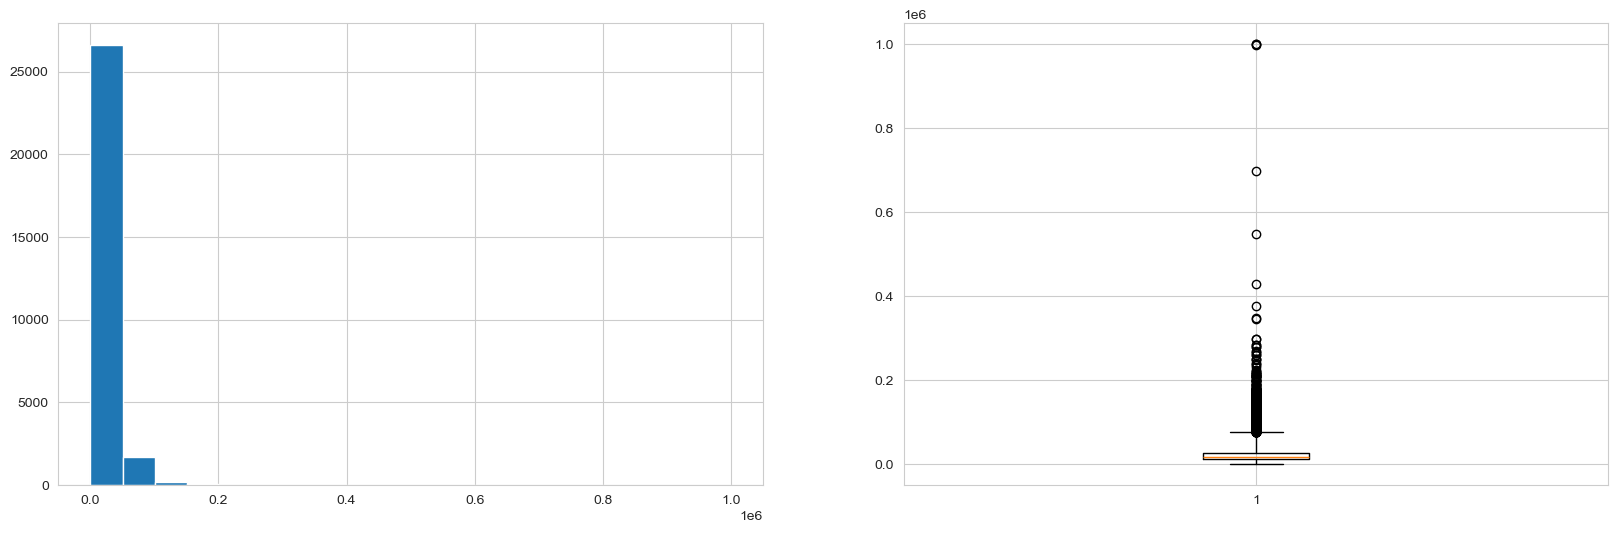

In [22]:
# Let's check how the observations in "price" feature are distributed via Histogram and Boxplot

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

In [23]:
# Let's examine the first highest 20 observation in "price" to see if there have been some extreme values away from others

df.sort_values(by=["price"], ascending=False)["price"].head(20)

# df.price.sort_values().head(20)

27798   999999.00
28178   999999.00
21913   998000.00
1212    696900.00
21547   549000.00
21600   430000.00
1317    375900.00
21921   349000.00
1305    344900.00
1451    299000.00
1076    299000.00
1595    284780.00
710     283900.00
1444    279063.00
1114    279000.00
1320    268900.00
1413    267810.00
19310   264900.00
1397    259880.00
1587    259000.00
Name: price, dtype: float64

In [24]:
# Let's examine the first lowest 20 observation in "price" to see if there have been some extreme values away from others

df.sort_values(by=["price"], ascending=True)["price"].head(20)

# df.price.sort_values().tail(20)

5846    490.00
19561   500.00
5513    500.00
17513   590.00
5351    600.00
5291    600.00
5296    699.00
3375    700.00
23786   700.00
5519    740.00
5279    750.00
24540   750.00
7810    750.00
20110   750.00
7833    790.00
5629    790.00
6459    790.00
2504    790.00
3149    799.00
5272    800.00
Name: price, dtype: float64

<div style="background-color: #ffeeba; padding: 10px; font-size: 16px; font-weight: bold;">
    As seen above dataset has some unexpected values of 999999.000.
</div>

**What might a data entry of 999999 mean?**

In general, a data entry of 999999 could have different meanings depending on the context and the data being entered. However, in many cases, 999999 is used as a <b>placeholder</b> OR a <b>default value to indicate missing or incomplete data</b>. Here are a few examples:

  - <u>In financial or accounting systems</u>, 999999 may be used to indicate a blank or missing account number or transaction code.

  - <u>In data processing or data analysis</u>, 999999 may be used to indicate a null value or a missing data point.

  - <u>In survey research or data collection</u>, 999999 may be used to indicate that a respondent declined to answer a question or left a question unanswered.

  - <u>In some programming languages or systems</u>, 999999 may be used as a sentinel or marker value to indicate the end of a file or a data stream.

It's important to note that the meaning of 999999 may vary depending on the specific system or context in which it is used. In any case, it's generally a good idea to consult the documentation or the data source to understand the meaning of the value in the specific context.

So, this kind of missing value code should be a value that could NOT possibly show up as a true data value in the dataset. Sometimes, codes such as "-999999" or "999999" are used so that the code is easy to recognize when you scan a column of data. Any integer value can be used, including negative numbers.

In [25]:
# Let's pick up the indeces of the lowest 20 observations to dive deep into examination

df.price.sort_values().tail(20).index[:20]

Index([ 1587,  1397, 19310,  1413,  1320,  1114,  1444,   710,  1595,  1076,
        1451,  1305, 21921,  1317, 21600, 21547,  1212, 21913, 27798, 28178],
      dtype='int64')

In [26]:
df.iloc[[1587,  1397, 19310,  1413,  1320,  1114,  1444,   710,  1595,  1076,
        1451,  1305, 21921,  1317, 21600, 21547,  1212, 21913, 27798, 28178]]

make_model           make       model  \
1587     Mercedes-Benz G 63 Amg  Mercedes-Benz    G 63 Amg   
1397     Mercedes-Benz G 63 Amg  Mercedes-Benz    G 63 Amg   
19310            Nissan Skyline         Nissan     Skyline   
1413     Mercedes-Benz G 63 Amg  Mercedes-Benz    G 63 Amg   
1320     Mercedes-Benz G 63 Amg  Mercedes-Benz    G 63 Amg   
1114          Mercedes-Benz Sls  Mercedes-Benz         Sls   
1444     Mercedes-Benz G 63 Amg  Mercedes-Benz    G 63 Amg   
710        Mercedes-Benz Amg Gt  Mercedes-Benz      Amg Gt   
1595     Mercedes-Benz G 63 Amg  Mercedes-Benz    G 63 Amg   
1076   Mercedes-Benz Gle 63 Amg  Mercedes-Benz  Gle 63 Amg   
1451   Mercedes-Benz Gle 63 Amg  Mercedes-Benz  Gle 63 Amg   
1305     Mercedes-Benz G 63 Amg  Mercedes-Benz    G 63 Amg   
21921                Ford Rs200           Ford       Rs200   
1317     Mercedes-Benz G 63 Amg  Mercedes-Benz    G 63 Amg   
21600                   Ford Gt           Ford          Gt   
21547                   Ford Gt           Ford          Gt   
1212     Mercedes-Benz G 63 Amg  Mercedes-Benz    G 63 Amg   
21913                   Ford Gt           Ford          Gt   
27798                 Volvo 240          Volvo         240   
28178                 Volvo 240          Volvo         240   

                                                location     price  \
1587        Meckenheimer Straße 12,  53359 Rheinbach, DE 259000.00   
1397          Pankofen-Irlwiesen 3,  94447 Plattling, DE 259880.00   
19310  CTRA. DE RUBI, 88 (EDIFICIO CAN CASTANYER),  8... 264900.00   
1413        Hallesche Straße  150,  99734 Nordhausen, DE 267810.00   
1320   Poligono Industrial Sud, sector P3 Nave 10,  8... 268900.00   
1114   Wagenzeller Str.13,  30855 Langenhagen / Kalte... 279000.00   
1444      Frankfurter Straße 49,  38122 Braunschweig, DE 279063.00   
710    Halbenrainer Straße 10,  8490 Bad Radkersburg, AT 283900.00   
1595             Landshuter Str. 1,  94315 Straubing, DE 284780.00   
1076        Viernheimer Strasse 100,  69469 Weinheim, DE 299000.00   
1451        Viernheimer Strasse 100,  69469 Weinheim, DE 299000.00   
1305   Poligono Industrial Sud, sector P3 Nave 10,  8... 344900.00   
21921                                     53225 Bonn, DE 349000.00   
1317   Poligono Industrial Sud, sector P3 Nave 10,  8... 375900.00   
21600  CALLE SAN JUAN DE LA SALLE Nº 4,  28036 MADRID... 430000.00   
21547         Rather Straße 78-80,  40476 Düsseldorf, DE 549000.00   
1212   Poligono Industrial Sud, sector P3 Nave 10,  8... 696900.00   
21913             Avda/Gran vía nº 22,  30008 MURCIA, ES 998000.00   
27798           Zuiderdiep 408,  7876 AW VALTHERMOND, NL 999999.00   
28178           Zuiderdiep 408,  7876 AW VALTHERMOND, NL 999999.00   

              body_type            type  doors warranty   mileage    gearbox  \
1587   Off-Road/Pick-Up            Used   5.00      Yes   4003.00  Automatic   
1397   Off-Road/Pick-Up   Demonstration   5.00      Yes   9900.00  Automatic   
19310             Coupe            Used   2.00       No  45000.00     Manual   
1413   Off-Road/Pick-Up   Demonstration   5.00      Yes   3003.00  Automatic   
1320   Off-Road/Pick-Up  Pre-registered   5.00      Yes   1800.00  Automatic   
1114              Coupe            Used   2.00       No  30000.00  Automatic   
1444   Off-Road/Pick-Up   Demonstration   5.00       No   9900.00  Automatic   
710         Convertible            Used   3.00      Yes   3569.00  Automatic   
1595   Off-Road/Pick-Up   Demonstration   5.00      Yes   9900.00  Automatic   
1076              Coupe   Demonstration   4.00       No   8000.00  Automatic   
1451   Off-Road/Pick-Up   Demonstration   4.00       No   8000.00  Automatic   
1305   Off-Road/Pick-Up  Pre-registered   5.00      Yes    100.00  Automatic   
21921             Coupe            Used   2.00       No   4600.00     Manual   
1317   Off-Road/Pick-Up  Pre-registered   5.00      Yes    100.00  Automatic   
21600             Coupe            Used   2.00 

In [27]:
# Let's take a close look at these observations for examining if their prices reflect the reality when compared with their counterparts 

# df.loc[df["make_model"] == "Mercedes-Benz G 63 AMG"][["make_model", "price", "age", "body_type", "mileage", "engine_size", "gears", "drivetrain"]]
# df.loc[df["make_model"] == "Ford GT"][["make_model", "price", "age", "body_type", "mileage", "engine_size", "gears", "drivetrain"]]
# df.loc[df["make_model"] == "Nissan Skyline"][["make_model", "price", "age", "body_type", "mileage", "engine_size", "gears", "drivetrain"]]
# df.loc[df["make_model"] == "Volvo 240"][["make_model", "price", "age", "body_type", "mileage", "engine_size", "gears", "drivetrain"]]


**Let's focus on the price range of "Volvo 240"**

In [28]:
# define a function to highlight the highest, median, and minimum values in a column
def highlight_max_median_min(s):
    is_max = s == s.max()
    is_median = s == s.median()
    is_min = s == s.min()
    return ["background-color: pink" if v else "background-color: lightgreen" if w else "background-color: yellow" if x else "" for v, w, x in zip(is_max, is_median, is_min)]

# filter the DataFrame and apply the styling function
styled_df = df.loc[df["make_model"] == "Volvo 240"][["make_model", "price", "age", "body_type", "mileage", "engine_size", "gears", "drivetrain"]].style.apply(highlight_max_median_min, subset=["price"])

# display the styled DataFrame
styled_df

<div style="background-color: #ffeeba; padding: 10px; font-size: 14px; font-weight: bold;">
    According to Domain Knowledge obtained from dataset itself, there have been anomalies for the price of some observations.
</div>

In [29]:
# Let's pick up the indeces of these observations demonstrating anomaly

indexMercedes = df[(df["make_model"] == "Mercedes-Benz G 63 AMG") & (df['price'] >= 400000)].index
indexVolvo = df[(df["make_model"] == "Volvo 240") & (df['price'] >= 100000)].index
indexFord = df[(df["make_model"] == "Ford GT") & (df['price'] >= 600000)].index
indexNissan = df[(df["make_model"] == "Nissan Skyline") & (df['price'] >= 140000)].index

In [30]:
# Let's drop these observations demonstrating anomaly from the DataFrame

print(df.shape)
df.drop(indexMercedes, inplace=True)
df.drop(indexVolvo, inplace=True)
df.drop(indexFord, inplace=True)
df.drop(indexNissan, inplace=True)
print(df.shape)

(28624, 30)
(28617, 30)


In [31]:
# Let's check again the first lowest 20 observation in "price" to see if there have still been some extreme values away from others

df.price.sort_values().tail(20)

1393    248800.00
1502    249890.00
21955   250000.00
1587    259000.00
1397    259880.00
1413    267810.00
1320    268900.00
1114    279000.00
1444    279063.00
710     283900.00
1595    284780.00
1076    299000.00
1451    299000.00
1305    344900.00
21921   349000.00
1317    375900.00
21600   430000.00
21547   549000.00
1212    696900.00
21913   998000.00
Name: price, dtype: float64

#### The distribution of prices after modification

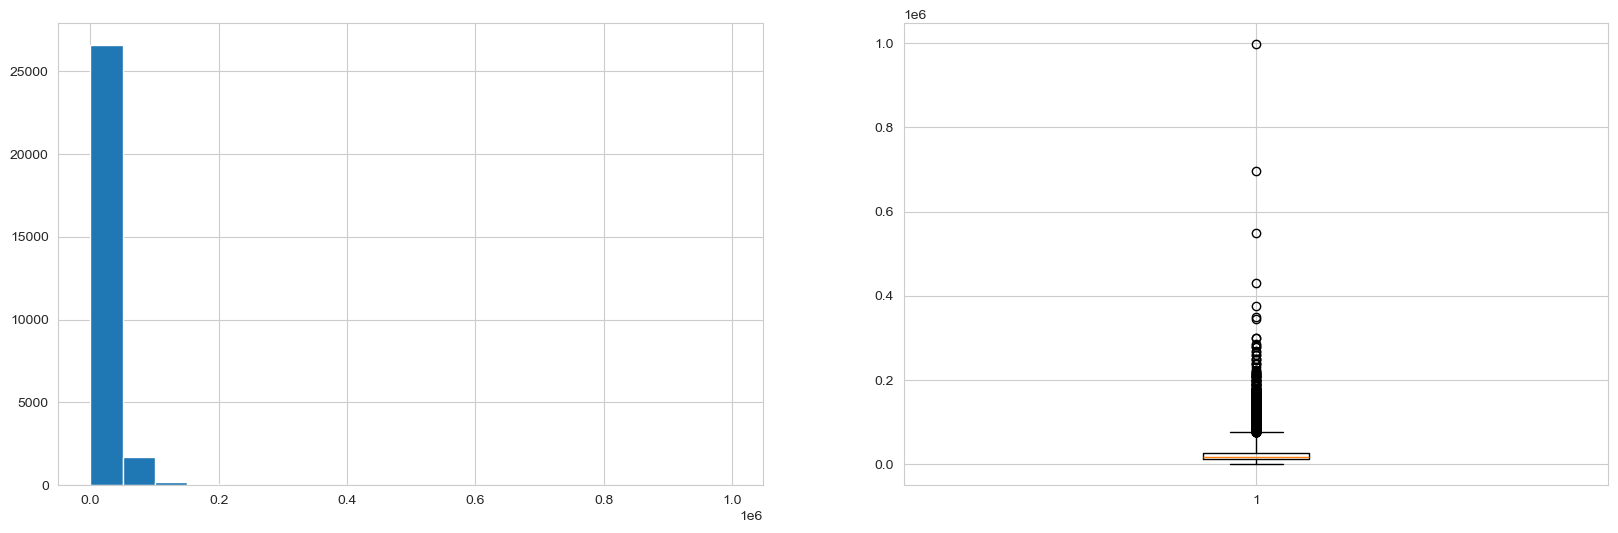

In [32]:
# Let's check again after dropping these observations how the "price" feature is distributed via Histogram and Boxplot

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

In [33]:
# plt.figure(figsize=(16, 6))
# sns.boxplot(x="make_model", y="price", data=df, whis=3)
# plt.show()

<div style="background-color: #ffeeba; padding: 10px; font-size: 14px; font-weight: bold;">
    The distribution of observations in "price" feature still does NOT look quite right. So let's try to handle extreme values using Turkey's Fence Rule.
</div>

In [34]:
# Let's determine the First & Third Quantile and Inter Quantile Range 
# so we can calculate lowest and highest boundries of fence to drop extreme values

print("Number of rows before dropping outliers:", len(df))
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3-q1  # Interquartile range

fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df = df.loc[(df["price"] > fence_low) & (df["price"] < fence_high)]
df.reset_index(drop=True, inplace=True)
print("Number of rows after dropping outliers:", len(df))

Number of rows before dropping outliers: 28617
Number of rows after dropping outliers: 26703


#### The distribution of prices after modification by Tukey's Fence Rule

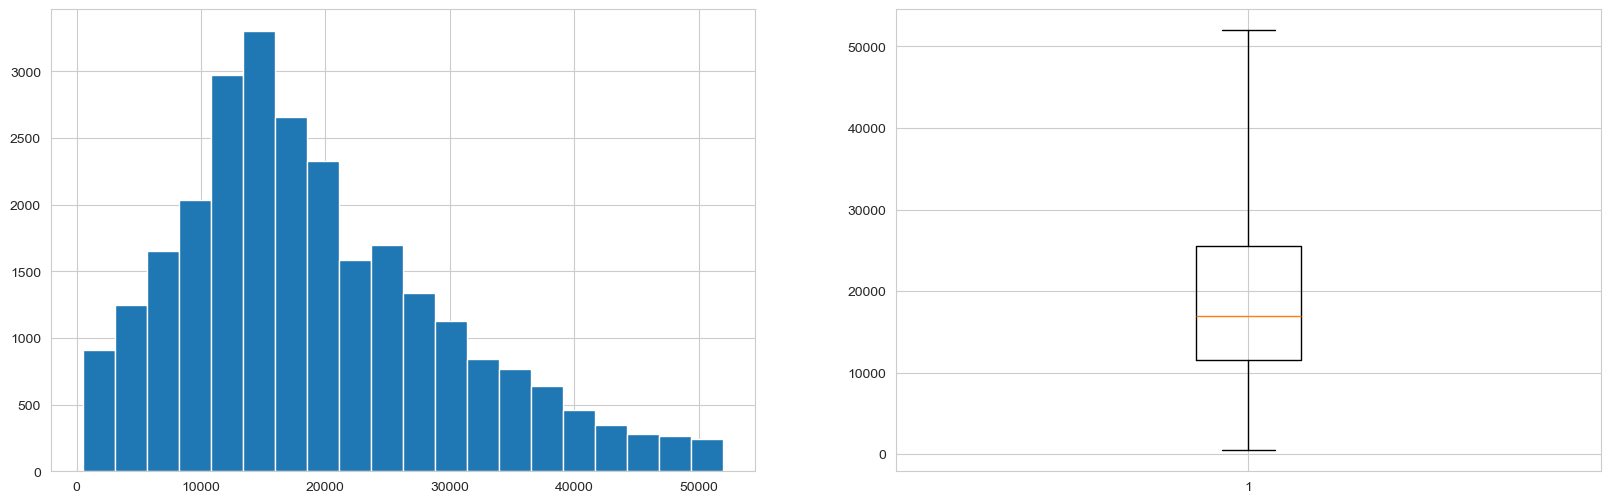

In [35]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

Many methods exist for testing whether a variable has a normal distribution. 

**🧐 [6 ways to test for a Normal Distribution — which one to use?](https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93#:~:text=For%20quick%20and%20visual%20identification,use%20the%20Shapiro%20Wilk%20test.)**<br>
**🧐 [A Gentle Introduction to Normality Tests in Python](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)**

<Figure size 1600x600 with 0 Axes>

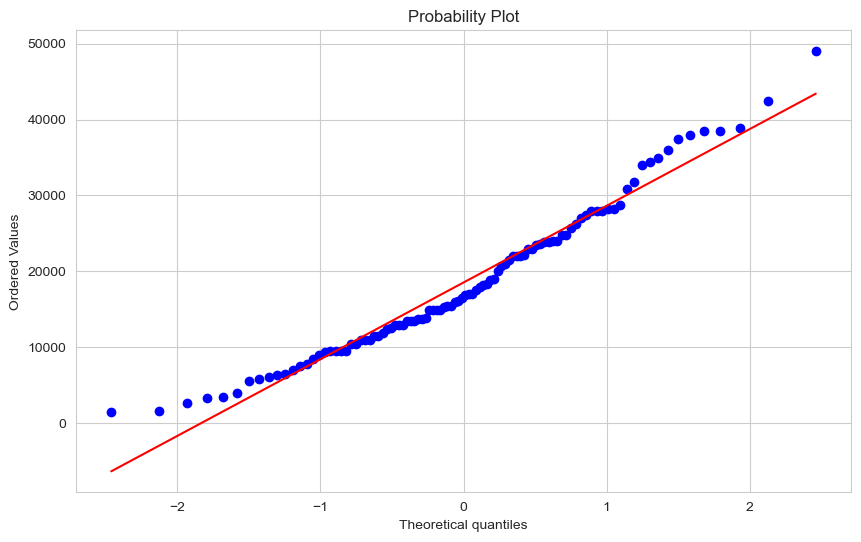

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(16, 6))

# Sample 100 observations from the 'price' column
my_data = df['price'].sample(100)

# Calculate the mean and standard deviation of the sample
mu = np.mean(my_data)
sigma = np.std(my_data)

# Generate a normal distribution with the same mean and standard deviation as the sample
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution as a dotted red line on the Q-Q plot
# plt.plot(x, y, 'r--', linewidth=2)

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(my_data, dist="norm", plot=ax)

# Show the plot
plt.show()

In this code snippet, we first calculate the z-scores for the 'price' feature using the formula (x - mean) / std, where x is the price value, mean is the mean price value, and std is the standard deviation of the price values. We then define a threshold for the z-score (here, we use 3 as the threshold), and drop the rows with z-scores above the threshold using boolean indexing.

Finally, we print the number of rows before and after dropping outliers to check the effectiveness of the outlier removal. You can adjust the z_threshold value to control the number of outliers that are dropped.

Note that this is just one way to identify and drop outliers from a dataset, and there are many other methods available depending on the nature of the dataset and the specific problem.

Normality violation will affect the estimates of the standard error (SE) and the confidence interval, and hence the significance of the risk factors. The validation of normality sometimes can be ignored in the application of linear regression models. So normality of the features is NOT considered as an assumption in linear regression. However, normality of the residuals is an assumption in linear regression. Specifically, linear regression assumes that the residuals (the differences between the predicted values and the actual values) are normally distributed.

Normality of the residuals is important because if the residuals are not normally distributed, it can indicate that the model is NOT capturing all of the underlying patterns in the data. Non-normality of the residuals can also lead to biased estimates of the model parameters and inaccurate predictions.

Note that normality of the response variable (also known as the dependent variable or the target variable) is also an assumption in some types of linear regression, such as linear regression with maximum likelihood estimation. However, this assumption is NOT required in ordinary least squares regression, which is the most common type of linear regression. By the law of large numbers and the central limit theorem; when a dependent variable is NOT distributed normally, the ordinary least squares (OLS) estimators in linear regression technique still will be approximately normally distributed around the true parameter values and linear regression remains a statistically sound technique in studies of large sample sizes.

**🧐 [Are Linear Regression Techniques Appropriate for Analysis When the Dependent (Outcome) Variable Is Not Normally Distributed?](https://iovs.arvojournals.org/article.aspx?articleid=2128171#:~:text=The%20validation%20of%20normality%20sometimes,application%20of%20linear%20regression%20models.&text=Normality%20violation%20will%20affect%20the,significance%20of%20the%20risk%20factors.)**<br>
**🧐 [Assumptions of Regression Analysis](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/assumptions-of-regression-analysis.html)**

**Regression Assumptions**

For the simple and multiple regression model to hold there are some assumptions we need to make:

- The chosen sample is representative of the population.
- There is a linear relationship between the independent variable(s) and the dependent variable.
- All the variables are normally distributed; to check, plot a histogram of the residuals.
- There are no outliers, (if there are outliers they need to be removed); to check use a test for detecting outliers.
- The independent variables are all linearly independent (no variable dependents of the other variables); to check plot the independent values against each other and look for a correlation.
- For multiple regression there should be at least five times as many pairs of data than dependent variables.

**Linear Assumptions**
- The mean of the distribution of errors is 0.
- The variance of errors is constant across all levels of the independent variable, this is called homoscedasticity; to check plot the residuals versus the predicted values of y.
- The distribution of errors is normal; to check this draw a histogram of the errors.
- All the errors are independent; to check plot the residuals versus the time periods.

HOWEVER, ``in general``, There are **🧐 [four assumptions associated with a linear regression model](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression4.html#:~:text=Linearity%3A%20The%20relationship%20between%20X,X%2C%20Y%20is%20normally%20distributed.)**:

- ``Linearity``: The relationship between X and the mean of Y is linear.
- ``Homoscedasticity``: The variance of residual is the same for any value of X.
- ``Independence``: Observations are independent of each other.
- ``Normality``: For any fixed value of X, Y is normally distributed.

**Sum up; none of your observed variables have to be normal in linear regression analysis, which includes t-test and ANOVA. The errors after modeling, however, should be normal to draw a valid conclusion by hypothesis testing.**

**🧐 [Should I always transform my variables to make them normal?](https://data.library.virginia.edu/normality-assumption/#:~:text=Linear%20regression%20analysis%2C%20which%20includes,or%20an%20outcome%20(DV).)**

In [37]:
from scipy.stats import shapiro

# Test normality for a specific column (e.g., 'price')
column = 'price'
stat, p = shapiro(df[column])

# Interpret the result
alpha = 0.01
if p > alpha:
    print(f"The {column} column is normally distributed (p = {p:.4f})")
else:
    print(f"The {column} column is NOT normally distributed (p = {p:.4f})")

The price column is NOT normally distributed (p = 0.0000)


In [38]:
from scipy.stats import kstest, norm

my_data = df['price'].sample(50)
ks_statistic, p_value = kstest(my_data, 'norm')
print(ks_statistic, p_value)

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print(f"The {column} column is normally distributed (p = {p:.4f})")
else:
    print(f"The {column} column is NOT normally distributed (p = {p:.4f})")

1.0 0.0
The price column is NOT normally distributed (p = 0.0000)


The Kolmogorov Smirnov Statistic (KS test) is well-known but it has not much power. This means that a large number of observations is necessary to reject the null hypothesis. It is also sensitive to outliers. On the other hand, it can be used for other types of distributions.

In [39]:
# Let's check some basic information after dropping/modifying extreme values in "price" feature

first_looking(df, "price")

# 28624 - 26703 = 1921 extreme values were dropped from the dataset

column name    :  price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4021
shape_of_df    :  (26703, 30)
--------------------------------
price
14990.00    222
12990.00    218
16990.00    186
19990.00    166
9990.00     160
           ... 
8925.00       1
16385.00      1
23777.00      1
34389.00      1
4440.00       1
Name: count, Length: 4021, dtype: int64


## doors

In [40]:
# Let's explore basic information about "doors"

first_looking(df, "doors")

column name    :  doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  6
shape_of_df    :  (26703, 30)
--------------------------------
doors
5.00    16808
2.00     5074
4.00     2635
3.00     2179
6.00        5
1.00        2
Name: count, dtype: int64


In [41]:
# Let's explore which cars have just one (1) door

df[df["doors"]==1]["make_model"]

9065     Fiat 124 Spider
19913        Ford Fiesta
Name: make_model, dtype: object

In [42]:
# Let's check if this door number for "Fiat 124 Spider" reflects the reality by looking at its counterparts in the DataFrame

df[df["make_model"]=="Fiat 124 Spider"][["make_model", "body_type", "doors"]].value_counts(dropna=False)

make_model       body_type    doors
Fiat 124 Spider  Convertible  2.00     64
                 Coupe        2.00     38
                 Convertible  1.00      1
                              3.00      1
Name: count, dtype: int64

In [43]:
# Let's check if this door number for "Ford Fiesta" reflects the reality by looking at its counterparts in the DataFrame

df[df["make_model"]=="Ford Fiesta"][["make_model", "body_type", "doors"]].value_counts(dropna=False)

make_model   body_type  doors
Ford Fiesta  Compact    5.00     137
             Sedan      5.00     120
             Compact    3.00      77
             Sedan      3.00      31
             Compact    4.00      18
             Sedan      4.00       6
             Compact    2.00       5
             Coupe      3.00       2
             Sedan      2.00       2
             Compact    1.00       1
             Coupe      5.00       1
Name: count, dtype: int64

In [44]:
# Let's explore which cars have six (6) doors

df[df["doors"]==6]["make_model"]

14948     Dacia Logan
15114     Dacia Logan
15122    Dacia Dokker
15146     Dacia Logan
15180     Dacia Logan
Name: make_model, dtype: object

In [45]:
# Let's check if this door number for "Dacia Logan" reflects the reality by looking at its counterparts in the DataFrame

df[df["make_model"]=="Dacia Logan"][["make_model", "body_type", "doors"]].value_counts(dropna=False)

make_model   body_type      doors
Dacia Logan  Station Wagon  5.00     109
                            4.00      38
             Sedan          4.00      32
             Compact        4.00      13
             Station Wagon  6.00       4
             Sedan          5.00       3
Name: count, dtype: int64

In [46]:
# Let's check if this door number for "Dacia Dokker" reflects the reality by looking at its counterparts in the DataFrame

df[df["make_model"]=="Dacia Dokker"][["make_model", "body_type", "doors"]].value_counts(dropna=False)

make_model    body_type         doors
Dacia Dokker  Station Wagon     5.00     29
                                4.00     22
              Off-Road/Pick-Up  4.00      2
              Compact           4.00      1
              Sedan             4.00      1
              Station Wagon     6.00      1
Name: count, dtype: int64

In [47]:
# Let's replace these number of doors with NaN

df["doors"].replace([1, 6], np.nan, inplace=True)

In [48]:
# Let's check how many missing values there have been in "doors" feature

df["doors"].isnull().sum()

7

In [49]:
# This DEF will fill the missing values in the "doors" with the mode value based on "make_model" and "body_type"

fill(df, "make_model", "body_type", "doors", "mode")

COLUMN NAME    :  doors
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4
--------------------------------
doors
2.00     5075
3.00     2179
4.00     2635
5.00    16814
Name: count, dtype: int64


#### The distribution of doors

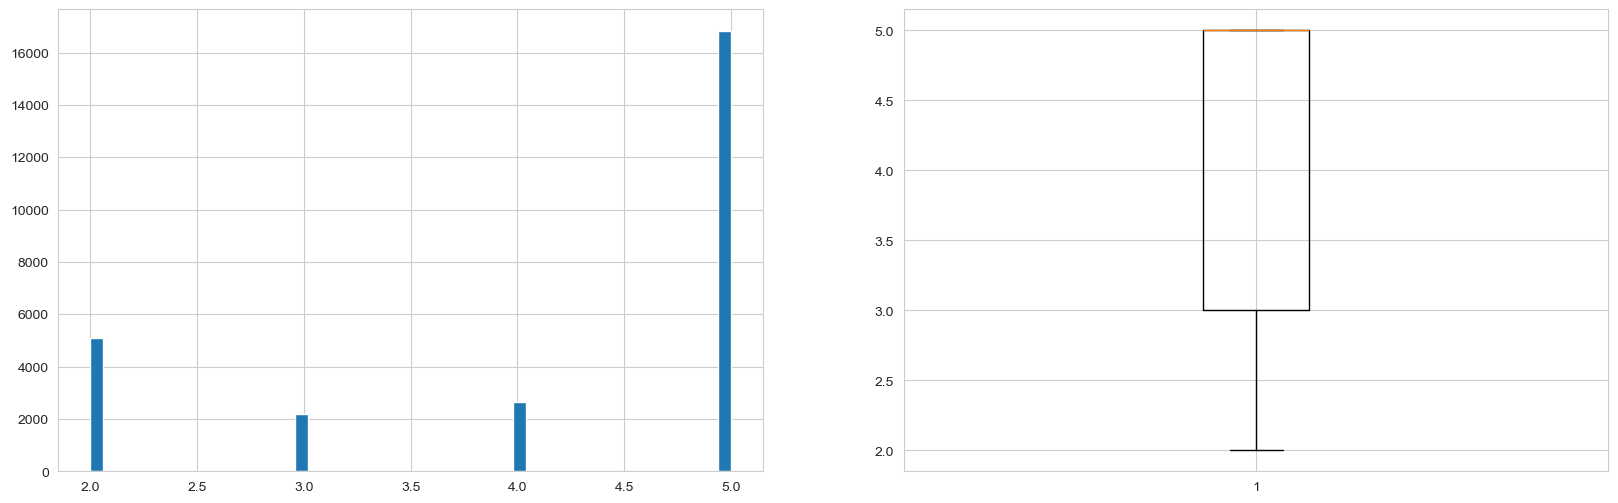

In [50]:
# Let's check how the observations in "doors" feature are distributed via Histogram and Boxplot

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.doors, bins=50)

plt.subplot(122)
plt.boxplot(df.doors)

plt.show()

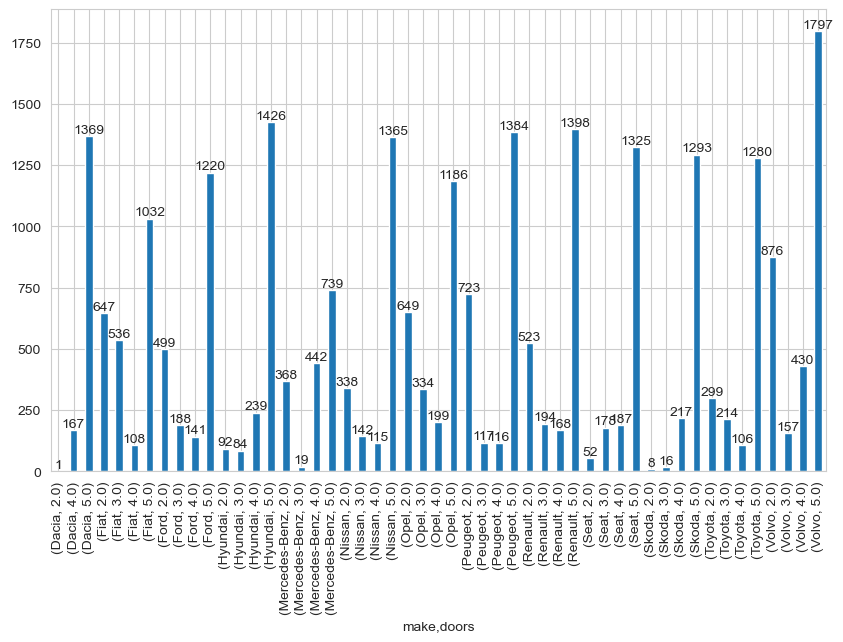

In [51]:
# Let's check how the observations in "price" feature are distributed based on their makes

fig, ax = plt.subplots()

df.groupby(["make", "doors"]).doors.count().plot.bar()

for container in ax.containers:
    ax.bar_label(container);

In [52]:
# Let's drop the "doors" feature from our analysis

print(df.shape)
df.drop("doors", axis=1, inplace=True)
print(df.shape)

(26703, 30)
(26703, 29)


## mileage

Right behind the age of the vehicle, most buyers will look at mileage. In some cases this is even more important than age, for example on vehicles that are known for their reliability. Typically, most cars start to experience issues after 100,000 odd miles, which can create expensive repair jobs. The lower the mileage, the more your car is likely to be worth.

In [53]:
# Let's explore basic information about "mileage"

first_looking(df, "mileage")

column name    :  mileage
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  13555
shape_of_df    :  (26703, 29)
--------------------------------
mileage
10.00        538
1.00         159
50.00        122
5.00         102
100.00        99
            ... 
48378.00       1
118190.00      1
47777.00       1
110587.00      1
230047.00      1
Name: count, Length: 13555, dtype: int64


In [54]:
# Let's explore Descriptive Satatistics on "mileage"

display(df.mileage.describe())

# Differences between intervals
diff1 = df.mileage.describe()['mean'] - df.mileage.describe()['std']
diff2 = df.mileage.describe()['25%'] - df.mileage.describe()['min']
diff3 = df.mileage.describe()['max'] - df.mileage.describe()['75%']

print(f"The difference between the {color.BOLD + color.BLUE}mean value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['mean']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}standard deviation{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['std']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff1:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}25th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['25%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}minimum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['min']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff2:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}75th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['75%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}maximum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['max']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff3:.2f}{color.RED + color.END}.")

count     26703.00
mean      75920.03
std       68010.88
min           0.00
25%       23769.50
50%       61400.00
75%      110500.00
max     1440000.00
Name: mileage, dtype: float64

The difference between the mean value (19204.72) and the standard deviation (10817.27) is 7909.14.
The difference between the 25th percentile (11512.50) and the minimum value (490.00) is 23769.50.
The difference between the 75th percentile (25585.00) and the maximum value (51980.00) is 1329500.00.


#### The distribution of mileages

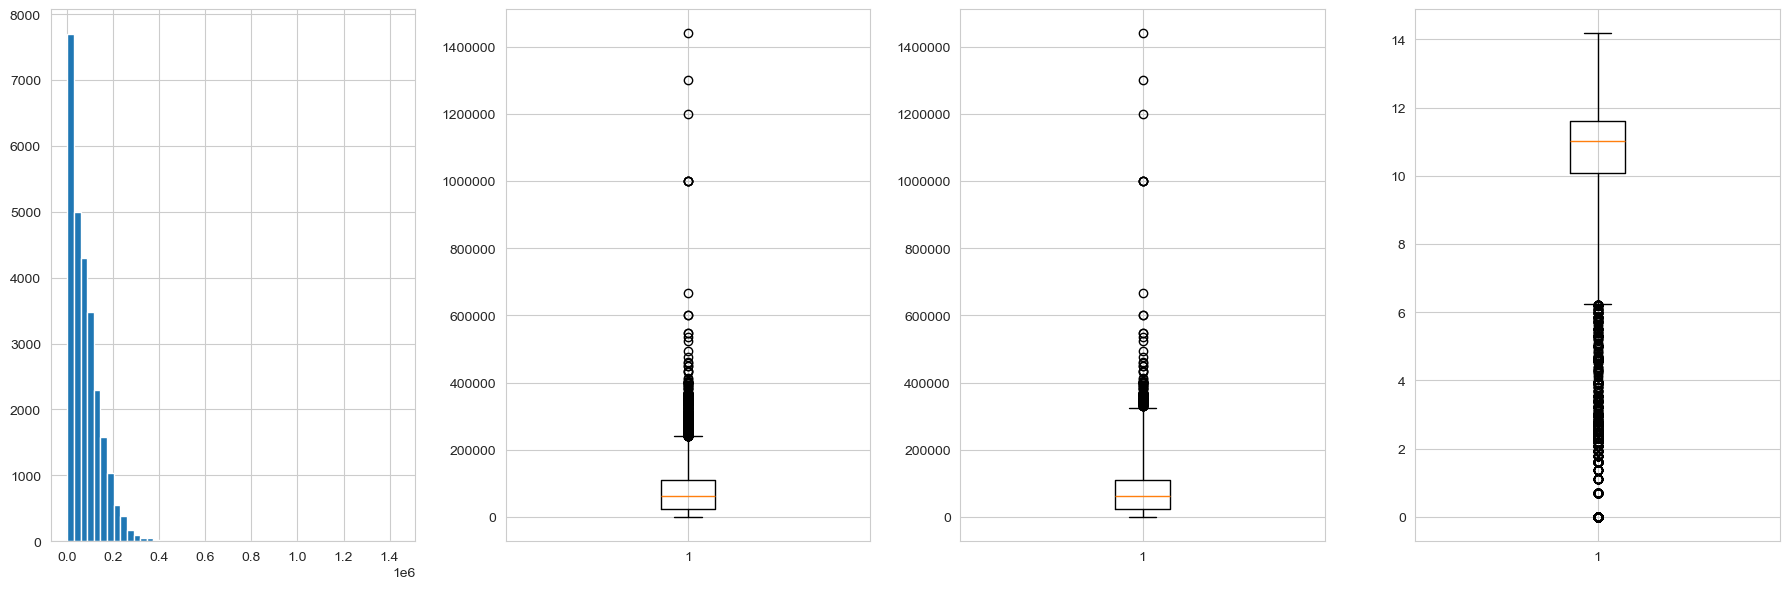

In [55]:
# Let's check how the observations in "mileage" feature are distributed via Histogram and Boxplot

plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.hist(df.mileage, bins=50)

plt.subplot(142)
plt.boxplot(df.mileage)
plt.ticklabel_format(style='plain', axis='y')  # suppress scientific notation in the y-axis tick labels

plt.subplot(143)
plt.boxplot(df.mileage, whis=2.5)  # boxplot based on 2.5 whisker
plt.ticklabel_format(style='plain', axis='y')  # suppress scientific notation in the y-axis tick labels

plt.subplot(144)
plt.boxplot(np.log(df.mileage), whis=2.5)  # boxplot based on 2.5 whisker after logaritmic transformation

plt.tight_layout()
plt.show()

In [56]:
# Let's examine the first lowest 20 observation in "mileage" to see if there have been some extreme values away from others

df.sort_values(by=["mileage"], ascending=False)["mileage"].head(20)

df.mileage.sort_values().head(20)

2849    0.00
14967   0.00
3783    0.00
2879    0.00
13771   0.00
13814   0.00
5530    0.00
10494   0.00
3606    0.00
9321    0.00
17243   0.00
9992    0.00
10032   0.00
15391   0.00
21352   0.00
20412   0.00
22782   0.00
21427   0.00
10257   0.00
10128   0.00
Name: mileage, dtype: float64

In [57]:
# Let's examine the first highest 20 observation in "mileage" to see if there have been some extreme values away from others

df.sort_values(by=["mileage"], ascending=True)["mileage"].head(20)

df.mileage.sort_values().tail(20)

26049    448914.00
26372    448914.00
255      457379.00
5587     461626.00
18867    477000.00
2625     494457.00
17220    523992.00
2382     536388.00
13395    546888.00
16794    547000.00
13381    600000.00
26551    600001.00
12202    667128.00
20069    999999.00
2566     999999.00
6769    1000000.00
21387   1000001.00
11219   1199900.00
16305   1300000.00
17750   1440000.00
Name: mileage, dtype: float64

In [58]:
# Let's explore which cars' milage is higher than a million (1000000)

df[df["mileage"] > 1000000][["make_model", "type", "mileage", "age"]]

make_model  type    mileage   age
11219     Seat Ibiza  Used 1199900.00  4.00
16305  Toyota Celica  Used 1300000.00 36.00
17750   Nissan Micra  Used 1440000.00  3.00
21387    Ford Fiesta  Used 1000001.00  4.00

In [59]:
# Let's pick up the indices of cars whose milage is higher than a million (1000000)

drop_mileage_index = df[df["mileage"] > 1000000][["make_model", "type", "mileage", "age"]].index
drop_mileage_index

Index([11219, 16305, 17750, 21387], dtype='int64')

In [60]:
# Let's drop the cars whose milage is higher than a million (1000000) from our DataFraame

print(df.shape)
df.drop(drop_mileage_index, inplace=True)
print(df.shape)

(26703, 29)
(26699, 29)


#### The distribution of mileages after modification

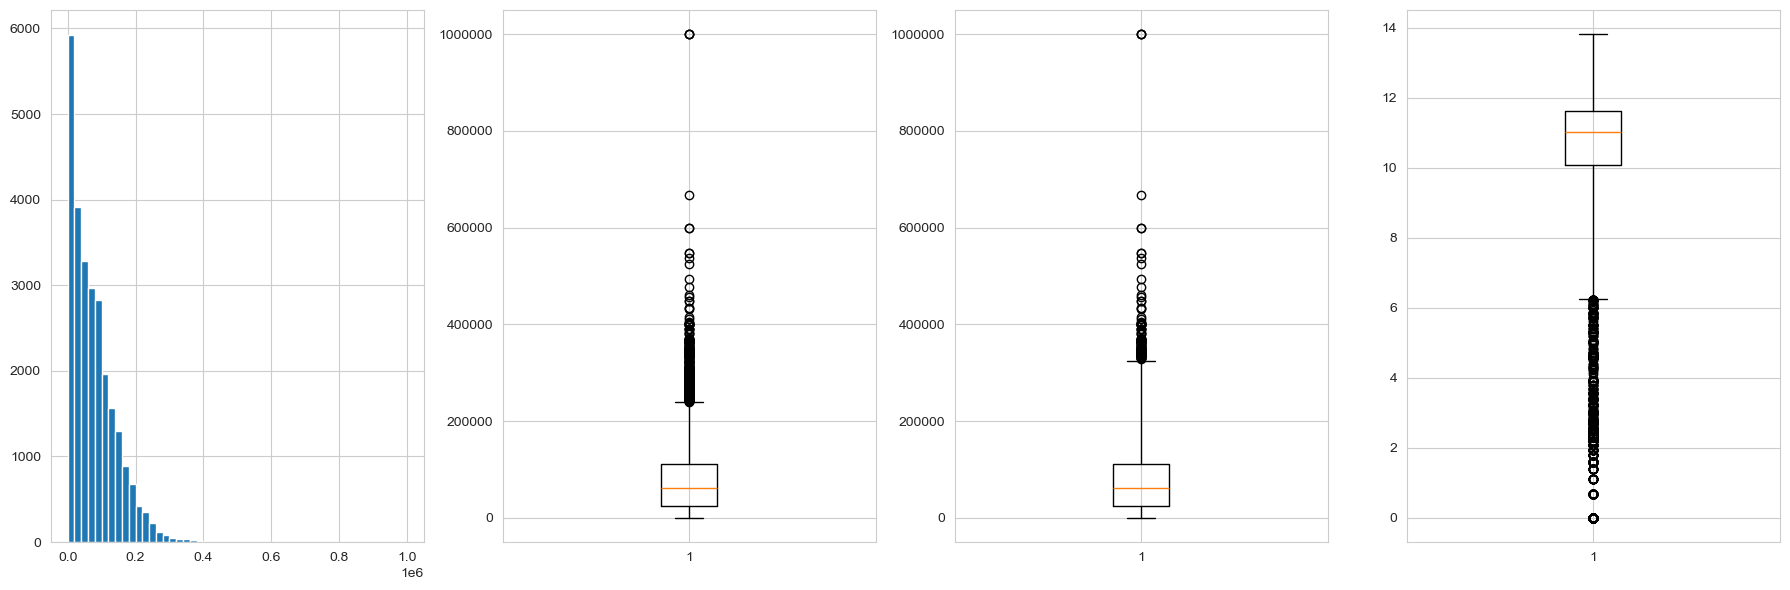

In [61]:
# After dropping these observations, let's check how they are distributed via Histogram and Boxplot

plt.figure(figsize=(18, 6))

plt.subplot(141)
plt.hist(df.mileage, bins=50)

plt.subplot(142)
plt.boxplot(df.mileage)
plt.ticklabel_format(style='plain', axis='y')  # suppress scientific notation in the y-axis tick labels

plt.subplot(143)
plt.boxplot(df.mileage, whis=2.5)  # boxplot based on 2.5 whisker
plt.ticklabel_format(style='plain', axis='y')  # suppress scientific notation in the y-axis tick labels

plt.subplot(144)
plt.boxplot(np.log(df.mileage), whis=2.5)  # boxplot based on 2.5 whisker after logaritmic transformation

plt.tight_layout()
plt.show()

<div style="background-color: #ffeeba; padding: 10px; font-size: 14px; font-weight: bold;">
    <code>mileage</code> is a variable with a wide range of values. Although these extreme values above CANNOT be considered as  genuine outliers since they might be a part of real world scenerio; however, they might affect regression lines, making the regression lines less accurate in predicting other data and causing the slope of the line of best fit to be less steep than you might expect. So, we will NOT keep these extreme values as they are.
</div>

**🧐 [Effects of outliers on regression model?](https://discuss.analyticsvidhya.com/t/effects-of-outliers-on-regression-model/2403)**

In [62]:
# Let's determine the First & Third Quantile and Inter Quantile Range 
# so we can calculate lowest and highest boundries of fence to drop extreme values

print("Number of rows before dropping outliers:", len(df))
q1 = df["mileage"].quantile(0.25)
q3 = df["mileage"].quantile(0.75)
iqr = q3-q1 #Interquartile range

fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

df = df.loc[(df["mileage"] > fence_low) & (df["mileage"] < fence_high)]
df.reset_index(drop=True, inplace=True)
print("Number of rows after dropping outliers:", len(df))

Number of rows before dropping outliers: 26699
Number of rows after dropping outliers: 26115


#### The distribution of mileages after modification by Tukey's Fence Rule

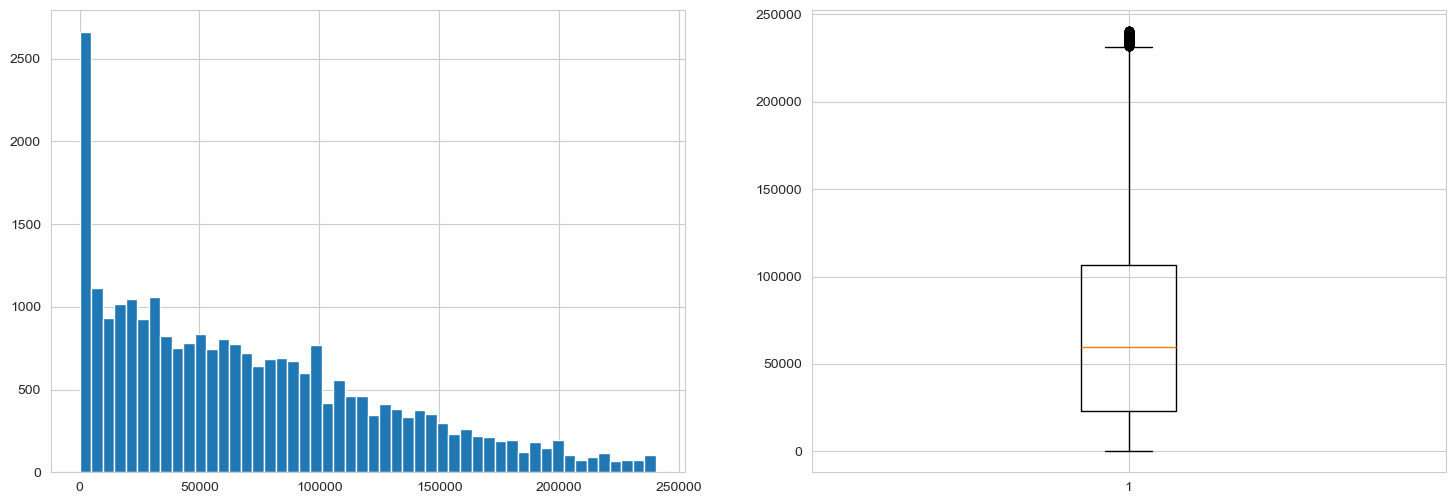

In [63]:
plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.hist(df.mileage, bins=50)

plt.subplot(122)
plt.boxplot(df.mileage)

plt.show()

<Figure size 2000x600 with 0 Axes>

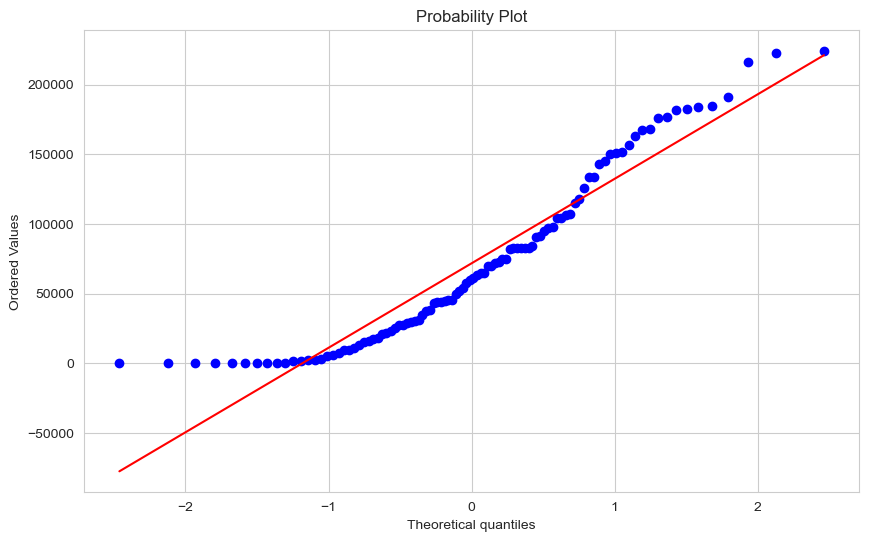

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(20, 6))

# Sample 50 observations from the 'mileage' column
my_data = df['mileage'].sample(100)

# Calculate the mean and standard deviation of the sample
mu = np.mean(my_data)
sigma = np.std(my_data)

# Generate a normal distribution with the same mean and standard deviation as the sample
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution as a dotted red line on the Q-Q plot
# plt.plot(x, y, 'r--', linewidth=2)

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(my_data, dist="norm", plot=ax)

# Show the plot
plt.show()

In [65]:
# Let's check some basic information after dropping/modifying extreme values in "price" feature

first_looking(df, "mileage")

# 26703 - 26115 = 588 extreme values were dropped from the dataset

column name    :  mileage
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  13195
shape_of_df    :  (26115, 29)
--------------------------------
mileage
10.00        538
1.00         159
50.00        122
5.00         102
100.00        99
            ... 
22033.00       1
48378.00       1
118190.00      1
47777.00       1
230047.00      1
Name: count, Length: 13195, dtype: int64


In [66]:
# df["mileage_logged"] = np.log(df.mileage)

## seats

In [67]:
# Let's explore basic information about "seats"

first_looking(df, "seats")

column name    :  seats
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  10
shape_of_df    :  (26115, 29)
--------------------------------
seats
5.00    19379
4.00     5195
2.00     1029
7.00      393
8.00       39
9.00       32
3.00       25
6.00        9
0.00        9
1.00        5
Name: count, dtype: int64


In [68]:
print(df.shape)
df.drop("seats", axis=1, inplace=True)
print(df.shape)

(26115, 29)
(26115, 28)


## engine_size

In [69]:
# Let's explore basic information about "engine_size"

first_looking(df, "engine_size")

column name    :  engine_size
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  413
shape_of_df    :  (26115, 28)
--------------------------------
engine_size
1598.00     2180
999.00      2143
1969.00     1602
1461.00     1106
1998.00      967
998.00       953
1199.00      926
1498.00      785
1997.00      632
1968.00      615
1984.00      550
1332.00      528
1560.00      445
1798.00      443
898.00       432
1242.00      417
1499.00      413
1197.00      384
1368.00      357
1995.00      344
1248.00      328
1600.00      291
2435.00      262
1991.00      245
2143.00      244
0.00         239
1364.00      229
1500.00      209
1591.00      202
1956.00      201
2000.00      191
3498.00      177
1395.00      175
5038.00      170
1987.00      164
1200.00      162
1149.00      157
3696.00      157
1796.00      154
1198.00      153
1490.00      153
1950.00      152
1398.00      146
1497.00      141
1496.00      134
1794.00      131
1618.00      1

In [70]:
# Let's explore Descriptive Satatistics on "engine_size"

display(df.engine_size.describe())

# Differences between intervals
diff1 = df.engine_size.describe()['mean'] - df.engine_size.describe()['std']
diff2 = df.engine_size.describe()['25%'] - df.engine_size.describe()['min']
diff3 = df.engine_size.describe()['max'] - df.engine_size.describe()['75%']

print(f"The difference between the {color.BOLD + color.BLUE}mean value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['mean']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}standard deviation{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['std']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff1:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}25th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['25%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}minimum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['min']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff2:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}75th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['75%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}maximum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['max']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff3:.2f}{color.RED + color.END}.")

count   26115.00
mean     1664.42
std       986.24
min         0.00
25%      1242.00
50%      1582.00
75%      1969.00
max     99900.00
Name: engine_size, dtype: float64

The difference between the mean value (19505.32) and the standard deviation (10722.62) is 678.18.
The difference between the 25th percentile (11950.00) and the minimum value (490.00) is 1242.00.
The difference between the 75th percentile (25900.00) and the maximum value (51980.00) is 97931.00.


#### The distribution of engine sizes

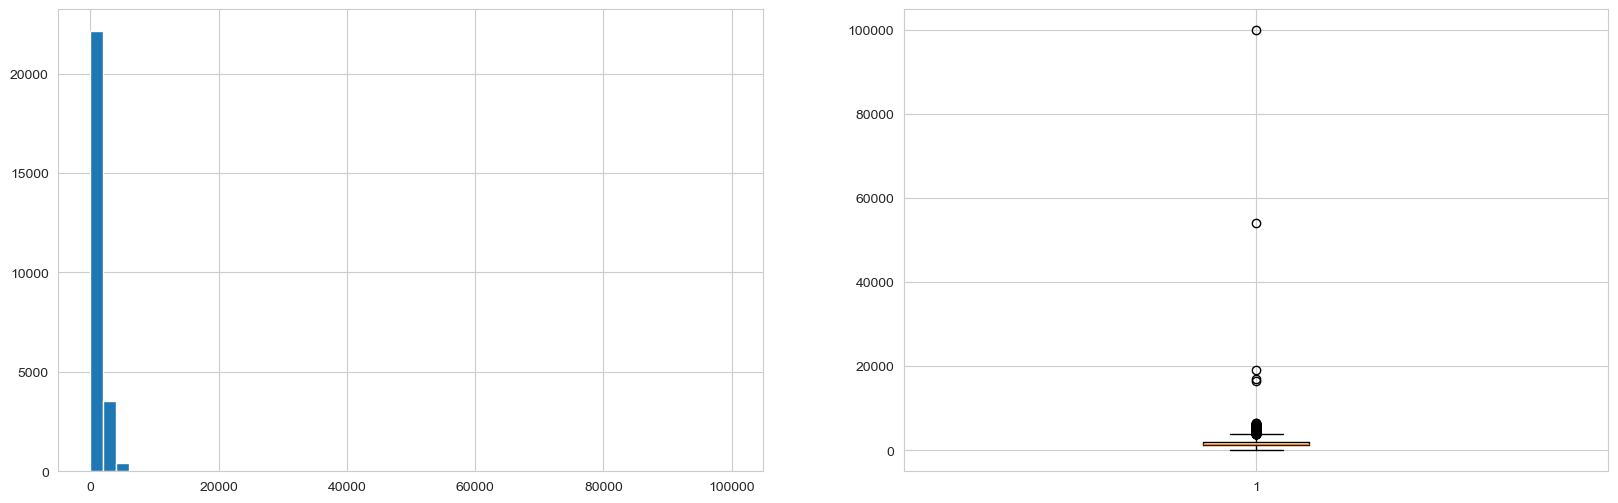

In [71]:
# Let's check how the observations in "engine_size" feature are distributed via Histogram and Boxplot

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["engine_size"], bins=50)

plt.subplot(122)
plt.boxplot(df["engine_size"], whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

In [72]:
# Let's examine the first highest 20 observation in "engine_size" to see if there have been some extreme values away from others

df.sort_values(by=["engine_size"], ascending=False)["engine_size"].head(20)

# df["engine_size"].sort_values(ascending=False).head(20)

15311   99900.00
19681   54009.00
550     19194.00
4619    16998.00
14869   16597.00
19690    6400.00
19729    6387.00
539      6300.00
535      6300.00
19802    6294.00
19683    6276.00
542      6209.00
608      6208.00
555      6208.00
618      6208.00
1395     6208.00
625      6208.00
1340     6208.00
529      6208.00
1263     6208.00
Name: engine_size, dtype: float64

In [73]:
# Let's examine the first lowest 20 observation in "engine_size" to see if there have been some extreme values away from others

df.sort_values(by=["engine_size"], ascending=True)["engine_size"].head(20)

# df["engine_size"].sort_values(ascending=True).head(20)

8970    0.00
5905    0.00
8905    0.00
9479    0.00
5862    0.00
6073    0.00
6074    0.00
13917   0.00
7662    0.00
15162   0.00
13918   0.00
15077   0.00
6076    0.00
18936   0.00
13919   0.00
8528    0.00
1796    0.00
10468   0.00
17334   0.00
15073   0.00
Name: engine_size, dtype: float64

In [74]:
# Let's explore maximum occurances of each unique "engine_size"

df["engine_size"].value_counts().sort_index(ascending=True)

engine_size
0.00         239
1.00          74
2.00           7
4.00           2
5.00           3
20.00          1
200.00         1
289.00         1
300.00         1
332.00         1
498.00         1
499.00         5
500.00         2
549.00         1
600.00         1
650.00         2
652.00         2
698.00         1
750.00         2
767.00         6
839.00         2
843.00        10
847.00         1
850.00         4
875.00       112
898.00       432
899.00        20
900.00        53
903.00         4
964.00         3
973.00         2
987.00         2
988.00         1
996.00         2
997.00         1
998.00       953
999.00      2143
1000.00       99
1084.00       37
1086.00       15
1089.00        1
1100.00        9
1108.00       10
1116.00        2
1119.00        1
1120.00        4
1122.00        1
1124.00        9
1149.00      157
1150.00        2
1158.00        4
1194.00        2
1196.00        1
1197.00      384
1198.00      153
1199.00      926
1200.00      162
1221.00        2
12

In [75]:
# Let's explore which cars' engine sizes are higher than five hundreds (500)

df[df["engine_size"] <= 500][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]\
                            .sort_values(by=["engine_size"], ascending=True)

make_model   age         body_type    gearbox drivetrain  \
8401             Fiat 500E  0.00           Compact  Automatic      Front   
9421             Fiat 500E  1.00             Coupe  Automatic      Front   
9479              Fiat 500  0.00             Coupe  Automatic      Front   
9485             Fiat 500E  1.00             Coupe  Automatic      Front   
17334          Nissan Leaf  3.00           Compact  Automatic      Front   
17333          Nissan Leaf  3.00           Compact  Automatic      Front   
9521              Fiat 500  1.00             Coupe  Automatic      Front   
17330          Nissan Leaf  4.00           Compact  Automatic      Front   
17325          Nissan Leaf  3.00           Compact  Automatic      Front   
17310          Nissan Leaf 10.00           Compact  Automatic      Front   
17304          Nissan Leaf  9.00           Compact  Automatic      Front   
17294          Nissan Leaf  2.00           Compact  Automatic      Front   
17285          Nissan Leaf  2.00           Compact  Automatic      Front   
9329             Fiat 500E  1.00             Coupe  Automatic      Front   
17282          Nissan Leaf  2.00           Compact  Automatic      Front   
22190         Hyundai Kona  1.00  Off-Road/Pick-Up  Automatic      Front   
17277          Nissan Leaf  1.00           Compact  Automatic      Front   
17268          Nissan Leaf  4.00           Compact  Automatic      Front   
10395            Fiat 500E  0.00             Sedan  Automatic      Front   
10408            Fiat 500E  0.00             Sedan  Automatic      Front   
10427            Fiat 500E  0.00             Sedan  Automatic      Front   
10428            Fiat 500E  1.00             Sedan  Automatic      Front   
10445            Fiat 500E  0.00             Sedan  Automatic      Front   
10468            Fiat 500E  1.00             Sedan  Automatic      Front   
10469            Fiat 500E  1.00             Sedan  Automatic      Front   
10481            Fiat 500E  1.00             Sedan  Automatic      Front   
10489            Fiat 500E  0.00             Sedan  Automatic      Front   
17278          Nissan Leaf  2.00           Compact  Automatic      Front   
17335          Nissan Leaf  8.00           Compact  Automatic      Front   
22789        Hyundai Ioniq  4.00             Sedan  Automatic      Front   
8976             Fiat 500E  0.00       Convertible  Automatic      Front   
8411             Fiat 500E  0.00           Compact  Automatic      Front   
8417             Fiat 500E  0.00           Compact  Automatic      Front   
8418             Fiat 500E  0.00           Compact  Automatic      Front   
8419             Fiat 500E  0.00           Compact  Automatic      Front   
8424              Fiat 500  1.00           Compact  Automatic      Front   
8482             Fiat 500E  1.00           Compact  Automatic      Front   
8486             Fiat 500E  0.00           Compact  Automatic      Front   
8497             Fiat 500E  0.00           Compact  Automatic      Front   
22934         Hyundai Kona  0.00             Sedan  Automatic      Front   
8528              Fiat 500  1.00           Compact  Automatic      Front   
8566             Fiat 500E  1.00           Compact  Automatic      Front   
8573             Fiat 500E  1.00           Compact  Automatic      Front   
8580             Fiat 500E  0.00           Compact  Automatic      Front   
8594             Fiat 500E  0.00           Compact  Automatic      Front   
22863         Hyundai Kona  0.00             Sedan  Automatic      Front   
8668              Fiat 500  0.00           Compact  Automatic      Front   
22822        Hyundai Ioniq  1.00             Sedan  Automatic      Front   
8732             Fiat 500E  8.00           Compact  Automatic      Front   
8767             Fiat 500E  0.00       Convertible  Automatic      Front   
8791             Fiat 500E  0.00       Convertible  Automatic      Front   
8873       Fiat 124 Spider 41.00       Convertible     Manual   

In [76]:
# Let's explore minimum occurances of each unique "engine_size"

df["engine_size"].value_counts().sort_index(ascending=False)

engine_size
99900.00       1
54009.00       1
19194.00       1
16998.00       1
16597.00       1
6400.00        1
6387.00        1
6300.00        2
6294.00        1
6276.00        1
6209.00        1
6208.00       10
6000.00        1
5987.00        2
5980.00        1
5950.00        1
5786.00        1
5768.00        1
5766.00        1
5700.00        2
5689.00        2
5600.00        3
5513.00        2
5461.00       25
5439.00        6
5409.00        1
5400.00        1
5300.00        1
5038.00      170
5000.00        8
4995.00        1
4973.00        6
4966.00       18
4952.00        3
4951.00       75
4949.00        2
4942.00        2
4886.00        1
4742.00        2
4736.00        1
4735.00        2
4728.00        2
4700.00        7
4664.00        1
4663.00       18
4606.00       13
4605.00        1
4601.00        1
4600.00        7
4598.00        1
4489.00        1
4414.00        1
4200.00        1
4146.00        1
4009.00        9
4006.00        1
4000.00        4
3998.00        1
39

In [77]:
# Let's explore which cars' engine sizes are higher than four thousands (4000)

df[df["engine_size"] > 4000][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]\
                            .sort_values(by=["engine_size"], ascending=False)

make_model   age         body_type         gearbox  \
15311             Dacia Sandero  3.00             Sedan          Manual   
19681              Ford Mustang 14.00       Convertible          Manual   
550        Mercedes-Benz Sl 320 21.00       Convertible       Automatic   
4619             Renault Megane  7.00             Coupe          Manual   
14869              Dacia Dokker  0.00     Station Wagon          Manual   
19690          Ford Thunderbird 59.00       Convertible       Automatic   
19729     Ford Galaxie Sunliner 60.00       Convertible       Automatic   
535     Mercedes-Benz Sl 63 Amg 13.00       Convertible       Automatic   
539     Mercedes-Benz Sl 63 Amg 13.00       Convertible       Automatic   
19802               Ford Galaxy 57.00       Convertible       Automatic   
19683              Ford Hot Rod 68.00       Convertible       Automatic   
542     Mercedes-Benz Sl 63 Amg 11.00       Convertible       Automatic   
801     Mercedes-Benz Ml 63 Amg 12.00  Off-Road/Pick-Up       Automatic   
608     Mercedes-Benz Cl 63 Amg 13.00             Coupe       Automatic   
1340     Mercedes-Benz E 63 Amg 12.00             Sedan       Automatic   
529     Mercedes-Benz Sl 63 Amg 14.00       Convertible       Automatic   
1263     Mercedes-Benz E 63 Amg 14.00     Station Wagon       Automatic   
555           Mercedes-Benz Slr 11.00       Convertible       Automatic   
1395     Mercedes-Benz E 63 Amg 12.00             Sedan       Automatic   
826     Mercedes-Benz Ml 63 Amg 15.00  Off-Road/Pick-Up       Automatic   
618      Mercedes-Benz C 63 Amg  8.00             Coupe       Automatic   
625    Mercedes-Benz Clk 63 Amg 14.00             Coupe       Automatic   
20022              Ford Mercury 65.00             Coupe       Automatic   
532        Mercedes-Benz Sl 600 28.00       Convertible       Automatic   
554        Mercedes-Benz Sl 600 26.00       Convertible       Automatic   
361     Mercedes-Benz Sl 65 Amg 16.00       Convertible       Automatic   
19200                Ford F 250 17.00           Compact       Automatic   
714        Mercedes-Benz Cl 600 21.00             Coupe       Automatic   
19680             Ford Fairlane 64.00       Convertible          Manual   
19689          Ford Thunderbird 64.00       Convertible       Automatic   
19670             Ford Roadster 92.00       Convertible       Automatic   
19713             Ford Roadster 94.00       Convertible       Automatic   
19978              Ford Mercury 52.00             Coupe       Automatic   
19754             Ford Fairlane 63.00       Convertible       Automatic   
17421              Nissan Titan  5.00           Compact       Automatic   
18353              Nissan Titan 12.00  Off-Road/Pick-Up       Automatic   
428        Mercedes-Benz Sl 560 34.00       Convertible       Automatic   
1310        Mercedes-Benz S 600 10.00             Sedan       Automatic   
640        Mercedes-Benz Cl 600 14.00             Coupe       Automatic   
798     Mercedes-Benz Ml 63 Amg 10.00  Off-Road/Pick-Up       Automatic   
777        Mercedes-Benz Cl 500 15.00             Coupe       Automatic   
1353     Mercedes-Benz E 63 Amg 11.00             Sedan       Automatic   
802     Mercedes-Benz Gl 63 Amg  8.00  Off-Road/Pick-Up       Automatic   
975     Mercedes-Benz Ml 63 Amg 10.00  Off-Road/Pick-Up       Automatic   
699        Mercedes-Benz Cl 500 15.00             Coupe       Automatic   
816     Mercedes-Benz Gl 63 Amg  8.00  Off-Road/Pick-Up       Automatic   
830    Mercedes-Benz Gle 63 Amg  6.00  Off-Road/Pick-Up       Automatic   
845     Mercedes-Benz Ml 63 Amg  7.00  Off-Road/Pick-Up       Automatic   
864        Mercedes-Benz Gl 500 11.00  Off-Road/Pick-Up       Automatic   
615        Mercedes-Benz Cl 500 16.00             Coupe       Automatic   
1399        Mercedes-Benz S 500 16.00             Sedan       Automatic   
1427     Mercedes-Benz E 63 Amg  7.00             Sedan       Automatic   
369        Mercedes-Benz Sl 500 14.00       Co

In [78]:
# Let's take a close look at some of these observations for examining if their engine sizes reflect the reality when compared with their counterparts 

# df.loc[df.make_model == "Ford Thunderbird"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Ford Fairlane"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Dacia Sandero"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Mercedes-Benz SL 320"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Renault Megane"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Dacia Dokker"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]

**Let's focus on the engine size range of "Dacia Dokker"**

In [79]:
# define a function to highlight the highest, median, and minimum values in a column
def highlight_max_median_min(s):
    is_max = s == s.max()
    is_median = s == s.median()
    is_min = s == s.min()
    return ["background-color: pink" if v else "background-color: lightgreen" if w else "background-color: yellow" if x else "" for v, w, x in zip(is_max, is_median, is_min)]

# filter the DataFrame and apply the styling function
styled_df = df.loc[df.make_model == "Dacia Dokker"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]].style.apply(highlight_max_median_min, subset=["engine_size"])

# display the styled DataFrame
styled_df

### 📝 Domain Knowledge About Some Vehicles on the List Above:
**🧐 [SOURCE](https://www.automobile-catalog.com/#gsc.tab=0)**

- **Ford Thunderbird Convertible (1964-1966)**, manufactured or offered in the years 1964-1966 with convertible body_type, equipped with engines of **6384 - 6997 cc (389.6 - 427 cui) displacement**, delivering 223.5 - 257 kW (304 - 350 PS, 300 - 345 hp) of horsepower.

- **Ford Fairlane**, 2-Door Hardtop 390 Thunderbird V-8 (man. 3) , model year 1968, version for North America U.S. manufactured by Ford (USA) in United States, 2-door coupe body_type, RWD (rear-wheel drive), manual 3-speed gearbox, gasoline (petrol) engine with **displacement: 6384 cm3 / 389.6 cui**, advertised power: 197.5 kW / 265 hp / 269 PS ( SAE gross ), torque: 529 Nm / 390 lb-ft.

- **Ford Mustang Mach**, manufactured by Ford (USA) in United States, 2-door coupe body_type, RWD (rear-wheel drive), manual 4-speed gearbox, gasoline (petrol) engine with **displacement: 7033 cm3 / 429.2 cui**, advertised power: 276 kW / 370 hp / 375 PS ( SAE gross ), torque: 610 Nm / 450 lb-ft.

- **Dacia Sandero SCe 65 (man. 5) (Access, Essential, Comfort)** in 2021, the model with 5-door hatchback body and Line-3 999 cm3 / 61.1 cui, 49 kW / 67 PS / 66 hp (ECE) of power, 95 Nm / 70 lb-ft of torque, 5-speed manual powertrain offered since March 2021 for Europe, **Displacement: 999 cm3 / 61.1 cui**.

- **Mercedes-Benz SL 320 (aut. 5)** in 1993, the model with 2-door convertible body and Line-6 3199 cm3 / 195.5 cui, 170 kW / 231 PS / 228 hp (ECE) of power, 315 Nm / 232 lb-ft of torque, 5-speed automatic powertrain offered since July 1993 for Europe **Displacement: 3199 cm3 / 195.5 cui**.

- **Renault Megane Coupe 1.6 Energy dCi 130 (man. 6) in 2015**, the model with 3-door hatchback (coupe) body and Line-4 1598 cm3 / 97.6 cui, 95.5 kW / 130 PS / 128 hp (ECE) of power, 320 Nm / 236 lb-ft of torque, 6-speed manual powertrain for Europe, **Displacement: 1598 cm3 / 97.6 cui**.

- **Dacia Dokker Stepway TCe 130 (man. 6)**, manufactured by Dacia in Romania assembly in Morocco, 5-door mpv body_type, FWD (front-wheel drive), manual 6-speed gearbox, gasoline (petrol) engine with **displacement: 1332 cm3 / 81.1 cui**, advertised power: 95.5 kW / 128 hp / 130 PS ( ECE ), torque: 240 Nm / 177 lb-ft

In [80]:
# According to Domain Knowledge above, let's explore the vehicles having engine sizes between two (2) and five hundreds (500)

df[(df["engine_size"] >= 2) & (df["engine_size"] <= 500)][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]\
                            .sort_values(by=["engine_size"], ascending=True)

make_model   age         body_type    gearbox drivetrain  \
26021            Volvo S90  1.00             Sedan  Automatic        4WD   
1116   Mercedes-Benz C 250  7.00     Station Wagon  Automatic        4WD   
25004           Volvo Xc60  0.00  Off-Road/Pick-Up  Automatic        4WD   
24725           Volvo Xc60  0.00  Off-Road/Pick-Up  Automatic        4WD   
20436            Ford Kuga  4.00  Off-Road/Pick-Up     Manual        4WD   
20120            Ford Kuga  1.00  Off-Road/Pick-Up  Automatic        4WD   
25867            Volvo S90  1.00             Sedan  Automatic        4WD   
15821          Toyota Mr 2 30.00       Convertible     Manual        4WD   
12064            Seat Leon  1.00             Sedan  Automatic      Front   
20063         Ford Mustang  2.00             Coupe  Automatic       Rear   
20064         Ford Mustang  2.00             Coupe  Automatic       Rear   
20068         Ford Mustang  5.00             Coupe  Automatic       Rear   
4307        Renault Megane 18.00       Convertible  Automatic       Rear   
2451          Opel Calibra 30.00             Coupe     Manual      Front   
19962         Ford Mustang 56.00             Coupe  Automatic       Rear   
82     Mercedes-Benz E 300 36.00           Compact  Automatic       Rear   
14371         Dacia Duster  1.00  Off-Road/Pick-Up     Manual        4WD   
8728              Fiat 500 51.00           Compact     Manual      Front   
9499             Fiat 500L 51.00             Coupe     Manual       Rear   
9515             Fiat 500L 50.00             Coupe     Manual       Rear   
10099             Fiat 500 52.00     Station Wagon     Manual      Front   
8652             Fiat 500L 52.00           Compact     Manual      Front   
8503       Fiat 500 Abarth 57.00           Compact     Manual       Rear   
9040              Fiat 500 59.00       Convertible     Manual       Rear   
9205              Fiat 500 62.00             Coupe     Manual      Front   

       gears  engine_size           fuel_type  
26021   8.00         2.00            Electric  
1116    7.00         2.00             Benzine  
25004   8.00         2.00              Diesel  
24725   8.00         2.00              Diesel  
20436   6.00         2.00              Diesel  
20120   6.00         2.00            Electric  
25867   8.00         2.00            Electric  
15821   1.00         4.00             Benzine  
12064   6.00         4.00             Benzine  
20063  10.00         5.00             Benzine  
20064  10.00         5.00             Benzine  
20068  10.00         5.00             Benzine  
4307    6.00        20.00             Benzine  
2451    5.00       200.00             Benzine  
19962   4.00       289.00             Benzine  
82      9.00       300.00  Liquid/Natural Gas  
14371   6.00       332.00             Benzine  
8728    5.00       498.00             Benzine  
9499    4.00       499.00             Benzine  
9515    4.00       499.00             Benzine  
10099   5.00       499.00             Benzine  
8652    6.00       499.00             Benzine  
8503    4.00       499.00             Benzine  
9040    4.00       500.00             Benzine  
9205    5.00       500.00             Benzine

In [81]:
# Let's take a close look at some of these observations for examining if their engine sizes reflect the reality when compared with their counterparts 

# df.loc[df.make_model == "Volvo S90"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Ford Kuga"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Volvo XC60"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Mercedes-Benz E 220"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Dacia Duster"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Fiat 500 Abarth"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Opel Calibra"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Ford Mustang"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "SEAT Leon"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Toyota MR 2"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]
# df.loc[df.make_model == "Renault Megane"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]]

**Let's focus on the engine size range of "Renault Megane"**

In [82]:
# define a function to highlight the highest, median, and minimum values in a column
def highlight_max_median_min(s):
    is_max = s == s.max()
    is_median = s == s.median()
    is_min = s == s.min()
    return ["background-color: pink" if v else "background-color: lightgreen" if w else "background-color: yellow" if x else "" for v, w, x in zip(is_max, is_median, is_min)]

# filter the DataFrame and apply the styling function
styled_df = df.loc[df.make_model == "Renault Megane"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type"]].style.apply(highlight_max_median_min, subset=["engine_size"])

# display the styled DataFrame
styled_df

In [83]:
# Let's pick up the indeces of vehicles whose engine sizes involves 4, 5, 20, 200, 289, 300, 332, 8660, 99900, 54009, 19194, 16998, and 16597

# df.loc[((df["engine_size"] <= 300) & (df["engine_size"] > 8000)), 'engine_size'] = np.nan

outlier_eng_size = df["engine_size"].isin([4, 5, 20, 200, 289, 300, 332, 8660, 99900, 54009, 19194, 16998, 16597])
df[outlier_eng_size][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]

make_model   age         body_type    gearbox drivetrain  \
82      Mercedes-Benz E 300 36.00           Compact  Automatic       Rear   
550    Mercedes-Benz Sl 320 21.00       Convertible  Automatic       Rear   
2451           Opel Calibra 30.00             Coupe     Manual      Front   
4307         Renault Megane 18.00       Convertible  Automatic       Rear   
4619         Renault Megane  7.00             Coupe     Manual      Front   
12064             Seat Leon  1.00             Sedan  Automatic      Front   
14371          Dacia Duster  1.00  Off-Road/Pick-Up     Manual        4WD   
14869          Dacia Dokker  0.00     Station Wagon     Manual      Front   
15311         Dacia Sandero  3.00             Sedan     Manual      Front   
15821           Toyota Mr 2 30.00       Convertible     Manual        4WD   
19681          Ford Mustang 14.00       Convertible     Manual       Rear   
19962          Ford Mustang 56.00             Coupe  Automatic       Rear   
20063          Ford Mustang  2.00             Coupe  Automatic       Rear   
20064          Ford Mustang  2.00             Coupe  Automatic       Rear   
20068          Ford Mustang  5.00             Coupe  Automatic       Rear   

       gears  engine_size           fuel_type  empty_weight  
82      9.00       300.00  Liquid/Natural Gas       1550.00  
550     5.00     19194.00             Benzine       1780.00  
2451    5.00       200.00             Benzine       1245.00  
4307    6.00        20.00             Benzine       1395.00  
4619    6.00     16998.00             Benzine       1454.00  
12064   6.00         4.00             Benzine       1239.00  
14371   6.00       332.00             Benzine       1320.00  
14869   5.00     16597.00  Liquid/Natural Gas       1280.00  
15311   5.00     99900.00             Benzine       1115.00  
15821   1.00         4.00             Benzine       1050.00  
19681   6.00     54009.00             Benzine       1860.00  
19962   4.00       289.00             Benzine       1659.00  
20063  10.00         5.00             Benzine       1659.00  
20064  10.00         5.00             Benzine       1659.00  
20068  10.00         5.00             Benzine       1659.00

In [84]:
# Let's assign these indeces to NaN

df.loc[outlier_eng_size, "engine_size"] = np.nan

In [85]:
# Let's check how many NaN values there have been in the "engine_size" feature

df["engine_size"].isnull().sum()

15

In [86]:
# This DEF will fill the missing values in the "engine_size" with the mode value based on "make_model" and "body_type"

fill(df, "make_model", "body_type", "engine_size", "mode")

COLUMN NAME    :  engine_size
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  401
--------------------------------
engine_size
0.00        239
1.00         74
2.00          7
498.00        1
499.00        5
500.00        2
549.00        1
600.00        1
650.00        2
652.00        2
698.00        1
750.00        2
767.00        6
839.00        2
843.00       10
847.00        1
850.00        4
875.00      112
898.00      433
899.00       20
900.00       53
903.00        4
964.00        3
973.00        2
987.00        2
988.00        1
996.00        2
997.00        1
998.00      953
999.00     2143
1000.00      99
1084.00      37
1086.00      15
1089.00       1
1100.00       9
1108.00      10
1116.00       2
1119.00       1
1120.00       4
1122.00       1
1124.00       9
1149.00     157
1150.00       2
1158.00       4
1194.00       2
1196.00       1
1197.00     384
1198.00     153
1199.00     926
1200.00     162
1221.00       2
1229.00   

#### The distribution of engine sizes after modification

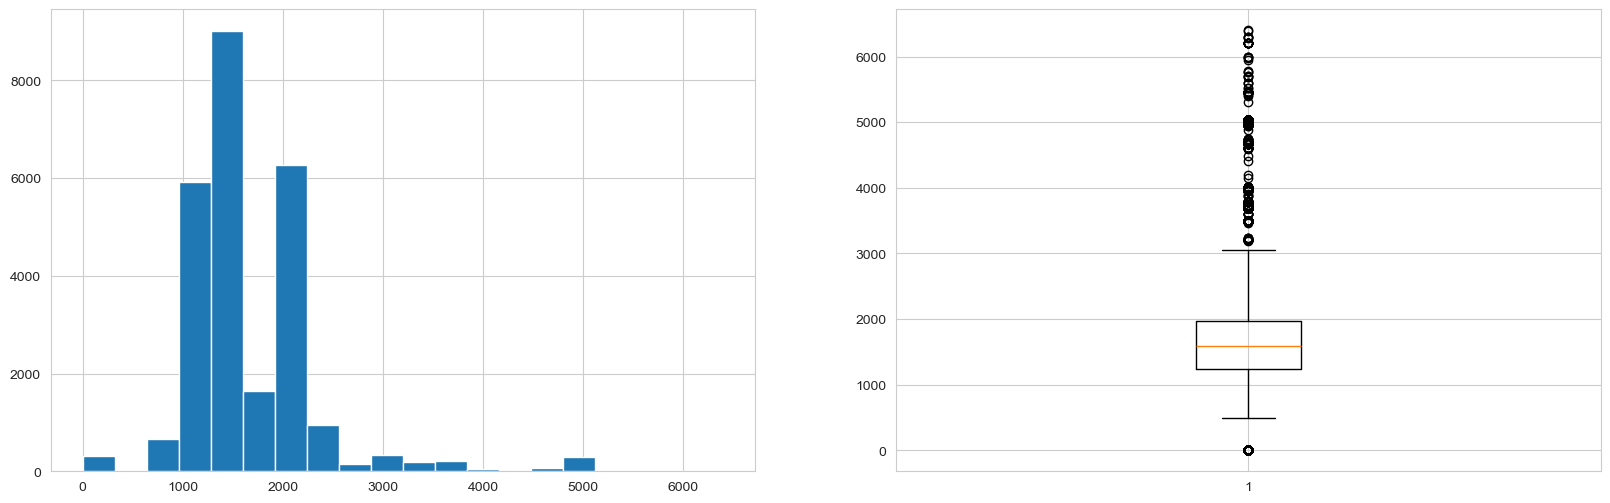

In [87]:
# After the modification above, let's check again how the observations in "engine_size" feature are distributed via Histogram and Boxplot

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["engine_size"], bins=20)

plt.subplot(122)
plt.boxplot(df["engine_size"])

plt.show()

In [88]:
# len(df[df["fuel_type"] == "Electric"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]  )

In [89]:
# Let's find the average engine size

df["engine_size"].mean()

1658.130691173655

In [90]:
# Let's find the engine size at the middle

df["engine_size"].median()

1582.0

#### The examination of extreme values by means of z-score

In [91]:
# Print the number of rows before dropping outliers
print("Number of rows before dropping outliers:", len(df))

# Calculate the Modified z-scores for the feature
z_scores = np.abs((df["engine_size"] - df["engine_size"].median()) / df["engine_size"].std())

# Drop the rows with z-scores above the threshold
df = df[z_scores < 3]

# Drop the rows with z-scores above the threshold
df.reset_index(drop=True, inplace=True)

# Print the number of rows after dropping outliers
print("Number of rows after dropping outliers:", len(df))

# ?????????????????? We did NOT lose any car whose engine size is 1 and fuel type is Electric ??????????????

Number of rows before dropping outliers: 26115
Number of rows after dropping outliers: 25446


In [92]:
# len(df[df["fuel_type"] == "Electric"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]  )

#### The distribution of engine sizes after modification by z-score

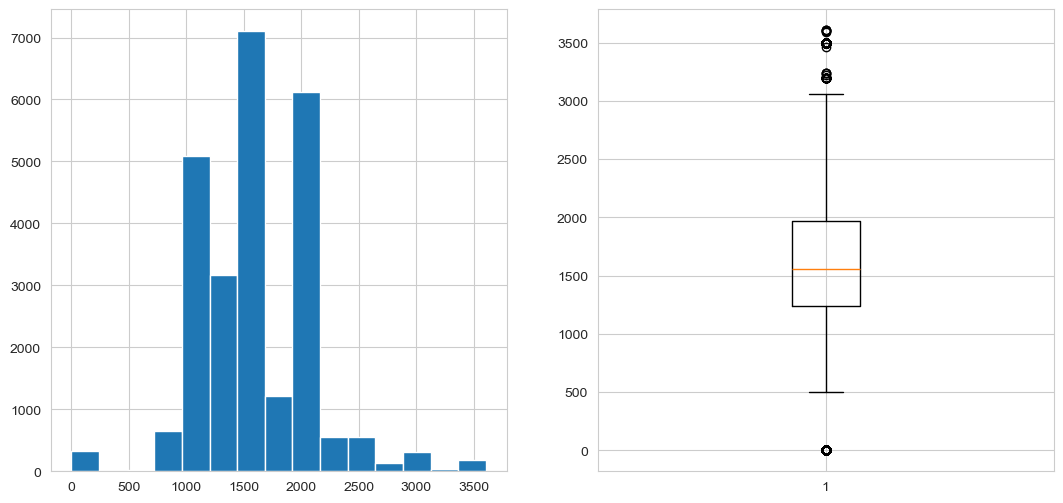

In [93]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.hist(df["engine_size"], bins=15)

plt.subplot(132)
plt.boxplot(df["engine_size"])

plt.show()

<Figure size 1600x600 with 0 Axes>

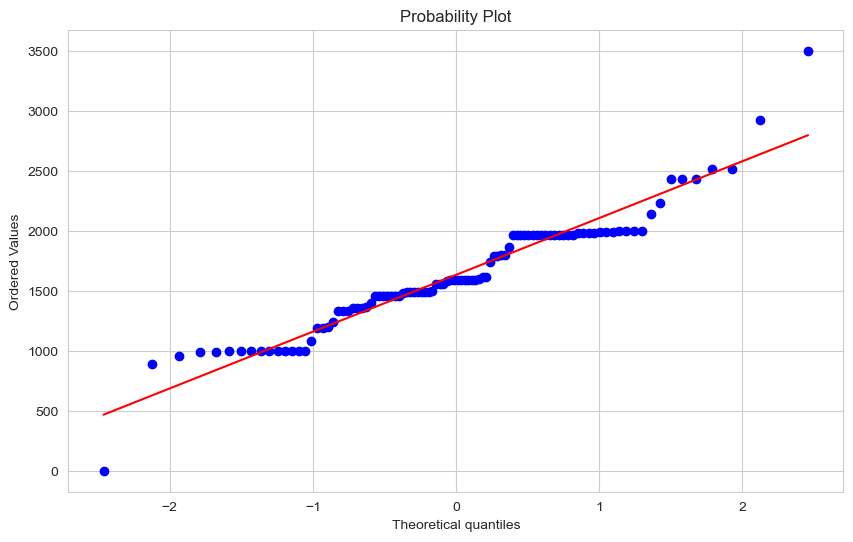

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(16, 6))

# Sample 50 observations from the 'engine_size' column
my_data = df['engine_size'].sample(100)

# Calculate the mean and standard deviation of the sample
mu = np.mean(my_data)
sigma = np.std(my_data)

# Generate a normal distribution with the same mean and standard deviation as the sample
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution as a dotted red line on the Q-Q plot
# plt.plot(x, y, 'r--', linewidth=2)

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(my_data, dist="norm", plot=ax)

# Show the plot
plt.show()

In [95]:
# Let's check some basic information after dropping/modifying extreme values in "engine_size" feature

first_looking(df, "engine_size")

# 26115 - 25446 = 669 extreme values were dropped from the dataset

column name    :  engine_size
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  330
shape_of_df    :  (25446, 28)
--------------------------------
engine_size
1598.00    2181
999.00     2143
1969.00    1602
1461.00    1107
1998.00     970
998.00      953
1199.00     926
1498.00     786
1997.00     632
1968.00     615
1984.00     550
1332.00     528
1560.00     445
1798.00     443
898.00      433
1242.00     417
1499.00     413
1197.00     384
1368.00     357
1995.00     344
1248.00     328
1600.00     291
2435.00     262
1991.00     245
2143.00     244
0.00        239
1364.00     229
1500.00     209
1591.00     202
1956.00     201
2000.00     191
3498.00     177
1395.00     175
1987.00     164
1200.00     162
1149.00     157
1796.00     154
1490.00     153
1950.00     153
1198.00     153
1398.00     146
1497.00     141
1496.00     134
1794.00     132
1618.00     128
1482.00     127
1999.00     126
1582.00     125
2400.00     121
1595.00     

## gears

In [96]:
# Let's explore basic information about "gears"

first_looking(df, "gears")

column name    :  gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  11
shape_of_df    :  (25446, 28)
--------------------------------
gears
6.00     11424
5.00      7373
7.00      2292
8.00      2203
1.00      1191
9.00       584
4.00       290
3.00        35
10.00       29
0.00        24
2.00         1
Name: count, dtype: int64


In [97]:
# Let's explore Descriptive Satatistics on "gears"

display(df.gears.describe())

# Differences between intervals
diff1 = df.gears.describe()['mean'] - df.gears.describe()['std']
diff2 = df.gears.describe()['25%'] - df.gears.describe()['min']
diff3 = df.gears.describe()['max'] - df.gears.describe()['75%']

print(f"The difference between the {color.BOLD + color.BLUE}mean value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['mean']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}standard deviation{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['std']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff1:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}25th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['25%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}minimum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['min']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff2:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}75th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['75%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}maximum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['max']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff3:.2f}{color.RED + color.END}.")

count   25446.00
mean        5.78
std         1.47
min         0.00
25%         5.00
50%         6.00
75%         6.00
max        10.00
Name: gears, dtype: float64

The difference between the mean value (19134.75) and the standard deviation (10463.75) is 4.31.
The difference between the 25th percentile (11900.00) and the minimum value (490.00) is 5.00.
The difference between the 75th percentile (25000.00) and the maximum value (51940.00) is 4.00.


#### The distribution of gears

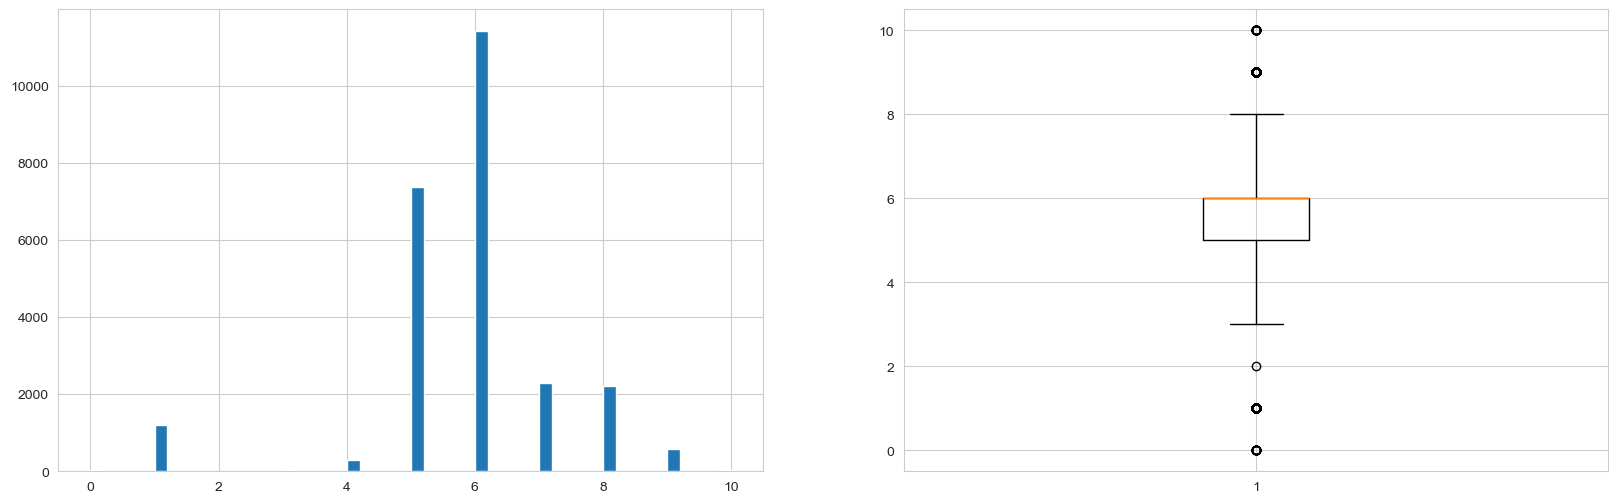

In [98]:
# Let's check how the observations in "gears" feature are distributed via Histogram and Boxplot

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.gears, bins=50)

plt.subplot(122)
plt.boxplot(df.gears, whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

In [99]:
# Let's examine the first highest 20 observation in "gears" to see if there have been some extreme values away from others

df.sort_values(by=["gears"], ascending=False)["gears"].head(20)

19412   10.00
19337   10.00
19446   10.00
19377   10.00
19433   10.00
19342   10.00
19284   10.00
19441   10.00
19434   10.00
19438   10.00
19456   10.00
19440   10.00
19405   10.00
19587   10.00
19282   10.00
19439   10.00
19271   10.00
19407   10.00
19287   10.00
19729   10.00
Name: gears, dtype: float64

In [100]:
# Let's examine the first lowest 20 observation in "gears" to see if there have been some extreme values away from others

df.sort_values(by=["gears"], ascending=True)["gears"].head(20)

21394   0.00
19785   0.00
4083    0.00
17081   0.00
16400   0.00
25379   0.00
25378   0.00
16599   0.00
7886    0.00
17092   0.00
17089   0.00
17043   0.00
16386   0.00
17033   0.00
21212   0.00
5079    0.00
16552   0.00
717     0.00
11516   0.00
13763   0.00
Name: gears, dtype: float64

In [101]:
# Let's explore the vehicles having gears less than five (5) and greater than eight (8)

df[(df.gears < 5) | (df.gears > 8)][["make_model", "body_type", "gearbox", "fuel_type", "gears"]]

make_model      body_type    gearbox           fuel_type  \
7      Mercedes-Benz A 200        Compact  Automatic              Diesel   
29     Mercedes-Benz E 220        Compact     Manual              Diesel   
68     Mercedes-Benz V 220        Compact     Manual              Diesel   
82     Mercedes-Benz E 300        Compact  Automatic  Liquid/Natural Gas   
83     Mercedes-Benz A 180        Compact  Automatic              Diesel   
...                    ...            ...        ...                 ...   
25100            Volvo 240  Station Wagon     Manual  Liquid/Natural Gas   
25288            Volvo S90          Sedan  Automatic             Benzine   
25332            Volvo 240          Sedan  Automatic             Benzine   
25378            Volvo S90          Sedan  Automatic              Diesel   
25379            Volvo S90          Sedan  Automatic              Diesel   

       gears  
7       1.00  
29      9.00  
68      9.00  
82      9.00  
83      1.00  
...      ...  
25100   1.00  
25288   4.00  
25332   1.00  
25378   0.00  
25379   0.00  

[2154 rows x 5 columns]

**Let's focus on the engine size range of "Mercedes-Benz A 200"**

In [102]:
# define a function to highlight the highest, median, and minimum values in a column
def highlight_max_median_min(s):
    is_max = s == s.max()
    is_median = s == s.median()
    is_min = s == s.min()
    return ["background-color: pink" if v else "background-color: lightgreen" if w else "background-color: yellow" if x else "" for v, w, x in zip(is_max, is_median, is_min)]

# filter the DataFrame and apply the styling function
styled_df = df[(df.make_model == "Mercedes-Benz A 200")][["make_model", "body_type", "gearbox", "drivetrain", "gears", "fuel_type"]].style.apply(highlight_max_median_min, subset=["gears"])

# display the styled DataFrame
styled_df

### 📝 Domain Knowledge on Electric Vehicles:

**Do electric cars have gears?**

One of the most common questions regarding the latest in passenger-car technology is: Do electric cars have gears? The question really should be: Do electric vehicles have more than one gear, but, **in both cases** the broad answer is **``NO``**, they don’t. That’s in the case of production cars anyway, and the reason is simple: They don’t really need more than one gear.

**However**, if the vehicle is hybrit, it might have more than one gear.

**🧐 [SOURCE - Do electric cars have gears?](https://www.carsguide.com.au/car-advice/q-and-a/do-electric-cars-have-gears-84694)**

**As seen below, the majority of Electric Cars have a gear of 1:**

In [103]:
# Let's explore the characteristics of vehicles whose fuel type is Electric

df[(df["fuel_type"] == "Electric")][["make_model", "body_type", "gearbox", "drivetrain", "gears"]]

make_model         body_type    gearbox drivetrain  gears
1742            Opel Corsa           Compact  Automatic      Front   1.00
2658            Opel Mokka  Off-Road/Pick-Up  Automatic      Front   1.00
3780           Renault Zoe           Compact  Automatic      Front   1.00
3787           Renault Zoe           Compact  Automatic      Front   1.00
3791           Renault Zoe           Compact  Automatic      Front   1.00
3794           Renault Zoe           Compact  Automatic      Front   1.00
3805         Renault Twizy           Compact  Automatic       Rear   1.00
3807           Renault Zoe           Compact  Automatic      Front   1.00
3840           Renault Zoe           Compact  Automatic      Front   1.00
3853         Renault Twizy           Compact  Automatic       Rear   1.00
3881        Renault Twingo           Compact  Automatic       Rear   1.00
3889           Renault Zoe           Compact  Automatic      Front   1.00
3894           Renault Zoe           Compact  Automatic      Front   1.00
3903           Renault Zoe           Compact  Automatic      Front   1.00
3907         Renault Twizy           Compact  Automatic       Rear   1.00
3915           Renault Zoe           Compact  Automatic      Front   1.00
3920           Renault Zoe           Compact  Automatic      Front   1.00
3926           Renault Zoe           Compact  Automatic      Front   1.00
3935           Renault Zoe           Compact  Automatic      Front   1.00
3936           Renault Zoe           Compact  Automatic      Front   1.00
3948           Renault Zoe           Compact  Automatic      Front   1.00
3949           Renault Zoe           Compact  Automatic      Front   1.00
3951           Renault Zoe           Compact  Automatic      Front   1.00
3960           Renault Zoe           Compact  Automatic      Front   1.00
3964           Renault Zoe           Compact  Automatic      Front   1.00
3988           Renault Zoe           Compact  Automatic      Front   1.00
3990           Renault Zoe           Compact  Automatic      Front   1.00
4002           Renault Zoe           Compact  Automatic      Front   1.00
4007           Renault Zoe           Compact  Automatic      Front   1.00
4008           Renault Zoe           Compact  Automatic      Front   1.00
4009           Renault Zoe           Compact  Automatic      Front   1.00
4013           Renault Zoe           Compact  Automatic      Front   1.00
4016           Renault Zoe           Compact  Automatic      Front   1.00
4029           Renault Zoe           Compact  Automatic      Front   1.00
4032           Renault Zoe           Compact  Automatic      Front   1.00
4035           Renault Zoe           Compact  Automatic      Front   1.00
4036           Renault Zoe           Compact  Automatic      Front   1.00
4041           Renault Zoe           Compact  Automatic      Front   1.00
4048           Renault Zoe           Compact  Automatic      Front   1.00
4054           Renault Zoe           Compact  Automatic      Front   1.00
4058           Renault Zoe           Compact  Automatic      Front   1.00
4061           Renault Zoe           Compact  Automatic      Front   1.00
4063           Renault Zoe           Compact  Automatic      Front   1.00
4077           Renault Zoe           Compact  Automatic      Front   1.00
4078           Renault Zoe           Compact  Automatic      Front   1.00
4081           Renault Zoe           Compact  Automatic      Front   1.00
4083           Renault Zoe           Compact  Automatic      Front   0.00
4090           Renault Zoe           Compact  Automatic      Front   1.00
4095           Renault Zoe           Compact  Automatic      Front   1.00
4101         Renault Twizy           Compact  Automatic       Rear   1.00
4104           Renault Zoe           Compact  Automatic      Front   1.00
4109           Renault Zoe           Compact  Automatic      Front   1.00
4110        Renault Twingo           Compact  Automatic       Rear   1.00
4124           Renau

**What About Classic ``Modern`` Vehicles?**

**Domain Knowledge on Electric Vehicles:**

**Is it possible that there have been ``MODERN cars`` with manual/automatic transmissions with 1, 2, 3, 4, 9, 50 gears?**

Most modern cars with manual transmissions have 5 or 6 forward gears. Most modern cars with automatic transmissions have 5–8 forward gears. A few have as many as 10 🧐 [Source](https://www.quora.com/What-are-maximum-number-of-transmission-gears).
Contemporary manual transmissions for cars typically use five or six forward gears ratios and one reverse gear, however, transmissions with between two and seven gears have been produced at times 🧐 [Source](https://en.wikipedia.org/wiki/Manual_transmission).

**Let's take a look at the gear numbers of other vehicles rather than electric vehicles in the dataset:**

In [104]:
# Let's explore gear characteristics of vehicles whose fuel type is Benzine OR Diesel OR Liquid/Natural Gas

df[((df["fuel_type"] == "Benzine")|(df["fuel_type"] == "Diesel")|(df["fuel_type"] == "Liquid/Natural Gas"))][["fuel_type", "gears", "make_model"]].value_counts()

fuel_type           gears  make_model              
Diesel              6.00   Volvo V40                   562
Benzine             5.00   Dacia Sandero               501
                    6.00   Hyundai I30                 458
                           Renault Megane              437
                    5.00   Volvo C70                   377
                    6.00   Seat Leon                   339
                    5.00   Nissan Micra                303
                    6.00   Ford Focus                  281
                    5.00   Fiat 500                    275
                    6.00   Ford Fiesta                 265
Diesel              6.00   Renault Megane              259
Benzine             6.00   Opel Astra                  243
                    5.00   Seat Ibiza                  223
Diesel              6.00   Nissan Qashqai              217
Benzine             6.00   Nissan Qashqai              208
                    7.00   Seat Leon                   192
    

<div style="background-color: #ffeeba; padding: 10px; font-size: 14px; font-weight: bold;">
    Domain Knowledge: Ford Mustang has 6 Speed Automatic Gear Box
</div>

In [105]:
# Let's focus on the characteristics of Ford Mustang whose fuel type is NOT Electric

df[(df.make_model == "Ford Mustang") & ~(df["fuel_type"] == "Electric")][["make_model", "body_type", "gearbox", "drivetrain", "gears", "fuel_type"]]

make_model    body_type         gearbox drivetrain  gears  \
19271  Ford Mustang  Convertible       Automatic       Rear  10.00   
19272  Ford Mustang  Convertible       Automatic       Rear   6.00   
19273  Ford Mustang  Convertible          Manual       Rear   6.00   
19274  Ford Mustang  Convertible          Manual       Rear   6.00   
19275  Ford Mustang  Convertible          Manual       Rear   6.00   
19276  Ford Mustang  Convertible       Automatic       Rear   6.00   
19281  Ford Mustang  Convertible          Manual       Rear   6.00   
19282  Ford Mustang  Convertible       Automatic       Rear  10.00   
19283  Ford Mustang  Convertible       Automatic       Rear   6.00   
19284  Ford Mustang  Convertible       Automatic       Rear  10.00   
19285  Ford Mustang  Convertible          Manual       Rear   6.00   
19286  Ford Mustang  Convertible          Manual       Rear   6.00   
19287  Ford Mustang  Convertible  Semi-automatic       Rear  10.00   
19289  Ford Mustang  Convertible       Automatic       Rear   6.00   
19298  Ford Mustang  Convertible       Automatic       Rear   6.00   
19300  Ford Mustang  Convertible          Manual        4WD   6.00   
19301  Ford Mustang  Convertible       Automatic       Rear   6.00   
19305  Ford Mustang  Convertible          Manual       Rear   6.00   
19306  Ford Mustang  Convertible          Manual       Rear   6.00   
19310  Ford Mustang  Convertible          Manual       Rear   6.00   
19312  Ford Mustang  Convertible       Automatic       Rear   6.00   
19320  Ford Mustang  Convertible          Manual       Rear   6.00   
19322  Ford Mustang  Convertible       Automatic      Front   6.00   
19323  Ford Mustang  Convertible       Automatic       Rear   6.00   
19325  Ford Mustang  Convertible       Automatic       Rear   6.00   
19326  Ford Mustang  Convertible          Manual       Rear   6.00   
19328  Ford Mustang  Convertible          Manual       Rear   6.00   
19329  Ford Mustang  Convertible       Automatic       Rear   6.00   
19330  Ford Mustang  Convertible          Manual       Rear   5.00   
19332  Ford Mustang  Convertible       Automatic       Rear   6.00   
19333  Ford Mustang  Convertible       Automatic       Rear   6.00   
19336  Ford Mustang  Convertible          Manual       Rear   6.00   
19337  Ford Mustang  Convertible       Automatic       Rear  10.00   
19340  Ford Mustang  Convertible       Automatic       Rear   6.00   
19342  Ford Mustang  Convertible  Semi-automatic       Rear  10.00   
19343  Ford Mustang  Convertible       Automatic       Rear   6.00   
19344  Ford Mustang  Convertible          Manual       Rear   6.00   
19345  Ford Mustang  Convertible          Manual       Rear   6.00   
19348  Ford Mustang  Convertible          Manual       Rear   6.00   
19351  Ford Mustang  Convertible       Automatic       Rear   6.00   
19352  Ford Mustang  Convertible          Manual       Rear   6.00   
19353  Ford Mustang  Convertible       Automatic       Rear   6.00   
19355  Ford Mustang  Convertible       Automatic       Rear   6.00   
19356  Ford Mustang  Convertible       Automatic       Rear   6.00   
19357  Ford Mustang  Convertible          Manual       Rear   6.00   
19358  Ford Mustang  Convertible       Automatic       Rear   8.00   
19360  Ford Mustang  Convertible       Automatic       Rear   6.00   
19361  Ford Mustang  Convertible          Manual       Rear   6.00   
19362  Ford Mustang  Convertible       Automatic       Rear   6.00   
19363  Ford Mustang  Convertible          Manual       Rear   6.00   
19366  Ford Mustang  Convertible          Manual       Rear   6.00   
19367  Ford Mustang  Convertible       Automatic       Rear  10.00   
19368  Ford Mustang  Convertible       Automatic       Rear   6.00   
19369  Ford Mustang  Convertible          Manual       Rear   6.00   
19371  Ford Mustang  Convertible       Automatic       Rear   6.00   
19372  Ford Mustang  Convertible       Automatic       Rear   6.00   
19374  Ford Mustang

In [106]:
# Let's assign the number of gears for ALL Ford Mustang whose fuel type is NOT Electric to six (6)

df.loc[((df.make_model == "Ford Mustang") & ~(df["fuel_type"] == "Electric")), "gears"] = 6
df.loc[((df.make_model == "Ford Mustang") & ~(df["fuel_type"] == "Electric")), "gears"]

19271   6.00
19272   6.00
19273   6.00
19274   6.00
19275   6.00
19276   6.00
19281   6.00
19282   6.00
19283   6.00
19284   6.00
19285   6.00
19286   6.00
19287   6.00
19289   6.00
19298   6.00
19300   6.00
19301   6.00
19305   6.00
19306   6.00
19310   6.00
19312   6.00
19320   6.00
19322   6.00
19323   6.00
19325   6.00
19326   6.00
19328   6.00
19329   6.00
19330   6.00
19332   6.00
19333   6.00
19336   6.00
19337   6.00
19340   6.00
19342   6.00
19343   6.00
19344   6.00
19345   6.00
19348   6.00
19351   6.00
19352   6.00
19353   6.00
19355   6.00
19356   6.00
19357   6.00
19358   6.00
19360   6.00
19361   6.00
19362   6.00
19363   6.00
19366   6.00
19367   6.00
19368   6.00
19369   6.00
19371   6.00
19372   6.00
19374   6.00
19376   6.00
19377   6.00
19378   6.00
19379   6.00
19380   6.00
19381   6.00
19382   6.00
19383   6.00
19384   6.00
19386   6.00
19387   6.00
19388   6.00
19389   6.00
19391   6.00
19392   6.00
19394   6.00
19399   6.00
19401   6.00
19402   6.00
19404   6.00

<div style="background-color: #ffeeba; padding: 10px; font-size: 14px; font-weight: bold;">
    Unlike Ford Mustang, the Japanese market C-HR is powered by either <code>1.2-litre turbocharged petrol engine</code>, OR <code>1.8-litre Hybrid</code>. The FWD models are available with both engines, while the only motor for the AWD models is 1.2-litre turbo.

So, we will <u>keep the values</u> of <code>gears</code> for it.
</div>

In [107]:
df[(df.make_model == "Toyota C-HR") & ~(df["fuel_type"] == "Electric")][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "fuel_type"]]

Empty DataFrame
Columns: [make_model, age, body_type, gearbox, drivetrain, gears, fuel_type]
Index: []

<div style="background-color: lightgreen; padding: 10px; font-size: 14px; font-weight: bold;">
    <b><u>Conclusion:</u></b>

Due to the confusion and unstandardized situations in the concepts of the automotive sector mentioned above, <code>more than 8-gear for traditional vehicles</code> or <code>vehicles having 0-Gear for electric ones</code> will be EITHER deducted from the dataset OR imputed consistent with <code>"make_model"</code>` & <code>"body_type"</code> features, assuming that they do NOT reflect reality.
</div>

In [108]:
# Let's explore gear characteristics of vehicles having greater than eight (8) according to our Domain Knowledge above

df[df.gears > 8][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "fuel_type"]]

make_model   age         body_type    gearbox drivetrain  \
29          Mercedes-Benz E 220  6.00           Compact     Manual       Rear   
68          Mercedes-Benz V 220  6.00           Compact     Manual      Front   
82          Mercedes-Benz E 300 36.00           Compact  Automatic       Rear   
258         Mercedes-Benz E 220  5.00           Compact  Automatic       Rear   
349    Mercedes-Benz Slc 43 Amg  6.00       Convertible  Automatic       Rear   
352       Mercedes-Benz Slc 250  6.00       Convertible  Automatic       Rear   
358         Mercedes-Benz E 400  7.00       Convertible  Automatic        4WD   
363         Mercedes-Benz E 400  6.00       Convertible  Automatic        4WD   
364       Mercedes-Benz Slk 250  7.00       Convertible  Automatic       Rear   
369      Mercedes-Benz C 43 Amg  5.00       Convertible  Automatic        4WD   
371      Mercedes-Benz C 43 Amg  5.00       Convertible  Automatic        4WD   
374         Mercedes-Benz C 300  5.00       Convertible  Automatic       Rear   
376      Mercedes-Benz C 43 Amg  4.00       Convertible  Automatic        4WD   
377    Mercedes-Benz Slc 43 Amg  5.00       Convertible  Automatic       Rear   
380         Mercedes-Benz E 220  5.00       Convertible  Automatic       Rear   
381         Mercedes-Benz E 300  5.00       Convertible  Automatic       Rear   
382         Mercedes-Benz E 400  7.00       Convertible  Automatic        4WD   
383         Mercedes-Benz C 200  6.00       Convertible  Automatic       Rear   
384       Mercedes-Benz Slc 200  5.00       Convertible  Automatic       Rear   
392         Mercedes-Benz C 180  5.00       Convertible  Automatic       Rear   
395         Mercedes-Benz C 250  5.00       Convertible  Automatic       Rear   
396         Mercedes-Benz C 200  4.00       Convertible  Automatic       Rear   
398         Mercedes-Benz C 220  4.00       Convertible  Automatic        4WD   
401         Mercedes-Benz E 200  4.00       Convertible  Automatic       Rear   
407         Mercedes-Benz E 220  6.00       Convertible  Automatic       Rear   
408         Mercedes-Benz E 400  4.00       Convertible  Automatic        4WD   
412         Mercedes-Benz C 200  3.00       Convertible  Automatic       Rear   
416      Mercedes-Benz C 43 Amg  4.00       Convertible  Automatic        4WD   
419         Mercedes-Benz C 250  5.00       Convertible  Automatic       Rear   
421         Mercedes-Benz C 300  3.00       Convertible  Automatic       Rear   
422         Mercedes-Benz C 180  1.00       Convertible  Automatic       Rear   
423         Mercedes-Benz C 250  4.00       Convertible  Automatic       Rear   
426       Mercedes-Benz Slc 200  3.00       Convertible  Automatic       Rear   
430         Mercedes-Benz C 200  1.00       Convertible  Automatic       Rear   
433         Mercedes-Benz E 300  4.00       Convertible  Automatic       Rear   
435         Mercedes-Benz E 300 10.00       Convertible  Automatic       Rear   
442         Mercedes-Benz E 200  3.00       Convertible  Automatic       Rear   
443         Mercedes-Benz C 180  4.00       Convertible  Automatic       Rear   
444         Mercedes-Benz C 220  4.00       Convertible  Automatic        4WD   
445         Mercedes-Benz C 200  4.00       Convertible  Automatic       Rear   
447         Mercedes-Benz C 220  5.00       Convertible  Automatic      Front   
456         Mercedes-Benz C 300  2.00       Convertible  Automatic       Rear   
460         Mercedes-Benz C 180  3.00       Convertible  Automatic       Rear   
461         Mercedes-Benz C 220  4.00       Convertible  Automatic        4WD   
463         Mercedes-Benz C 180  3.00       Convertible     Manual       Rear   
464         Mercedes-Benz C 180  4.00       Convertible  Automatic       Rear   
467       Mercedes-Benz Slc 200  2.00       Convertible  Automatic       Rear   
468         Mercedes-Benz C 300  4.00       Convertible  Automatic       Rear   
469         Mercedes-Benz C 250  4.00       Converti

In [109]:
# Let's explore characteristics of vehicles whose gear number equals to zero(0) 

df[df.gears == 0][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "fuel_type"]]

make_model   age         body_type         gearbox drivetrain  \
717    Mercedes-Benz E 300  3.00             Coupe       Automatic       Rear   
4083           Renault Zoe  3.00           Compact       Automatic      Front   
5079        Renault Kadjar  2.00  Off-Road/Pick-Up       Automatic      Front   
7886       Peugeot Partner  4.00     Station Wagon          Manual      Front   
8534              Fiat 500  1.00           Compact       Automatic      Front   
11516         Seat Tarraco  3.00  Off-Road/Pick-Up       Automatic        4WD   
13763        Skoda Octavia  0.00             Sedan       Automatic      Front   
16386          Toyota C-Hr  4.00  Off-Road/Pick-Up       Automatic      Front   
16400          Toyota C-Hr  1.00  Off-Road/Pick-Up       Automatic      Front   
16552       Toyota Corolla  3.00     Station Wagon       Automatic      Front   
16573       Toyota Corolla  1.00     Station Wagon       Automatic      Front   
16599       Toyota Corolla  3.00     Station Wagon       Automatic      Front   
17018         Toyota Yaris  3.00             Sedan       Automatic      Front   
17033         Toyota Yaris  3.00             Sedan       Automatic      Front   
17043         Toyota Yaris  4.00             Sedan       Automatic      Front   
17081         Toyota Yaris  3.00             Sedan       Automatic      Front   
17089         Toyota Yaris  4.00             Sedan       Automatic      Front   
17092         Toyota Yaris  4.00             Sedan       Automatic      Front   
18691         Nissan Micra  0.00             Sedan       Automatic      Front   
19785            Ford Kuga  0.00  Off-Road/Pick-Up  Semi-automatic        4WD   
21212        Hyundai Excel 24.00             Coupe       Automatic      Front   
21394         Hyundai Kona  2.00  Off-Road/Pick-Up       Automatic      Front   
25378            Volvo S90  5.00             Sedan       Automatic        4WD   
25379            Volvo S90  5.00             Sedan       Automatic        4WD   

       gears fuel_type  
717     0.00    Diesel  
4083    0.00  Electric  
5079    0.00   Benzine  
7886    0.00  Electric  
8534    0.00   Benzine  
11516   0.00    Diesel  
13763   0.00   Benzine  
16386   0.00   Benzine  
16400   0.00   Benzine  
16552   0.00   Benzine  
16573   0.00   Benzine  
16599   0.00   Benzine  
17018   0.00   Benzine  
17033   0.00   Benzine  
17043   0.00   Benzine  
17081   0.00   Benzine  
17089   0.00   Benzine  
17092   0.00   Benzine  
18691   0.00   Benzine  
19785   0.00    Diesel  
21212   0.00   Benzine  
21394   0.00  Electric  
25378   0.00    Diesel  
25379   0.00    Diesel

In [110]:
# Let's explore characteristics of vehicles whose gear numbers are more than one (1) and less than five (5)

df[(df.gears > 1) & (df.gears < 5)][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "fuel_type"]]

make_model   age         body_type    gearbox drivetrain  \
328         Mercedes-Benz 220 13.00           Compact     Manual       Rear   
424      Mercedes-Benz Sl 300 35.00       Convertible  Automatic       Rear   
440      Mercedes-Benz Sl 280 43.00       Convertible  Automatic       Rear   
462      Mercedes-Benz Sl 280 27.00       Convertible  Automatic       Rear   
493         Mercedes-Benz 220  3.00       Convertible  Automatic       Rear   
511      Mercedes-Benz Sl 280 41.00       Convertible     Manual       Rear   
531      Mercedes-Benz Sl 350 49.00       Convertible  Automatic       Rear   
532      Mercedes-Benz Sl 280 29.00       Convertible     Manual       Rear   
613         Mercedes-Benz 280 44.00             Coupe  Automatic       Rear   
825       Mercedes-Benz G 230 29.00  Off-Road/Pick-Up  Automatic        4WD   
853       Mercedes-Benz G 230 29.00  Off-Road/Pick-Up  Automatic        4WD   
862       Mercedes-Benz G 230 29.00  Off-Road/Pick-Up  Automatic        4WD   
871       Mercedes-Benz G 230 28.00  Off-Road/Pick-Up  Automatic        4WD   
1219   Mercedes-Benz C 36 Amg 27.00             Sedan  Automatic       Rear   
1343   Mercedes-Benz C 36 Amg 26.00             Sedan  Automatic       Rear   
1345   Mercedes-Benz C 36 Amg 26.00             Sedan  Automatic       Rear   
2224                  Opel Gt 49.00             Coupe     Manual       Rear   
2227               Opel Tigra 22.00             Coupe  Automatic      Front   
2232                  Opel Gt 53.00             Coupe     Manual       Rear   
2233                  Opel Gt 52.00             Coupe     Manual       Rear   
2257           Opel Commodore 51.00             Coupe  Automatic       Rear   
2259               Opel Manta 51.00             Coupe  Automatic       Rear   
2265              Opel Rekord 58.00             Coupe     Manual       Rear   
2266               Opel Manta 49.00             Coupe     Manual       Rear   
2267           Opel Commodore 53.00             Coupe  Automatic       Rear   
2270              Opel Rekord 45.00             Coupe     Manual       Rear   
2274              Opel Rekord 65.00             Coupe     Manual       Rear   
2276              Opel Rekord 50.00             Coupe     Manual       Rear   
2279               Opel Monza 44.00             Coupe  Automatic       Rear   
2288               Opel Manta 49.00             Coupe  Automatic       Rear   
2290               Opel Monza 43.00             Coupe     Manual       Rear   
2293              Opel Rekord 46.00             Coupe     Manual      Front   
2298                  Opel Gt 53.00             Coupe     Manual       Rear   
2305                  Opel Gt 53.00             Coupe     Manual       Rear   
2309                  Opel Gt 53.00             Coupe     Manual       Rear   
2314                  Opel Gt 49.00             Coupe     Manual       Rear   
2319                  Opel Gt 49.00             Coupe     Manual       Rear   
2321               Opel Manta 46.00             Coupe     Manual      Front   
2322                  Opel Gt 49.00             Coupe     Manual       Rear   
2329                  Opel Gt 49.00             Coupe     Manual       Rear   
2331                  Opel Gt 54.00             Coupe     Manual       Rear   
2332                  Opel Gt 50.00             Coupe     Manual       Rear   
2335             Opel Calibra 27.00             Coupe  Automatic      Front   
2339               Opel Monza 43.00             Coupe     Manual       Rear   
2364                  Opel Gt 52.00             Coupe     Manual       Rear   
2367               Opel Manta 42.00             Coupe  Automatic       Rear   
2368               Opel Monza 43.00             Coupe     Manual       Rear   
2370              Opel Kadett 55.00             Coupe     Manual       Rear   
2376           Opel Commodore 49.00             Coupe     Manual       Rear   
2382                  Opel Gt 49.00             Coupe     Manual     

### 📝 Domain Knowledge on Some Old Vehicles:

- **1961 Mercury Comet** with a V6 101 HP engine and a **2-speed automatic transmission**.<br>
- **1957 Ford Thunderbird has 3-speed Fordomatic automatic 3-speed manual 3-speed overdrive manual transmission**.<br>
- All **automatic Nissan Stageas** were **4 speed**.<br>
- The **300ZX** offers you three types of transmissions to choose from-5-speed manual with the VG30ET and 5-speed manual or **4-speed automatic** with the VG30E.<br>
- The **Nissan Figaro** is equipped with a turbocharged, 4 cylinder, fuel injected MA10ET engine mated to a **3-speed automatic gearbox**.<br>

And so on.

In [111]:
# Let's assign gear numbers having zero (o) OR being greater than eight (8) to NaN

# df['gears'] = np.where(df.gears > 8, np.nan, df.gears)

df.loc[((df.gears == 0) | (df.gears > 8)), 'gears'] = np.nan

In [112]:
# Let's check how many NaNs there have been in "gears" feaature

df.gears.isnull().sum()

609

In [113]:
# This DEF will fill the missing values in the "gears" with the mode value based on "make_model" and "body_type"

fill(df, "make_model", "body_type", "gears", "mode")

COLUMN NAME    :  gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  8
--------------------------------
gears
1.00     1197
2.00        1
3.00       34
4.00      290
5.00     7395
6.00    11761
7.00     2552
8.00     2216
Name: count, dtype: int64


In [114]:
# Let's explore how many vehicles have two (2) gears

df[df.gears==2]

make_model  make model                             location    price  \
8283   Fiat 500  Fiat   500  Dreiangelweg 3,  92318 Neumarkt, DE 10950.00   

     body_type  type warranty  mileage gearbox fuel_type  seller  engine_size  \
8283   Compact  Used       No 13500.00  Manual   Benzine  Dealer      1242.00   

      gears  co_emissions drivetrain        extras  empty_weight  \
8283   2.00         93.00      Front  Winter tyres       1055.00   

     full_service_history upholstery  previous_owner energy_efficiency_class  \
8283                  Yes      Cloth            2.00             unefficient   

       age  power_kW  cons_avg comfort_&_convenience_Package  \
8283 11.00     17.00      4.15                      Standard   

     entertainment_&_media_Package safety_&_security_Package  
8283                Standard Media   Safety Standard Package

In [115]:
# Let's assign the index of vehicle haaving two (2) gears to an object

drop_index = df[df.gears==2].index
drop_index

Index([8283], dtype='int64')

In [116]:
# Let's drop the vehicle/s having two (2) gears from the DataFrame

print(df.shape)
df.drop(drop_index, axis=0, inplace=True)
print(df.shape)

(25446, 28)
(25445, 28)


#### The distribution of gears after modification

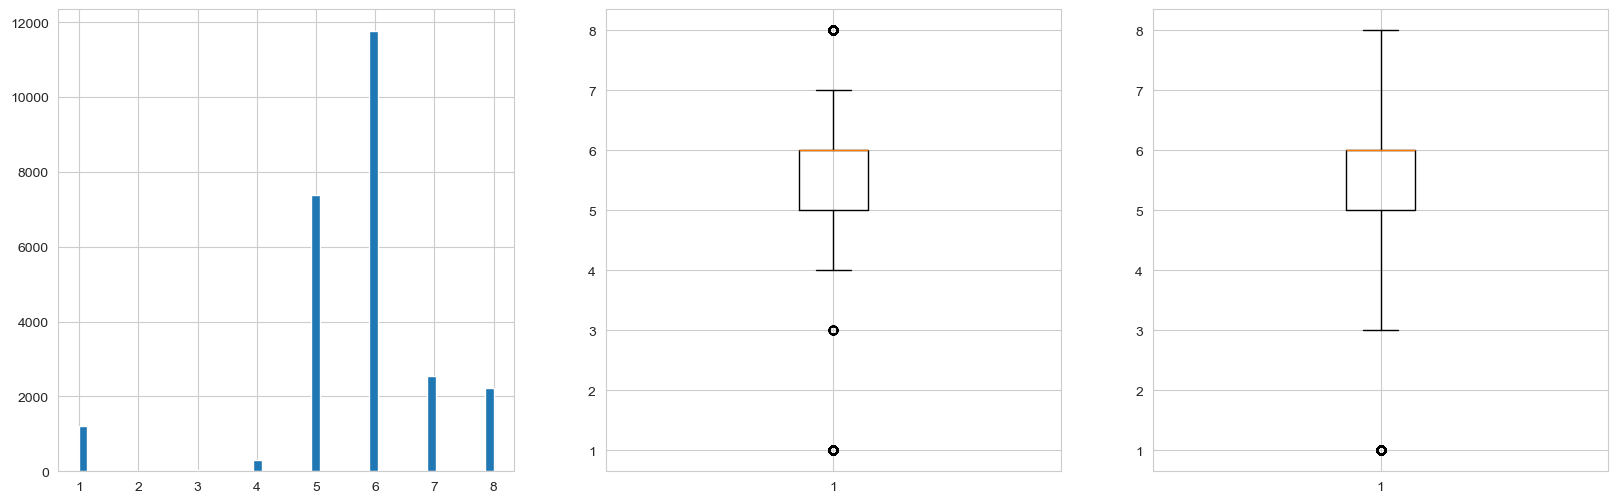

In [117]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.hist(df.gears, bins=50)

plt.subplot(132)
plt.boxplot(df.gears, whis=1.5)  # boxplot based on 1.5 whisker

plt.subplot(133)
plt.boxplot(df.gears, whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

In [118]:
# Let's check some basic information after dropping/modifying extreme values in "gears" feature

first_looking(df, "gears")

# 25446 - 25445 = 1 extreme values were dropped from the dataset

column name    :  gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  7
shape_of_df    :  (25445, 28)
--------------------------------
gears
6.00    11761
5.00     7395
7.00     2552
8.00     2216
1.00     1197
4.00      290
3.00       34
Name: count, dtype: int64


## empty_weight

In [119]:
# Let's explore basic information about "empty_weight"

first_looking(df, "empty_weight")

column name    :  empty_weight
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1104
shape_of_df    :  (25445, 28)
--------------------------------
empty_weight
1320.00     704
1280.00     502
1055.00     480
1395.00     416
1165.00     388
1115.00     350
1090.00     262
1315.00     250
1423.00     239
1370.00     238
1331.00     219
1239.00     214
1135.00     206
1310.00     200
1485.00     186
1245.00     185
1335.00     180
1550.00     180
1430.00     179
1425.00     178
1275.00     173
1295.00     171
1505.00     168
1597.00     166
1255.00     162
1680.00     160
1050.00     153
1355.00     151
905.00      144
1233.00     142
1375.00     136
1557.00     134
1063.00     130
1157.00     125
1615.00     125
1235.00     122
1735.00     120
1040.00     119
2075.00     113
1500.00     112
1575.00     112
1492.00     112
2169.00     111
1472.00     111
1350.00     109
950.00      109
1701.00     107
1076.00     105
980.00      104
1480.00  

In [120]:
# Let's explore Descriptive Satatistics on "empty_weight"

display(df.empty_weight.describe())

# Differences between intervals
diff1 = df.empty_weight.describe()['mean'] - df.empty_weight.describe()['std']
diff2 = df.empty_weight.describe()['25%'] - df.empty_weight.describe()['min']
diff3 = df.empty_weight.describe()['max'] - df.empty_weight.describe()['75%']

print(f"The difference between the {color.BOLD + color.BLUE}mean value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['mean']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}standard deviation{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['std']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff1:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}25th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['25%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}minimum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['min']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff2:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}75th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['75%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}maximum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['max']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff3:.2f}{color.RED + color.END}.")

count   25445.00
mean     1373.63
std       291.03
min       347.00
25%      1179.00
50%      1337.00
75%      1530.00
max     15590.00
Name: empty_weight, dtype: float64

The difference between the mean value (19135.07) and the standard deviation (10463.83) is 1082.59.
The difference between the 25th percentile (11900.00) and the minimum value (490.00) is 832.00.
The difference between the 75th percentile (25000.00) and the maximum value (51940.00) is 14060.00.


#### The distribution of empty weight

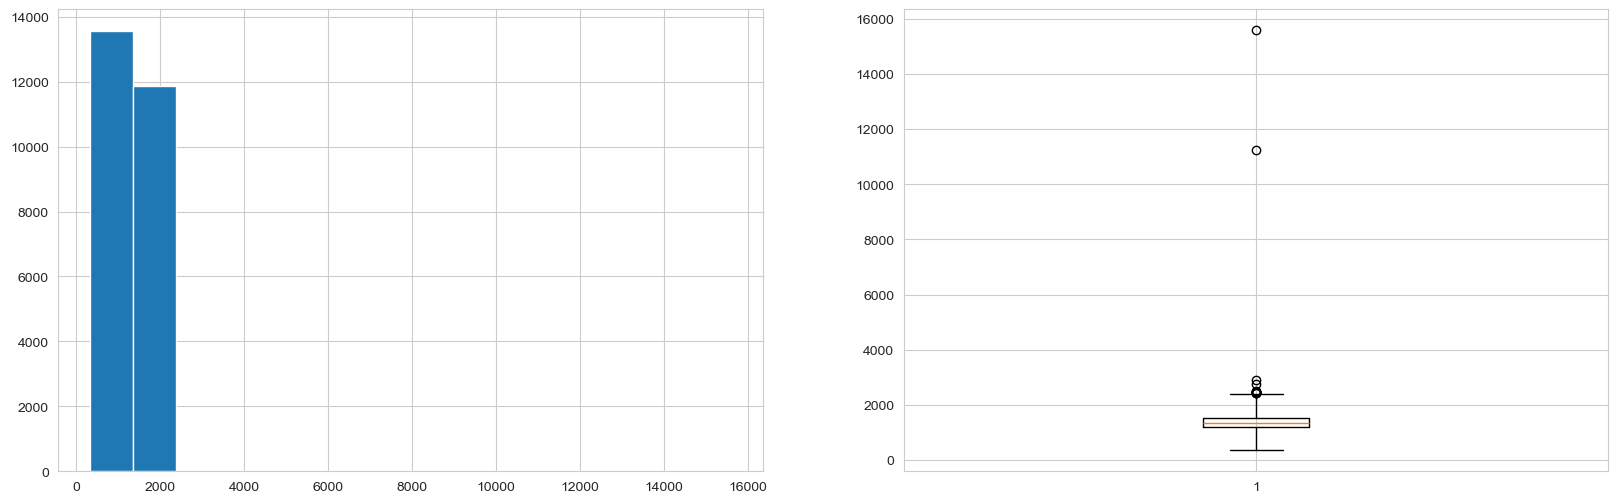

In [121]:
# Let's check how the observations in "empty_weight" feature are distributed via Histogram and Boxplot

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["empty_weight"], bins=15)

plt.subplot(122)
plt.boxplot(df["empty_weight"], whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

In [122]:
# Let's examine the first highest 20 observation in "empty_weight" to see if there have been some extreme values away from others

df.sort_values(by=["empty_weight"], ascending=False)["empty_weight"].head(20)

# df["empty_weight"].sort_values(ascending=False).head(20)

5727    15590.00
19257   11246.00
18183    2900.00
4356     2750.00
821      2505.00
1148     2475.00
19463    2466.00
769      2455.00
775      2455.00
68       2447.00
21623    2443.00
761      2410.00
760      2410.00
19922    2381.00
21263    2379.00
24125    2350.00
24403    2350.00
24284    2349.00
24003    2349.00
19709    2326.00
Name: empty_weight, dtype: float64

In [123]:
# Let's examine the first lowest 20 observation in "empty_weight" to see if there have been some extreme values away from others

# df.sort_values(by=["empty_weight"], ascending=True)["empty_weight"].head(20)

df["empty_weight"].sort_values(ascending=True).head(20)

5034    347.00
5073    375.00
3805    473.00
4372    473.00
3853    473.00
3907    473.00
4134    473.00
4683    474.00
3172    525.00
4101    562.00
4809    562.00
4708    562.00
4646    562.00
4797    562.00
8395    600.00
8397    600.00
10931   600.00
9371    600.00
4517    650.00
10567   670.00
Name: empty_weight, dtype: float64

**Let us examine empty_weights of vehicles more than 3150 kg:**

In [124]:
# Let's explore the vehicles' empty weight having greater than three thousand and one hundred fifty (3150)

df.loc[df["empty_weight"] > 3150][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]

make_model  age body_type    gearbox drivetrain  gears  engine_size  \
5727   Renault Zoe 3.00     Sedan  Automatic      Front   1.00         0.00   
19257  Ford Fiesta 1.00   Compact     Manual      Front   6.00       999.00   

      fuel_type  empty_weight  
5727   Electric      15590.00  
19257   Benzine      11246.00

In [125]:
# Let's explore the vehicles whose empty weight is greater than three thousand and one hundred fifty (3150)

# df.loc[df.make_model == "Mercedes-Benz G 500"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]
# df.loc[df.make_model == "Renault ZOE"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]
# df.loc[df.make_model == "Ford Fiesta"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]

**Let's focus on the engine size range of "Ford Fiesta"**

In [126]:
# define a function to highlight the highest, median, and minimum values in a column
def highlight_max_median_min(s):
    is_max = s == s.max()
    is_median = s == s.median()
    is_min = s == s.min()
    return ["background-color: pink" if v else "background-color: lightgreen" if w else "background-color: yellow" if x else "" for v, w, x in zip(is_max, is_median, is_min)]

# filter the DataFrame and apply the styling function
styled_df = df.loc[df.make_model == "Ford Fiesta"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]].style.apply(highlight_max_median_min, subset=["empty_weight"])

# display the styled DataFrame
styled_df

### 📝 Domain Knowledge About Empty/Curb Weights of Some Vehicles on the List Above:
**🧐 [List of Car Weights](https://qureshiuniversity.com/listofcarweights.html)**, **[Average car weight](https://www.bankrate.com/insurance/car/average-car-weight/)**

Vehicle weight can vary significantly by the model and even the year of the car or truck, so your own vehicle's manual or driver's side doorsill is your best resource for finding out its weight. However, many people wonder how their vehicle compares to others in its class.

Below, you'll find a chart depicting the average weight for various classes of vehicles, according to USA Today:

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:75%; text-align:center; border-radius:10px 10px;">Average Curb Weights by Vehicle Class</p>
<img src=https://i.ibb.co/CwTxpyJ/avg-car-weights.png width="400" height="100">


- **[Renault ZOE](https://en.wikipedia.org/wiki/Renault_Zoe)'s Curb weight (Excluding Driver)** is around **1,468 kg (3,236 lbs)**
- **[2018 Ford Fiesta SE 4dr Hatchback](https://www.autoblog.com/buy/2018-Ford-Fiesta-SE__4dr_Hatchback/specs/)'s Curb weight** is around **1,151 kg (2,537.0 lbs).**
- **[Skoda Enyaq iV 60 62 kWh (180 Hp)](https://www.auto-data.net/en/skoda-enyaq-iv-60-62-kwh-180hp-42038)'s Curb weight** is around **1,890 kg (4,166.74 lbs).**
- **[Renault Twizy](https://en.wikipedia.org/wiki/Renault_Twizy)'s Curb weight** is around **450 kg (992.00 lbs).**
- **[Fiat 126](https://en.wikipedia.org/wiki/Fiat_126)'s Curb weight** is around **580–619 kg (1,279–1,365 lbs).**
- **[SEAT Marbella](https://en.wikipedia.org/wiki/SEAT_Marbella)'s Curb weight** is around **620 kg (1367.00 lbs).**
- **[Nissan Figaro](https://en.wikipedia.org/wiki/Nissan_Figaro)'s Curb weight** is around **810 kg (1,790 lbs).**
- **[Opel Astra H 1.6 16v](https://www.ultimatespecs.com/car-specs/Opel/1131/Opel-Astra-H-16-16v.html)'s Curb weight** is around **1,265 kg (2,789 lbs).**

**Let us examine empty_weights of vehicles less than 1000 kg:**

In [127]:
# According to Domain Knowledge above, let's explore vehicles whose empty weight is less than a thousand (1000)

df.loc[df["empty_weight"] < 1000][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]\
                                 .sort_values(by=["empty_weight"], ascending=True)

make_model   age         body_type         gearbox drivetrain  \
5034         Renault Twizy 10.00  Off-Road/Pick-Up       Automatic       Rear   
5073         Renault Twizy  6.00  Off-Road/Pick-Up       Automatic       Rear   
3853         Renault Twizy  1.00           Compact       Automatic       Rear   
3907         Renault Twizy  6.00           Compact       Automatic       Rear   
4134         Renault Twizy  4.00           Compact       Automatic       Rear   
3805         Renault Twizy 10.00           Compact       Automatic       Rear   
4372         Renault Twizy  5.00       Convertible       Automatic      Front   
4683         Renault Twizy  3.00             Coupe       Automatic      Front   
3172            Opel Astra  1.00     Station Wagon          Manual      Front   
4646         Renault Twizy 10.00             Coupe       Automatic      Front   
4708         Renault Twizy  7.00             Coupe       Automatic      Front   
4797         Renault Twizy  8.00             Coupe       Automatic       Rear   
4809         Renault Twizy  2.00             Coupe       Automatic      Front   
4101         Renault Twizy  0.00           Compact       Automatic       Rear   
10931             Seat Mii 56.00       Convertible          Manual      Front   
8397              Fiat 126 23.00           Compact          Manual       Rear   
9371              Fiat 126 36.00             Coupe          Manual       Rear   
8395              Fiat 126 35.00           Compact          Manual       Rear   
4517       Renault Super 5 32.00             Coupe          Manual      Front   
10567             Fiat 126 39.00             Sedan          Manual       Rear   
6858           Peugeot 309 32.00             Coupe          Manual      Front   
6850           Peugeot 309 30.00             Coupe          Manual      Front   
10934        Seat Marbella 32.00       Convertible          Manual      Front   
8394       Fiat 500 Abarth 57.00           Compact          Manual       Rear   
15815          Toyota Aygo  5.00       Convertible          Manual      Front   
9230            Fiat Panda 32.00             Coupe          Manual        4WD   
9305            Fiat Panda 32.00             Coupe          Manual        4WD   
9367            Fiat Panda 30.00             Coupe          Manual        4WD   
17578        Nissan Figaro 31.00       Convertible       Automatic      Front   
8318         Fiat Seicento 26.00           Compact          Manual      Front   
17585        Nissan Figaro 31.00       Convertible       Automatic      Front   
17575        Nissan Figaro 31.00       Convertible       Automatic      Front   
8416         Fiat Seicento 19.00           Compact          Manual      Front   
10873           Seat Ibiza  1.00           Compact          Manual      Front   
9350              Fiat 850 26.00             Coupe          Manual       Rear   
9325              Fiat 850 52.00             Coupe          Manual       Rear   
9320              Fiat 850 56.00             Coupe          Manual       Rear   
9361              Fiat 850 53.00             Coupe          Manual       Rear   
8787              Fiat 850 53.00       Convertible          Manual       Rear   
9392              Fiat 850 53.00             Coupe          Manual       Rear   
9244              Fiat 850 57.00             Coupe          Manual       Rear   
9229              Fiat 850 56.00             Coupe          Manual       Rear   
9348              Fiat 850 56.00             Coupe          Manual       Rear   
9176              Fiat 850 56.00             Coupe          Manual       Rear   
9185              Fiat 850 51.00             Coupe          Manual       Rear   
17157         Nissan Micra 30.00           Compact          Manual      Front   
9089              Fiat 850 55.00             Coupe          Manual       Rear   
9391              Fiat Uno 30.00             Coupe          Manual      Front   
2370           Opel Kadett 55.00             Co

In [128]:
# Let's take a close look at some of these observations for examining if their empty weight reflect the reality when compared with their counterparts 

# df.loc[df.make_model == "Skoda Enyaq"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]
# df.loc[df.make_model == "Renault Twizy"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]
# df.loc[df.make_model == "Opel Astra"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]
# df.loc[df.make_model == "Hyundai i10"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]
# df.loc[df.make_model == "Toyota MR 2"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]
# df.loc[df.make_model == "Renault Twingo"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]
# df.loc[df.make_model == "Peugeot 108"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]
# df.loc[df.make_model == "Peugeot 107"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]
# df.loc[df.make_model == "Toyota Aygo"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]
# df.loc[df.make_model == "Toyota Starlet"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]
# df.loc[df.make_model == "Renault Spider"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]
# df.loc[df.make_model == "SEAT Ibiza"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]
# df.loc[df.make_model == "Nissan Figaro"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]
# df.loc[df.make_model == "Fiat Panda"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]
# df.loc[df.make_model == "SEAT Marbella"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]

**Let's focus on the engine size range of "Fiat Panda"**

In [129]:
# define a function to highlight the highest, median, and minimum values in a column
def highlight_max_median_min(s):
    is_max = s == s.max()
    is_median = s == s.median()
    is_min = s == s.min()
    return ["background-color: pink" if v else "background-color: lightgreen" if w else "background-color: yellow" if x else "" for v, w, x in zip(is_max, is_median, is_min)]

# filter the DataFrame and apply the styling function
styled_df = df.loc[df.make_model == "Fiat Panda"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]].style.apply(highlight_max_median_min, subset=["empty_weight"])

# display the styled DataFrame
styled_df

In [130]:
# Let's assign empty weights having greater than zero (0) AND seventy-five & five hundred twenty-five (525) to NaN

df.loc[(df["empty_weight"] > 4000), 'empty_weight'] = np.nan

df["empty_weight"].replace([75, 525], np.nan, inplace=True)

In [131]:
# Let's check how many NaNs there have been in "empty_weight" feaature

df["empty_weight"].isnull().sum()

3

In [132]:
# This DEF will fill the missing values in the "empty_weight" with the mode value based on "make_model" and "body_type"

fill(df, "make_model", "body_type", "empty_weight", "mode")

COLUMN NAME    :  empty_weight
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1101
--------------------------------
empty_weight
347.00       1
375.00       1
473.00       5
474.00       1
562.00       5
600.00       4
650.00       1
670.00       1
680.00       4
695.00       1
700.00       3
710.00       5
719.00       1
720.00      13
740.00       1
762.00       7
765.00       1
775.00       5
780.00      11
790.00      14
795.00       4
800.00       3
805.00       6
810.00       1
815.00      30
820.00       9
826.00       1
829.00       4
830.00      26
832.00       2
834.00       1
835.00       7
839.00      34
840.00      40
845.00       1
850.00       3
854.00       1
855.00       5
860.00      13
862.00       3
863.00       4
864.00       1
865.00      92
870.00       2
873.00       2
874.00       1
875.00       9
880.00      12
884.00       1
885.00       2
889.00       1
890.00      10
895.00       1
899.00       1
900.00       

#### The distribution of empty weight after modification

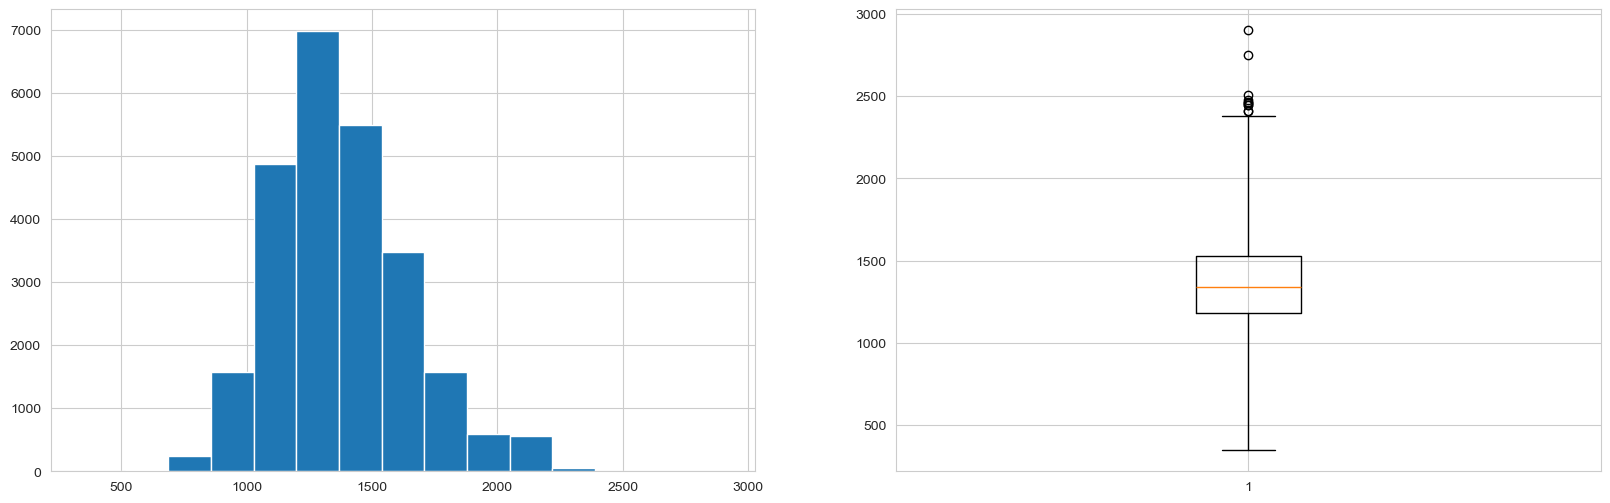

In [133]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["empty_weight"], bins=15)

plt.subplot(122)
plt.boxplot(df["empty_weight"], whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

<Figure size 2000x600 with 0 Axes>

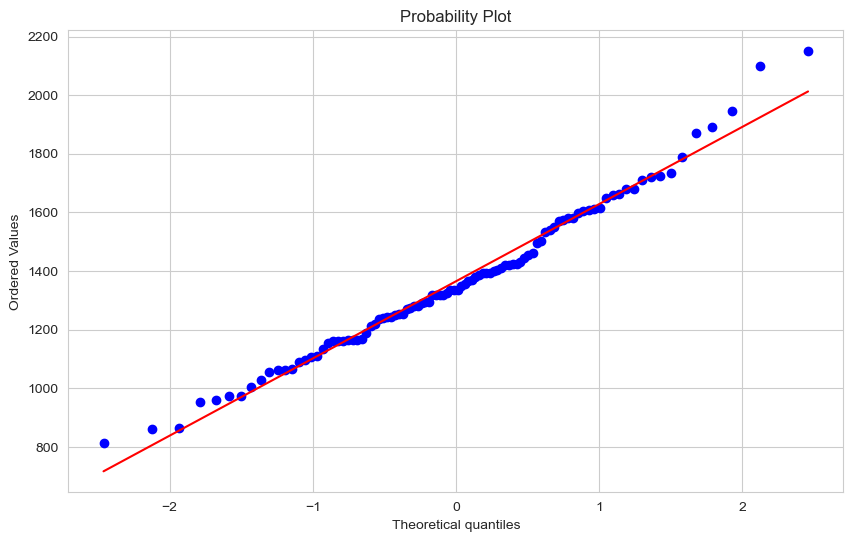

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(20, 6))

# Sample 50 observations from the 'empty_weight' column
my_data = df['empty_weight'].sample(100)

# Calculate the mean and standard deviation of the sample
mu = np.mean(my_data)
sigma = np.std(my_data)

# Generate a normal distribution with the same mean and standard deviation as the sample
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution as a dotted red line on the Q-Q plot
# plt.plot(x, y, 'r--', linewidth=2)

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(my_data, dist="norm", plot=ax)

# Show the plot
plt.show()

In [135]:
# Let's check some basic information after dropping/modifying extreme values in "empty_weight" feature

first_looking(df, "empty_weight")

# 25445 - 25445 = 0 extreme values were dropped from the dataset

column name    :  empty_weight
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1101
shape_of_df    :  (25445, 28)
--------------------------------
empty_weight
1320.00    704
1280.00    502
1055.00    480
1395.00    416
1165.00    388
1115.00    350
1090.00    262
1315.00    250
1423.00    239
1370.00    238
1331.00    219
1239.00    214
1135.00    206
1310.00    200
1485.00    186
1245.00    185
1550.00    180
1335.00    180
1430.00    179
1425.00    178
1275.00    173
1295.00    171
1505.00    168
1597.00    166
1255.00    162
1680.00    160
1050.00    153
1355.00    152
905.00     144
1233.00    142
1375.00    136
1557.00    134
1063.00    131
1615.00    125
1157.00    125
1235.00    122
1735.00    120
1040.00    119
2075.00    113
1500.00    112
1492.00    112
1575.00    112
2169.00    111
1472.00    111
950.00     109
1350.00    109
1701.00    107
1076.00    105
1480.00    104
980.00     104
1322.00    102
1812.00    102
1308.00    10

## co_emissions

**🧐 [CO₂ emission performance standards for cars and VANs](https://climate.ec.europa.eu/eu-action/transport-emissions/road-transport-reducing-co2-emissions-vehicles/co2-emission-performance-standards-cars-and-vans_en#:~:text=In%20the%20years%20from%202020,as%201.67%20vehicles%20in%202021):**

Passenger cars and vans ('light commercial vehicles') are respectively responsible for around 12% and 2.5% of total EU emissions of carbon dioxide (CO2), which is the main greenhouse gas...On 1 January 2020, [Regulation (EU) 2019/631](https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX%3A02019R0631-20210301) entered into force, setting CO2 emission performance standards for new passenger cars and vans. 

**Targets (2020-2024):**<br>
For the period 2020-2024, Regulation (EU) 2019/631 confirms the EU fleet-wide CO2 emission targets set under Regulations (EC) No 443/2009 and (EU) No 510/2011.
- Cars: 95 g CO2/km
- Vans: 147 g CO2/km

**🧐 [What is low CO2 emission?](https://www.cazoo.co.uk/the-view/buying/what-are-co2-emissions/)**<br>
What is considered a **'good' CO2 emission level** for a car? Anything **less than 100g/km** can be considered low – or good – CO2 emissions.

**🧐 [What sort of cars produce the least CO2?](https://www.cazoo.co.uk/the-view/buying/what-are-co2-emissions/)**<br>
- **Diesel cars** produce **a lot less CO2** than petrol cars. That’s because diesel fuel has a different chemical makeup to petrol, and diesel engines burn their fuel more efficiently.
- **Conventional hybrid cars** (also known as self-charging hybrids) generally produce **very little CO2** because they have the capability to run on electric power some of the time. Plug-in hybrids have very low CO2 emissions because they have a much longer electric-only range. 
- **Electric cars** produce **NO carbon emissions**, which is why they’re sometimes referred to as ‘zero-emissions’ vehicles.

**🧐 [WHICH CARS ARE THE WORST OFFENDERS WHEN IT COMES TO CARBON EMISSIONS?](https://www.coastcaptureair.com/blog/worst-cars-for-carbon-emissions)**<br>
**🧐 [Best Low Emission Cars 2022](https://www.moneyshake.com/car-finance-guides/electric-and-hybrid-guides/best-low-emission-cars-2022)**<br>
**🧐 [Hot air: the worst cars for real-world CO2 emissions](https://www.motoringresearch.com/car-news/hot-air-worst-cars-for-real-world-co2-emissions/)**<br>

In [136]:
# Let's explore basic information about "co_emissions"

first_looking(df, "co_emissions")

column name    :  co_emissions
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  308
shape_of_df    :  (25445, 28)
--------------------------------
co_emissions
0.00      1208
124.00    1006
115.00     698
99.00      572
119.00     557
89.00      544
129.00     517
117.00     494
139.00     454
109.00     449
108.00     448
114.00     399
113.00     385
110.00     378
123.00     372
104.00     357
116.00     353
130.00     346
120.00     334
138.00     324
125.00     305
149.00     301
127.00     290
112.00     286
105.00     271
107.00     256
111.00     250
93.00      248
98.00      231
145.00     228
128.00     228
126.00     227
178.00     226
102.00     220
96.00      215
118.00     214
121.00     213
135.00     211
137.00     206
95.00      202
85.00      198
148.00     197
133.00     192
122.00     192
155.00     190
131.00     190
106.00     189
142.00     188
134.00     182
143.00     178
167.00     167
154.00     166
88.00      161

In [137]:
# Let's explore Descriptive Satatistics on "co_emissions"

display(df.co_emissions.describe())

# Differences between intervals
diff1 = df.co_emissions.describe()['mean'] - df.co_emissions.describe()['std']
diff2 = df.co_emissions.describe()['25%'] - df.co_emissions.describe()['min']
diff3 = df.co_emissions.describe()['max'] - df.co_emissions.describe()['75%']

print(f"The difference between the {color.BOLD + color.BLUE}mean value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['mean']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}standard deviation{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['std']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff1:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}25th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['25%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}minimum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['min']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff2:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}75th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['75%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}maximum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['max']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff3:.2f}{color.RED + color.END}.")

count   25445.00
mean      125.33
std        47.47
min         0.00
25%       106.00
50%       123.00
75%       146.00
max       940.00
Name: co_emissions, dtype: float64

The difference between the mean value (19135.07) and the standard deviation (10463.83) is 77.86.
The difference between the 25th percentile (11900.00) and the minimum value (490.00) is 106.00.
The difference between the 75th percentile (25000.00) and the maximum value (51940.00) is 794.00.


#### The distribution of CO Emissions

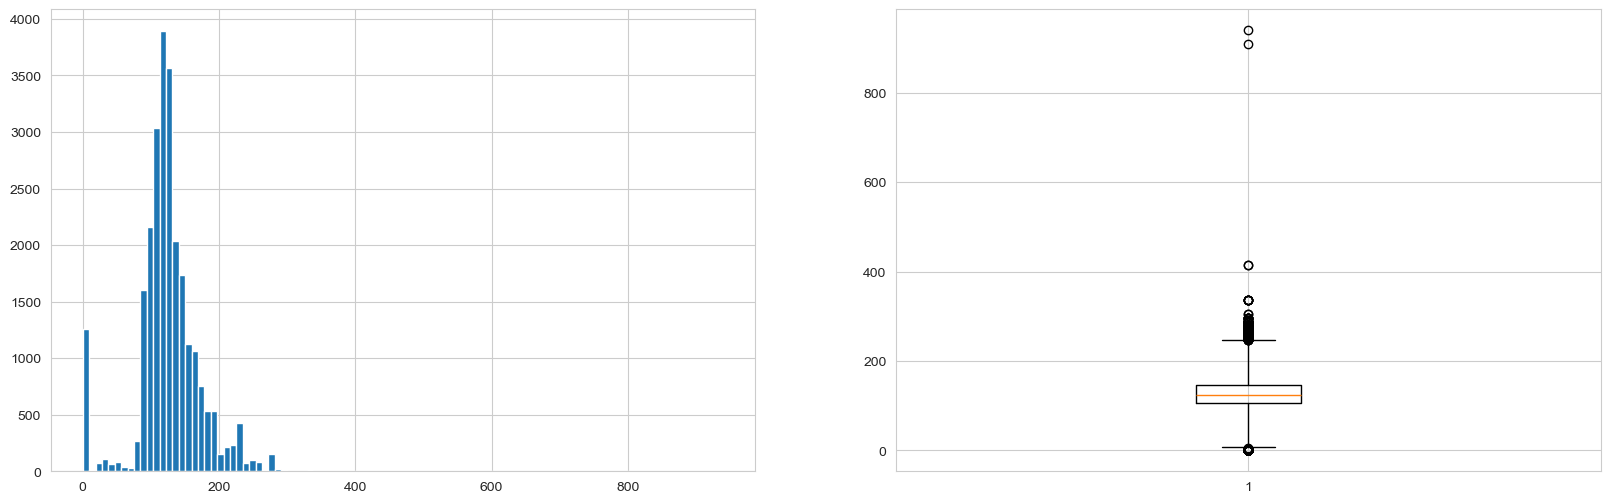

In [138]:
# Let's check how the observations in "co_emissions" feature are distributed via Histogram and Boxplot

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["co_emissions"], bins=100)

plt.subplot(122)
plt.boxplot(df["co_emissions"], whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

In [139]:
# Let's examine the first highest 20 observation in "co_emissions" to see if there have been some extreme values away from others

df.sort_values(by=["co_emissions"], ascending=False)["co_emissions"].head(20)

# df["co_emissions"].sort_values(ascending=False).head(20)

19513   940.00
18918   910.00
24555   414.00
24866   414.00
16390   336.00
16341   336.00
16352   336.00
16354   336.00
16365   336.00
16372   336.00
16374   336.00
24298   306.00
24017   306.00
18444   295.00
18125   295.00
18395   295.00
18223   295.00
18255   295.00
18268   295.00
18270   295.00
Name: co_emissions, dtype: float64

In [140]:
# Let's examine the first lowest 20 observation in "co_emissions" to see if there have been some extreme values away from others

df.sort_values(by=["co_emissions"], ascending=True)["co_emissions"].head(20)

# df["co_emissions"].sort_values(ascending=False).head(20)

3794    0.00
17160   0.00
15944   0.00
4988    0.00
15940   0.00
4990    0.00
4104    0.00
1046    0.00
4101    0.00
17161   0.00
19398   0.00
4095    0.00
12395   0.00
21561   0.00
19417   0.00
4090    0.00
17151   0.00
1036    0.00
19419   0.00
14202   0.00
Name: co_emissions, dtype: float64

In [141]:
# let's explore if there is any pattern among ""make_model", "body_type", "fuel_type", and "co_emissions" by "price"

df.groupby(["make_model", "body_type", "fuel_type", "co_emissions"]).price.describe()

count     mean  \
make_model        body_type        fuel_type co_emissions                   
Dacia 1300        Sedan            Benzine   124.00         1.00  9999.00   
Dacia Break       Station Wagon    Benzine   124.00         1.00 20500.00   
Dacia Business    Compact          Benzine   124.00         1.00 19515.00   
Dacia Comfort Tce Station Wagon    Benzine   130.00         1.00 21799.00   
Dacia Dokker      Compact          Diesel    108.00         1.00 11930.00   
...                                                          ...      ...   
Volvo Xc90        Off-Road/Pick-Up Diesel    208.00         2.00 50990.00   
                                             220.00         2.00 29990.00   
                  Sedan            Diesel    47.00          2.00 48100.00   
                  Station Wagon    Diesel    149.00         2.00 29500.00   
                                             152.00         2.00 36000.00   

                                                             std      min  \
make_model        body_type        fuel_type co_emissions                   
Dacia 1300        Sedan            Benzine   124.00          NaN  9999.00   
Dacia Break       Station Wagon    Benzine   124.00          NaN 20500.00   
Dacia Business    Compact          Benzine   124.00          NaN 19515.00   
Dacia Comfort Tce Station Wagon    Benzine   130.00          NaN 21799.00   
Dacia Dokker      Compact          Diesel    108.00          NaN 11930.00   
...                                                          ...      ...   
Volvo Xc90        Off-Road/Pick-Up Diesel    208.00         0.00 50990.00   
                                             220.00         0.00 29990.00   
                  Sedan            Diesel    47.00        565.69 47700.00   
                  Station Wagon    Diesel    149.00         0.00 29500.00   
                                             152.00         0.00 36000.00   

                                                               25%      50%  \
make_model        body_type        fuel_type co_emissions                     
Dacia 1300        Sedan            Benzine   124.00        9999.00  9999.00   
Dacia Break       Station Wagon    Benzine   124.00       20500.00 20500.00   
Dacia Business    Compact          Benzine   124.00       19515.00 19515.00   
Dacia Comfort Tce Station Wagon    Benzine   130.00       21799.00 21799.00   
Dacia Dokker      Compact          Diesel    108.00       11930.00 11930.00   
...                                                            ...      ...   
Volvo Xc90        Off-Road/Pick-Up Diesel    208.00       50990.00 50990.00   
                                             220.00       29990.00 29990.00   
                  Sedan            Diesel    47.00        47900.00 48100.00   
                  Station Wagon    Diesel    149.00       29500.00 29500.00   
                                             152.00       36000.00 36000.00   

                                                               75%      max  
make_model        body_type        fuel_type co_emissions                    
Dacia 1300        Sedan            Benzine   124.00        9999.00  9999.00  
Dacia Break       Station Wagon    Benzine   124.00       20500.00 20500.00  
Dacia Business    Compact          Benzine   124.00       19515.00 19515.00  
Dacia Comfort Tce Station Wagon    Benzine   130.00       21799.00 21799.00  
Dacia Dokker      Compact          Diesel    108.00       11930.00 11930.00  
...                                                            ...      ...  
Volvo Xc90        Off-Road/Pick-Up Diesel    208.00       50990.00 50990.00  
                                             220.00       29990.00 29990.00  
                  Sedan            Diesel    47.00        48300.00 48500.00  
                  Station Wagon    Diesel    149.00       29500.00 29500.00  
                                             152.00       36000.00 36000.00  

[6742 rows x

**Let us examine CO Emission values of vehicles more than 300:**

In [142]:
# Let's explore the vehicles' CO Emission values having greater than three hundred (300)

df.loc[df["co_emissions"] > 300][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]\
                                 .sort_values(by=["co_emissions"], ascending=False)

make_model   age         body_type    gearbox drivetrain  \
19513            Ford Edge  2.00  Off-Road/Pick-Up  Automatic        4WD   
18918          Ford Fiesta  1.00           Compact     Manual      Front   
24555            Volvo V60  5.00     Station Wagon     Manual      Front   
24866            Volvo V60  5.00     Station Wagon     Manual      Front   
16341  Toyota Land Cruiser  6.00  Off-Road/Pick-Up  Automatic        4WD   
16352  Toyota Land Cruiser 40.00  Off-Road/Pick-Up     Manual        4WD   
16354  Toyota Land Cruiser 35.00  Off-Road/Pick-Up     Manual        4WD   
16365  Toyota Land Cruiser 35.00  Off-Road/Pick-Up     Manual        4WD   
16372  Toyota Land Cruiser 34.00  Off-Road/Pick-Up     Manual        4WD   
16374  Toyota Land Cruiser 44.00  Off-Road/Pick-Up     Manual        4WD   
16390  Toyota Land Cruiser 21.00  Off-Road/Pick-Up     Manual        4WD   
24017           Volvo Xc90 16.00  Off-Road/Pick-Up  Automatic        4WD   
24298           Volvo Xc90 16.00  Off-Road/Pick-Up  Automatic        4WD   

       gears  engine_size fuel_type  empty_weight  co_emissions  
19513   8.00      1995.00    Diesel       2116.00        940.00  
18918   6.00      1496.00   Benzine       1242.00        910.00  
24555   6.00      1969.00    Diesel       1690.00        414.00  
24866   6.00      1969.00    Diesel       1690.00        414.00  
16341   6.00      2755.00   Benzine       2165.00        336.00  
16352   6.00      2755.00   Benzine       2165.00        336.00  
16354   6.00      2755.00   Benzine       2165.00        336.00  
16365   6.00      2755.00   Benzine       2165.00        336.00  
16372   6.00      2755.00   Benzine       2165.00        336.00  
16374   6.00      2755.00   Benzine       2165.00        336.00  
16390   6.00      2755.00   Benzine       2165.00        336.00  
24017   8.00      2922.00   Benzine       2009.00        306.00  
24298   8.00      2922.00   Benzine       2009.00        306.00

In [143]:
# Let's take a close look at some of these observations for examining if their CO Emission values reflect the reality when compared with their counterparts 

# df.loc[df.make_model == "Ford Edge"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]
# df.loc[df.make_model == "Ford Fiesta"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]
# df.loc[df.make_model == "Ford Mustang"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]
# df.loc[df.make_model == "Volvo V60"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]
# df.loc[df.make_model == "Mercedes-Benz G 500"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]
# df.loc[df.make_model == "Nissan GT-R"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]
# df.loc[df.make_model == "Mercedes-Benz E 63 AMG"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]
# df.loc[df.make_model == "Ford GT"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]
# df.loc[df.make_model == "Toyota Land Cruiser"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]

**Let's focus on the CO Emission value of "Ford Edge"**

In [144]:
# define a function to highlight the highest, median, and minimum values in a column
def highlight_max_median_min(s):
    is_max = s == s.max()
    is_median = s == s.median()
    is_min = s == s.min()
    return ["background-color: pink" if v else "background-color: lightgreen" if w else "background-color: yellow" if x else "" for v, w, x in zip(is_max, is_median, is_min)]

# filter the DataFrame and apply the styling function
styled_df = df.loc[df.make_model == "Ford Edge"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]].style.apply(highlight_max_median_min, subset=["co_emissions"])

# display the styled DataFrame
styled_df

### 📝 Domain Knowledge About Average ``co2 emission values`` of some Vehicles:

- ``Ford Edge``'s co2 emission value is **153 g/km**
- ``Ford Fiesta``'s co2 emission value is **108 g/km**
- ``Ford Mustang``'s co2 emission value is **299 g/km**
- ``Volvo V60``'s co2 emission value is **146 g/km**
- ``Mercedes-Benz G 500``'s co2 emission value is **252-299 g/km**
- ``Nissan GT-R``'s co2 emission value is **275 g/km**
- ``Mercedes-Benz E 63 AMG``'s co2 emission value is **230 g/km**
- ``Ford GT``'s co2 emission value is **349.6 g/km**
- ``Toyota Land Cruiser``'s co2 emission value is **262.0 g/km**
- ``Mercedes-Benz SL 55 AMG``'s co2 emission value is **324 g/km**
- ``Mercedes-Benz SL 600``'s co2 emission value is **326-370 g/km**

**To get more information in detail about Average Car Emission of each maake and model, you can visit 🧐 [car-emissions.com](https://www.car-emissions.com/) and 🧐 [cars-data.com](https://www.cars-data.com/search_results.html?q=emissions)**

In [145]:
# According to Domain Knowledge above, let's explore vehicles 
# whose CO Emission value is greater than a three hundreds thirty (330) except for Ford GT OR Mercedes-Benz

df[(~(df["make_model"] == "Ford GT") | ~(df["make_model"].str.contains("Mercedes-Benz"))) & (df["co_emissions"] > 330)][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]\
                                 .sort_values(by=["co_emissions"], ascending=False)

make_model   age         body_type    gearbox drivetrain  \
19513            Ford Edge  2.00  Off-Road/Pick-Up  Automatic        4WD   
18918          Ford Fiesta  1.00           Compact     Manual      Front   
24555            Volvo V60  5.00     Station Wagon     Manual      Front   
24866            Volvo V60  5.00     Station Wagon     Manual      Front   
16341  Toyota Land Cruiser  6.00  Off-Road/Pick-Up  Automatic        4WD   
16352  Toyota Land Cruiser 40.00  Off-Road/Pick-Up     Manual        4WD   
16354  Toyota Land Cruiser 35.00  Off-Road/Pick-Up     Manual        4WD   
16365  Toyota Land Cruiser 35.00  Off-Road/Pick-Up     Manual        4WD   
16372  Toyota Land Cruiser 34.00  Off-Road/Pick-Up     Manual        4WD   
16374  Toyota Land Cruiser 44.00  Off-Road/Pick-Up     Manual        4WD   
16390  Toyota Land Cruiser 21.00  Off-Road/Pick-Up     Manual        4WD   

       gears  engine_size fuel_type  empty_weight  co_emissions  
19513   8.00      1995.00    Diesel       2116.00        940.00  
18918   6.00      1496.00   Benzine       1242.00        910.00  
24555   6.00      1969.00    Diesel       1690.00        414.00  
24866   6.00      1969.00    Diesel       1690.00        414.00  
16341   6.00      2755.00   Benzine       2165.00        336.00  
16352   6.00      2755.00   Benzine       2165.00        336.00  
16354   6.00      2755.00   Benzine       2165.00        336.00  
16365   6.00      2755.00   Benzine       2165.00        336.00  
16372   6.00      2755.00   Benzine       2165.00        336.00  
16374   6.00      2755.00   Benzine       2165.00        336.00  
16390   6.00      2755.00   Benzine       2165.00        336.00

In [146]:
# According to Domain Knowledge above, let's explore vehicles 
# whose CO Emission value is greater than a four hundreds (400) except for Ford GT OR Mercedes-Benz

cond_emission = (~(df["make_model"] == "Ford GT") | ~(df["make_model"].str.contains("Mercedes-Benz"))) & (df["co_emissions"] > 400)
df[cond_emission][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions"]]

make_model  age         body_type    gearbox drivetrain  gears  \
18918  Ford Fiesta 1.00           Compact     Manual      Front   6.00   
19513    Ford Edge 2.00  Off-Road/Pick-Up  Automatic        4WD   8.00   
24555    Volvo V60 5.00     Station Wagon     Manual      Front   6.00   
24866    Volvo V60 5.00     Station Wagon     Manual      Front   6.00   

       engine_size fuel_type  empty_weight  co_emissions  
18918      1496.00   Benzine       1242.00        910.00  
19513      1995.00    Diesel       2116.00        940.00  
24555      1969.00    Diesel       1690.00        414.00  
24866      1969.00    Diesel       1690.00        414.00

In [147]:
# Let's assign CO Emission values of 940, 910, 420, and 414 to NaN

outlier_emission = df["co_emissions"].isin([940, 910, 420, 414])

df.loc[outlier_emission, "co_emissions"] = np.nan

# df["engine_size"].replace([940, 910, 420, 414], np.nan, inplace=True)
# df.loc[cond_emission, "co_emissions"] = np.nan

In [148]:
# Let's check how many NaNs there have been in "co_emissions" feaature

df["co_emissions"].isnull().sum()

4

In [149]:
# This DEF will fill the missing values in the "co_emissions" with the median value based on "make_model" and "body_type"

fill(df, "make_model", "body_type", "co_emissions", "median")

COLUMN NAME    :  co_emissions
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  305
--------------------------------
co_emissions
0.00      1208
0.50         2
1.00        15
3.00        24
5.00         1
7.00         1
8.00         2
9.00         1
10.00        7
15.00        1
22.00       19
23.00        2
24.00        3
25.00       13
26.00       29
27.00        4
28.00        4
29.00        7
30.00        4
31.00       17
32.00       14
33.00        9
34.00       31
35.00       17
36.00        6
37.00        7
38.00        2
39.00       13
40.00        1
41.00       26
42.00       10
43.00        3
44.00        7
46.00        5
47.00       10
48.00       15
49.00       20
50.00       10
54.00       17
55.00        4
55.50        2
56.50        2
59.00        4
63.00        1
63.50        2
64.00       30
68.00        5
70.00        1
73.00        1
75.00       22
75.50        2
76.00       33
78.00       10
79.00       72
80.00        1

#### The distribution of CO Emissions after modification

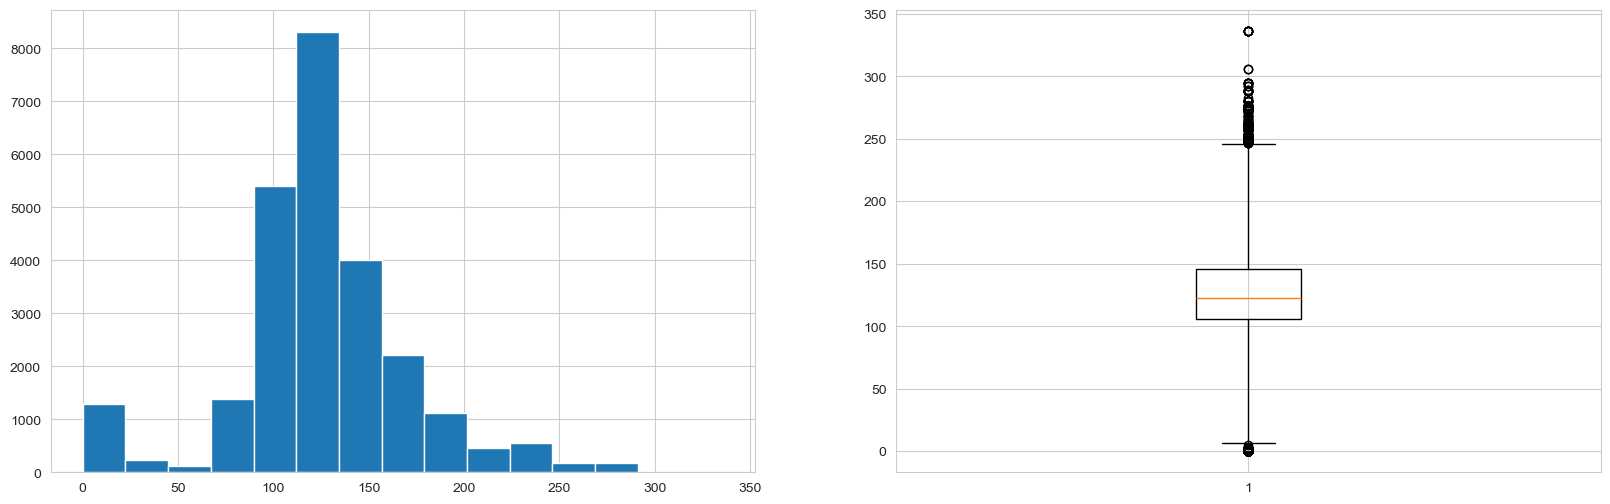

In [150]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["co_emissions"], bins=15)

plt.subplot(122)
plt.boxplot(df["co_emissions"], whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

#### The distribution of CO Emissions after logaritmic transformation 

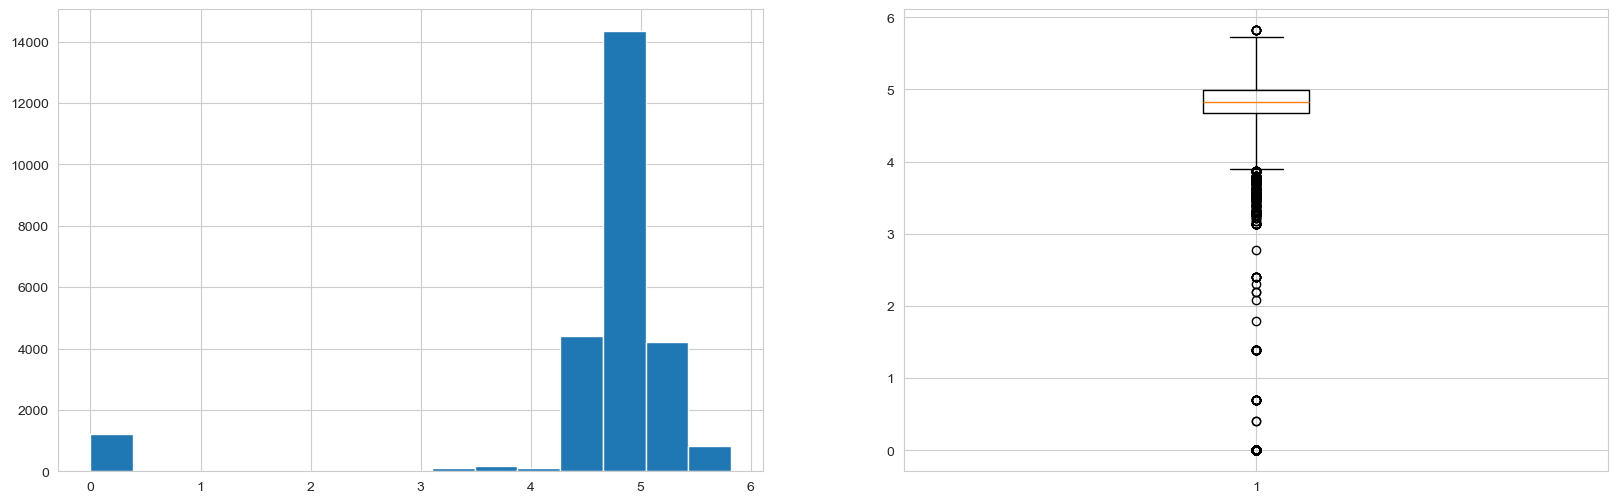

In [151]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
# df["co_emissions"].map(np.log).hist(bins=15)
# plt.hist(np.log(df["co_emissions"]), bins=15)  # This code (np.log) does NOT work due to the values 0
                                                 # -inf is what you get from computing np.log(0.)

plt.hist(np.log1p(df['co_emissions']), bins=15)  # histogram based on logaritmic transformation

plt.subplot(122)
# df["co_emissions"].map(np.log).boxplot(whis=2.5)
plt.boxplot(np.log1p(df["co_emissions"]), whis=2.5)  # boxplot based on 2.5 whisker after logaritmic transformation  

plt.show()

# ValueError: supplied range of [-inf, 6.84587987526405] is not finite

# Make sure the data does not have;

# Null/None
# ""/empty string
# Too many zeros (0)
# float('inf') or float('-inf')

# https://stackoverflow.com/questions/66055838/my-data-has-no-nan-but-i-keep-getting-the-finite-error

#### The distribution of CO Emissions after modification with winsorize

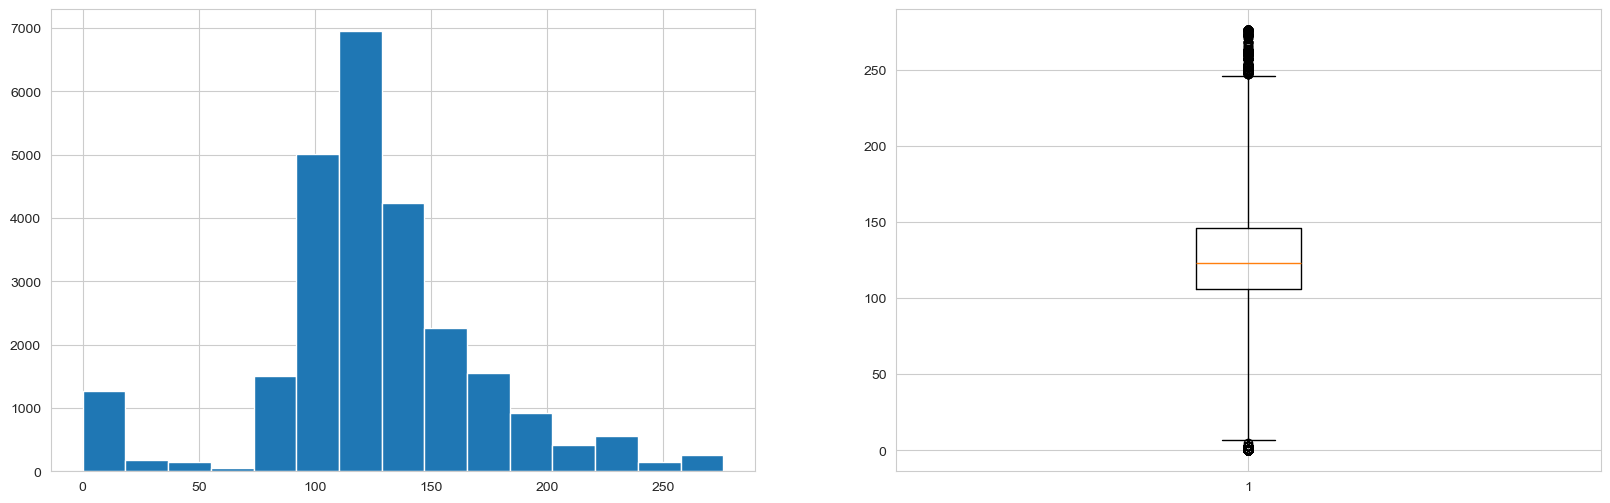

In [152]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(winsorize(df["co_emissions"], (0.001, 0.003)), bins = 15)

plt.subplot(122)
plt.boxplot(winsorize(df["co_emissions"], (0.001, 0.003)), whis=2.5)

plt.show()

In [153]:
# len(df[df["fuel_type"] == "Electric"][["make_model", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "co_emissions", "cons_avg"]])

In [154]:
# Let's find the average CO Emission value

df["co_emissions"].mean()

125.24096089605031

In [155]:
# Let's find the CO Emission value at the middle

df["co_emissions"].median()

123.0

#### The examination of extreme values by means of z-score

In [156]:
# Print the number of rows before dropping outliers
print("Number of rows before dropping outliers:", len(df))

# Calculate the Modified z-scores for the feature
z_scores = np.abs((df["co_emissions"] - df["co_emissions"].median()) / df["co_emissions"].std())

# Drop the rows with z-scores above the threshold
df = df[z_scores < 3]

# Drop the rows with z-scores above the threshold
df.reset_index(drop=True, inplace=True)

# Print the number of rows after dropping outliers
print("Number of rows after dropping outliers:", len(df))

# # ?????????????????? We did NOT lose any car whose fuel type is Electric ??????????????

# Number of rows before dropping outliers: 25453
# Number of rows after dropping outliers: 25244

Number of rows before dropping outliers: 25445
Number of rows after dropping outliers: 25245


#### The distribution of CO Emissions after modification by z-score

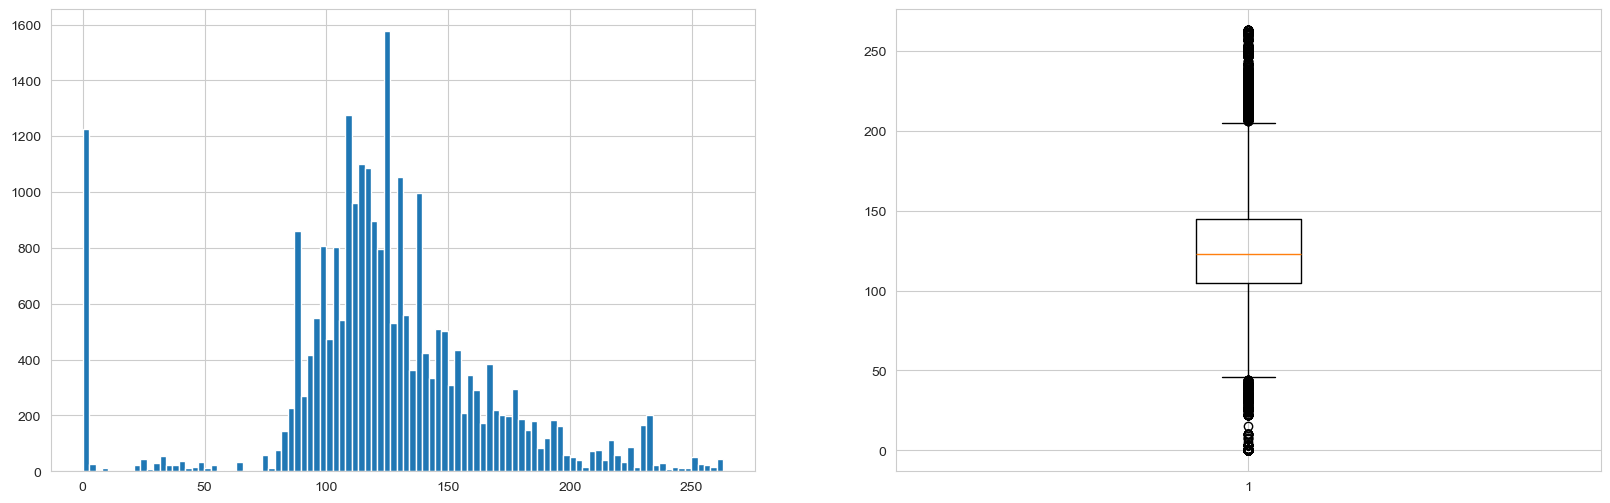

In [157]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["co_emissions"], bins=100)

plt.subplot(122)
plt.boxplot(df["co_emissions"])

plt.show()

<Figure size 2000x600 with 0 Axes>

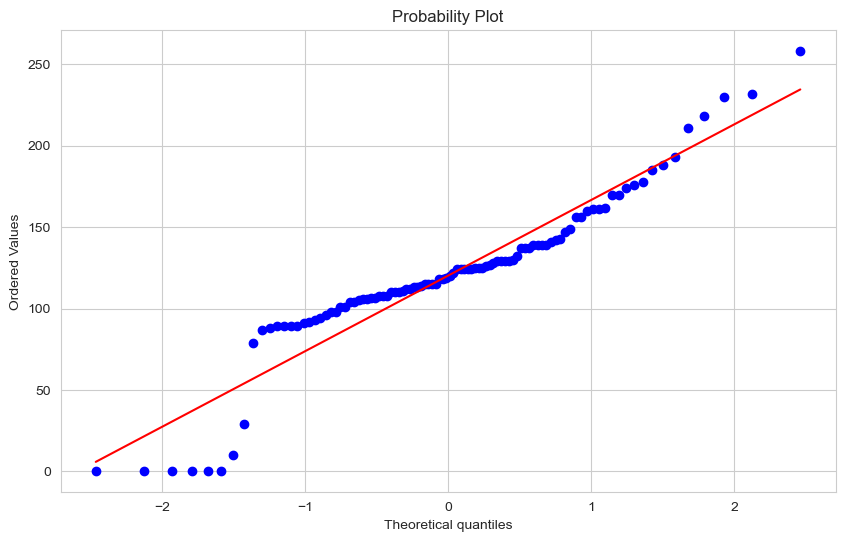

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(20, 6))

# Sample 50 observations from the 'co_emissions' column
my_data = df['co_emissions'].sample(100)

# Calculate the mean and standard deviation of the sample
mu = np.mean(my_data)
sigma = np.std(my_data)

# Generate a normal distribution with the same mean and standard deviation as the sample
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution as a dotted red line on the Q-Q plot
# plt.plot(x, y, 'r--', linewidth=2)

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(my_data, dist="norm", plot=ax)

# Show the plot
plt.show()

In [159]:
# Let's check some basic information after dropping/modifying extreme values in "co_emissions" feature

first_looking(df, "co_emissions")

# 25445 - 25245 = 200 extreme values were dropped from the dataset

column name    :  co_emissions
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  286
shape_of_df    :  (25245, 28)
--------------------------------
co_emissions
0.00      1208
124.00    1006
115.00     698
99.00      572
119.00     557
89.00      544
129.00     517
117.00     494
139.00     454
109.00     449
108.00     448
114.00     399
113.00     385
110.00     378
123.00     372
104.00     357
116.00     353
130.00     346
120.00     336
138.00     324
125.00     305
149.00     301
127.00     290
112.00     286
105.00     271
107.00     256
111.00     251
93.00      248
98.00      231
145.00     228
128.00     228
126.00     227
178.00     226
102.00     220
96.00      215
118.00     214
121.00     213
135.00     211
137.00     206
95.00      202
85.00      198
148.00     197
133.00     192
122.00     192
155.00     190
131.00     190
106.00     189
142.00     188
134.00     182
143.00     178
167.00     167
154.00     166
88.00      161

## cons_avg

Simply put, the average fuel consumption of your car is a calculation of how many kilometres you were able to travel for every litre of fuel used, be it diesel or petrol. Some vehicles will help you out by calculating your averages and sometimes even give you an instantaneous reading of how much fuel you are using. 

Fuel consumption is most commonly quoted as litres per 100 kilometres condensed to read as "l/100km". A more tradition way of measuring it is kilometres per litre expressed in "km/l".

Both of these give a similar indication of the amount of fuel used and l/100km is more common because the lower the number, the better the fuel consumption of the vehicle - remember, using less fuel is better!

The longer you drive, the more information the car has to be able to work out your average fuel consumption. Steady driving uses less fuel than stop-start driving and the amount of time or kilometres you spent in these situations is reflected in your average fuel consumption. Driving erratically, accelerating hard and stopping suddenly all negatively affect your fuel consumption.

If you travelled 10 kilometres and used 1 litre of fuel, your car has an average fuel consumption of 10 km/l or 10 l/100km. Similarly, if you travelled 10 km and used 2 litres of fuel, your car did 5 km/l. 10 ÷ 2 = 5. This is equal to 20 l/100km when converted. 10 is the magic number and the crossover point for the conversion between km/l and l/100km.

**🧐 [What is Fuel consumption (average)? How is it calculated?](https://www.autotrader.co.za/cars/news-and-advice/automotive-news/what-is-fuel-consumption-(average)-how-is-it-calculated/9831)**<br>
**🧐 [10 Cars with the Worst Fuel Economy](https://www.caranddriver.com/features/g30256394/worst-fuel-economy-cars/)**<br>
**🧐 [The 15 Cars With the Worst Fuel Economy on Sale Today](https://www.motortrend.com/features/cars-worst-fuel-economy-list/)**<br>
**🧐 [The 5 most fuel-efficient cars on the road today](https://www.businessinsider.com/most-fuel-efficient-cars-vehicles-best-gas-mileage-2019-11)**<br>
**🧐 [2023 Best and Worst Fuel Economy Vehicles](https://www.fueleconomy.gov/feg/best-worst.shtml)**<br>
**🧐 [The most fuel efficient vehicles](https://www.spritmonitor.de/en/evaluation/economic_models.html)**<br>

In [160]:
# Let's explore basic information about "cons_avg"

first_looking(df, "cons_avg")

column name    :  cons_avg
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  169
shape_of_df    :  (25245, 28)
--------------------------------
cons_avg
4.90     1024
5.00      948
5.10      873
4.50      869
5.30      817
4.70      704
5.40      700
4.60      670
4.80      646
5.60      640
4.30      629
0.00      625
4.10      599
3.80      598
5.20      597
4.20      595
5.90      580
5.70      564
4.00      544
5.50      539
4.40      510
6.00      475
3.70      473
6.30      466
6.40      443
5.80      442
3.60      390
3.90      385
2.36      335
6.50      325
6.90      315
3.40      299
7.00      297
7.40      286
6.10      283
6.60      280
6.20      277
6.70      252
7.10      251
6.80      226
7.30      206
7.20      206
3.50      193
7.60      189
7.70      188
8.40      176
8.00      170
7.80      167
8.20      130
7.50      130
9.80      122
3.30      115
8.30      105
9.20       99
3.00       91
9.60       83
8.50       81
8.90

In [161]:
# Let's explore Descriptive Satatistics on "cons_avg"

display(df.cons_avg.describe())

# Differences between intervals
diff1 = df.cons_avg.describe()['mean'] - df.cons_avg.describe()['std']
diff2 = df.cons_avg.describe()['25%'] - df.cons_avg.describe()['min']
diff3 = df.cons_avg.describe()['max'] - df.cons_avg.describe()['75%']

print(f"The difference between the {color.BOLD + color.BLUE}mean value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['mean']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}standard deviation{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['std']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff1:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}25th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['25%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}minimum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['min']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff2:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}75th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['75%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}maximum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['max']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff3:.2f}{color.RED + color.END}.")

count   25245.00
mean        5.36
std         2.43
min         0.00
25%         4.30
50%         5.10
75%         6.30
max        99.90
Name: cons_avg, dtype: float64

The difference between the mean value (19115.69) and the standard deviation (10470.34) is 2.93.
The difference between the 25th percentile (11900.00) and the minimum value (490.00) is 4.30.
The difference between the 75th percentile (25000.00) and the maximum value (51940.00) is 93.60.


#### The distribution of Average Consumption 

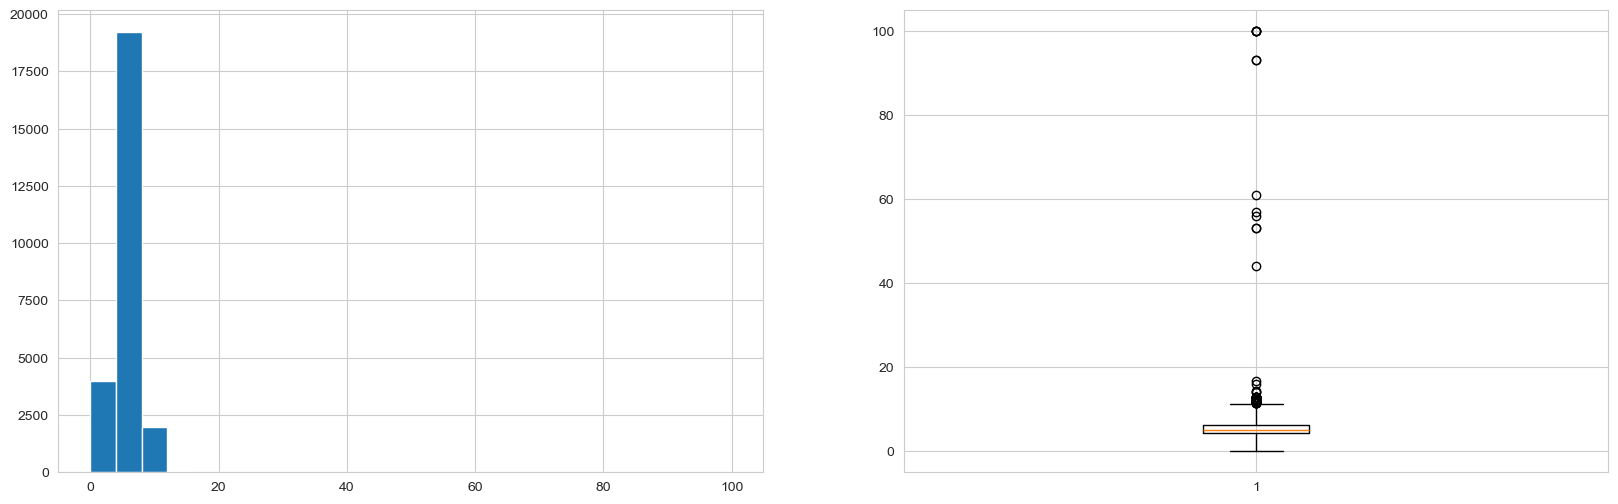

In [162]:
# Let's check how the observations in "cons_avg" feature are distributed via Histogram and Boxplot

plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.cons_avg, bins = 25)

plt.subplot(122)
plt.boxplot(df.cons_avg, whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

In [163]:
# Let's examine the first highest 20 observation in "cons_avg" to see if there have been some extreme values away from others

df.sort_values(by=["cons_avg"], ascending=False)["cons_avg"].head(20)

# df["cons_avg"].sort_values(ascending=False).head(20)

239     99.90
17220   99.90
20282   99.90
17221   99.90
18989   93.00
18972   93.00
1051    61.00
5438    57.00
16973   56.00
21391   53.00
21226   53.00
17923   44.00
9158    16.70
6525    16.00
16380   14.30
18589   14.00
6847    14.00
2290    13.00
2268    13.00
2418    13.00
Name: cons_avg, dtype: float64

In [164]:
# Let's examine the first lowest 20 observation in "cons_avg" to see if there have been some extreme values away from others

df.sort_values(by=["cons_avg"], ascending=True)["cons_avg"].head(20)

# df["cons_avg"].sort_values(ascending=True).head(20)
# df.cons_avg.sort_values().tail(20)

7517    0.00
16253   0.00
2370    0.00
5058    0.00
2359    0.00
19570   0.00
16301   0.00
16302   0.00
575     0.00
16318   0.00
16321   0.00
16322   0.00
16325   0.00
16329   0.00
20689   0.00
7424    0.00
16337   0.00
2340    0.00
16338   0.00
586     0.00
Name: cons_avg, dtype: float64

In [165]:
# let's explore if there is any pattern among ""make_model", "body_type", "fuel_type", and "cons_avg" by "mileage"

df.groupby(["make_model", "body_type", "fuel_type", "cons_avg"]).mileage.describe()

count      mean  \
make_model        body_type        fuel_type cons_avg                    
Dacia 1300        Sedan            Benzine   5.30       1.00  59098.00   
Dacia Break       Station Wagon    Benzine   5.30       1.00    999.00   
Dacia Business    Compact          Benzine   5.30       1.00   2376.00   
Dacia Comfort Tce Station Wagon    Benzine   5.60       1.00   2000.00   
Dacia Dokker      Compact          Diesel    4.20       1.00 141100.00   
...                                                      ...       ...   
Volvo Xc90        Off-Road/Pick-Up Diesel    8.30       4.00  75936.00   
                                             9.10       2.00 237102.00   
                  Sedan            Diesel    6.70       2.00  77824.50   
                  Station Wagon    Diesel    5.70       2.00 150000.00   
                                             5.80       2.00 143550.00   

                                                           std       min  \
make_model        body_type        fuel_type cons_avg                      
Dacia 1300        Sedan            Benzine   5.30          NaN  59098.00   
Dacia Break       Station Wagon    Benzine   5.30          NaN    999.00   
Dacia Business    Compact          Benzine   5.30          NaN   2376.00   
Dacia Comfort Tce Station Wagon    Benzine   5.60          NaN   2000.00   
Dacia Dokker      Compact          Diesel    4.20          NaN 141100.00   
...                                                        ...       ...   
Volvo Xc90        Off-Road/Pick-Up Diesel    8.30     20248.83  58400.00   
                                             9.10         0.00 237102.00   
                  Sedan            Diesel    6.70     12564.58  68940.00   
                  Station Wagon    Diesel    5.70         0.00 150000.00   
                                             5.80         0.00 143550.00   

                                                            25%       50%  \
make_model        body_type        fuel_type cons_avg                       
Dacia 1300        Sedan            Benzine   5.30      59098.00  59098.00   
Dacia Break       Station Wagon    Benzine   5.30        999.00    999.00   
Dacia Business    Compact          Benzine   5.30       2376.00   2376.00   
Dacia Comfort Tce Station Wagon    Benzine   5.60       2000.00   2000.00   
Dacia Dokker      Compact          Diesel    4.20     141100.00 141100.00   
...                                                         ...       ...   
Volvo Xc90        Off-Road/Pick-Up Diesel    8.30      58400.00  75936.00   
                                             9.10     237102.00 237102.00   
                  Sedan            Diesel    6.70      73382.25  77824.50   
                  Station Wagon    Diesel    5.70     150000.00 150000.00   
                                             5.80     143550.00 143550.00   

                                                            75%       max  
make_model        body_type        fuel_type cons_avg                      
Dacia 1300        Sedan            Benzine   5.30      59098.00  59098.00  
Dacia Break       Station Wagon    Benzine   5.30        999.00    999.00  
Dacia Business    Compact          Benzine   5.30       2376.00   2376.00  
Dacia Comfort Tce Station Wagon    Benzine   5.60       2000.00   2000.00  
Dacia Dokker      Compact          Diesel    4.20     141100.00 141100.00  
...                                                         ...       ...  
Volvo Xc90        Off-Road/Pick-Up Diesel    8.30      93472.00  93472.00  
                                             9.10     237102.00 237102.00  
                  Sedan            Diesel    6.70      82266.75  86709.00  
                  Station Wagon    Diesel    5.70     150000.00 150000.00  
                                             5.80     143550.00 143550.00  

[5969 rows x 8 columns]

**Let us examine consumption average values of vehicles more than 10:**

In [166]:
# Let's explore the vehicles whose consumption average values are equal to and  greater than ten (10)

df.loc[df["cons_avg"] >= 10][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]\
                                 .sort_values(by=["cons_avg"], ascending=False)

make_model   age         body_type         gearbox  \
239      Mercedes-Benz A 180  2.00           Compact       Automatic   
20282             Ford Focus  3.00             Sedan       Automatic   
17220         Nissan Qashqai  3.00           Compact          Manual   
17221         Nissan Qashqai  5.00           Compact          Manual   
18989             Ford Focus  3.00           Compact          Manual   
18972             Ford Focus  4.00           Compact          Manual   
1051     Mercedes-Benz E 200  8.00     Station Wagon       Automatic   
5438          Renault Megane  3.00     Station Wagon          Manual   
16973           Toyota Yaris  0.00             Sedan          Manual   
21391           Hyundai Kona  1.00  Off-Road/Pick-Up          Manual   
21226           Hyundai Kona  1.00  Off-Road/Pick-Up          Manual   
17923         Nissan Qashqai  5.00  Off-Road/Pick-Up          Manual   
9158          Fiat 124 Coupe 55.00             Coupe          Manual   
6525             Peugeot 307 18.00       Convertible          Manual   
16380           Toyota Rav 4 13.00  Off-Road/Pick-Up          Manual   
18589          Nissan Gloria  2.00             Sedan       Automatic   
6847             Peugeot 309 30.00             Coupe          Manual   
2391              Opel Monza 43.00             Coupe          Manual   
2339              Opel Monza 43.00             Coupe          Manual   
2279              Opel Monza 44.00             Coupe       Automatic   
2268              Opel Monza 39.00             Coupe          Manual   
2368              Opel Monza 43.00             Coupe          Manual   
2418              Opel Monza 42.00             Coupe          Manual   
2315              Opel Monza 37.00             Coupe          Manual   
2290              Opel Monza 43.00             Coupe          Manual   
568     Mercedes-Benz Sl 320 29.00             Coupe       Automatic   
9260              Fiat Coupe 28.00             Coupe          Manual   
9052              Fiat Coupe 27.00             Coupe          Manual   
18004          Nissan Murano 17.00  Off-Road/Pick-Up       Automatic   
19239           Ford Mustang  6.00             Coupe          Manual   
17585         Nissan Skyline 31.00             Coupe          Manual   
17579         Nissan Skyline 30.00             Coupe          Manual   
19143           Ford Mustang  5.00       Convertible       Automatic   
17578         Nissan Skyline 26.00             Coupe          Manual   
19195           Ford Mustang  6.00       Convertible          Manual   
17590         Nissan Skyline 27.00             Coupe          Manual   
19214           Ford Mustang  4.00       Convertible       Automatic   
17588         Nissan Skyline 26.00             Coupe          Manual   
17595         Nissan Skyline 26.00             Coupe          Manual   
17594         Nissan Skyline 29.00             Coupe          Manual   
17628         Nissan Skyline 25.00             Coupe          Manual   
19168           Ford Mustang  4.00       Convertible       Automatic   
17668          Nissan 300 Zx 31.00             Coupe       Automatic   
17664         Nissan Skyline 26.00             Coupe          Manual   
17646         Nissan Skyline 27.00             Coupe          Manual   
17634          Nissan 300 Zx 34.00             Coupe          Manual   
17632         Nissan Skyline 26.00             Coupe          Manual   
17623         Nissan Skyline 35.00             Coupe          Manual   
19157           Ford Mustang  7.00       Convertible       Automatic   
17620         Nissan Skyline 25.00             Coupe          Manual   
17619         Nissan Skyline 26.00             Coupe          Manual   
19192           Ford Mustang  4.00       Convertible          Manual   
17608         Nissan Skyline 28.00             Coupe          Manual   
17601         Nissan Skyline 22.00             Coupe       Automatic   
17600         Nissan Skyline 23.00             Coupe      

In [167]:
# Let's take a close look at some of these observations for examining if their consumption average values reflect the reality when compared with their counterparts 


# df.loc[df.make_model == "Mercedes-Benz A 180"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]
# df.loc[df.make_model == "Nissan Qashqai"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]
# df.loc[df.make_model == "Ford Focus"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]
# df.loc[df.make_model == "Mercedes-Benz E 200"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]
# df.loc[df.make_model == "Renault Megane"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]
# df.loc[df.make_model == "Toyota Yaris"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]
# df.loc[df.make_model == "Hyundai KONA"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]
# df.loc[df.make_model == "Mercedes-Benz GLC 63 AMG"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]
# df.loc[df.make_model == "Ford Mustang"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]
# df.loc[df.make_model == "Nissan GT-R"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]
# df.loc[df.make_model == "Nissan Skyline"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]
# df.loc[df.make_model == "Nissan 370Z"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]
# df.loc[df.make_model == "Peugeot 205"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]
# df.loc[df.make_model == "Volvo C70"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]
# df.loc[df.make_model == "Renault Alpine A310"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]
# df.loc[df.make_model == "Hyundai Genesis"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]
# df.loc[df.make_model == "Fiat Coupe"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]
# df.loc[df.make_model == "Ford Thunderbird"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]]

**Let's focus on the consumption average values of "Mercedes-Benz A 180"**

In [168]:
# define a function to highlight the highest, median, and minimum values in a column
def highlight_max_median_min(s):
    is_max = s == s.max()
    is_median = s == s.median()
    is_min = s == s.min()
    return ["background-color: pink" if v else "background-color: lightgreen" if w else "background-color: yellow" if x else "" for v, w, x in zip(is_max, is_median, is_min)]

# filter the DataFrame and apply the styling function
styled_df = df.loc[df.make_model == "Mercedes-Benz A 180"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg"]].style.apply(highlight_max_median_min, subset=["cons_avg"])

# display the styled DataFrame
styled_df

### 📝 Domain Knowledge About ``Average Fuel Consumptions`` of some Vehicles:

- ``Mercedes-Benz A 180``'s Average Fuel Consumption value is **5.7 L/100km**
- ``Nissan Qashqai``'s Average Fuel Consumption value is **6.2 L/100 km**
- ``Ford Focus``'s co2 Average Fuel Consumption value is **4.6 to 6.7 L/100 km**
- ``Mercedes-Benz E 200``'s Average Fuel Consumption value is **7.1 to 8 L/100 km**
- ``Renault Megane``'s Average Fuel Consumption value is **4.4 to 6.8 L/100 km**
- ``Toyota Yaris``'s Average Fuel Consumption value is **5.4 to 6.9 L/100 km**
- ``Hyundai KONA``'s Average Fuel Consumption value is **4 to 5.8 L/100 km**
- ``Mercedes-Benz GLC 63 AMG``'s Average Fuel Consumption value is **9 to 16 L/100km**
- ``Ford Mustang``'s Average Fuel Consumption value is **12 to 16.2 L/100 km**
- ``Nissan GT-R``'s co2 Average Fuel Consumption value is **11.8 to 19.4 L/100 km**
- ``Nissan Skyline``'s Average Fuel Consumption value is **16 to 17.7 L/100 km**
- ``Nissan 370Z``'s Average Fuel Consumption value is **11.2 to 18.1 L/100 km**
- ``Peugeot 205``'s Average Fuel Consumption value is **6.3 to 9.9 L/100 km**
- ``Volvo C70``'s Average Fuel Consumption value is **8.9 to 9.8 L/100 km**
- ``Renault Alpine A310``'s Average Fuel Consumption value is **8.7 to 16.6 L/100 km**
- ``Hyundai Genesis``'s Average Fuel Consumption value is **9.4 to 14.4 L/100 km**
- ``Fiat Coupe``'s Average Fuel Consumption value is **8 to 14 L/100 km**
- ``Ford Thunderbird``'s Average Fuel Consumption value is **13.5 to 19 L/100 km**

<img src=https://i.ibb.co/YPB2RWx/least-fuel-consumption.png width="500" height="100">

**To get more information in detail about Average Car Fuel Consumption of each make and model, you can visit 🧐 [car-emissions.com](https://www.car-emissions.com/), 🧐 [incardoc.com](https://incardoc.com/en-us/), and 🧐 [carsfuelconsumption.com](http://carsfuelconsumption.com/)**

**Considering our domain knowledge, it can be concluded that the max value equal to/greater than 20 is anomaly.**

In [169]:
# According to Domain Knowledge above, let's assign CO Emission values greater than twenty (20) to NaN

cond_cons_avg = (df["cons_avg"] >= 20)
df.loc[cond_cons_avg, "cons_avg"] = np.nan

# outlier_consumption = df["ons_avg"].isin([23.000, 44.000, 53.000, 56.000, 57.000, 61.000, 93.000, 99.900])
# df["cons_avg"].replace([23.000, 44.000, 53.000, 56.000, 57.000, 61.000, 93.000, 99.900], np.nan, inplace=True)

In [170]:
# Let's check how many NaNs there have been in "cons_avg" feaature

df["cons_avg"].isnull().sum()

12

In [171]:
# This DEF will fill the missing values in the "cons_avg" with the median value based on "make_model" and "body_type"

fill(df, "make_model", "body_type", "cons_avg", "median")

COLUMN NAME    :  cons_avg
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  162
--------------------------------
cons_avg
0.00      625
0.50        1
0.65        1
0.80        6
1.00        8
1.10       25
1.20       29
1.30       14
1.40       49
1.50       52
1.60       18
1.70       14
1.80       49
1.90        7
2.00       18
2.10       22
2.20        6
2.30        4
2.36      335
2.40       12
2.50        8
2.70        2
2.80       32
2.90        1
3.00       91
3.10       16
3.20       71
3.30      115
3.40      299
3.50      193
3.60      390
3.70      473
3.75        7
3.80      599
3.85        8
3.90      386
3.95       20
4.00      545
4.05       35
4.10      599
4.15       60
4.20      595
4.25        1
4.30      630
4.30       29
4.35       13
4.40      510
4.50      869
4.55        2
4.60      670
4.65       29
4.70      704
4.75        6
4.80      648
4.85        8
4.90     1024
4.95       17
5.00      948
5.05        9
5.10  

#### The distribution of Average Consumption values after modification

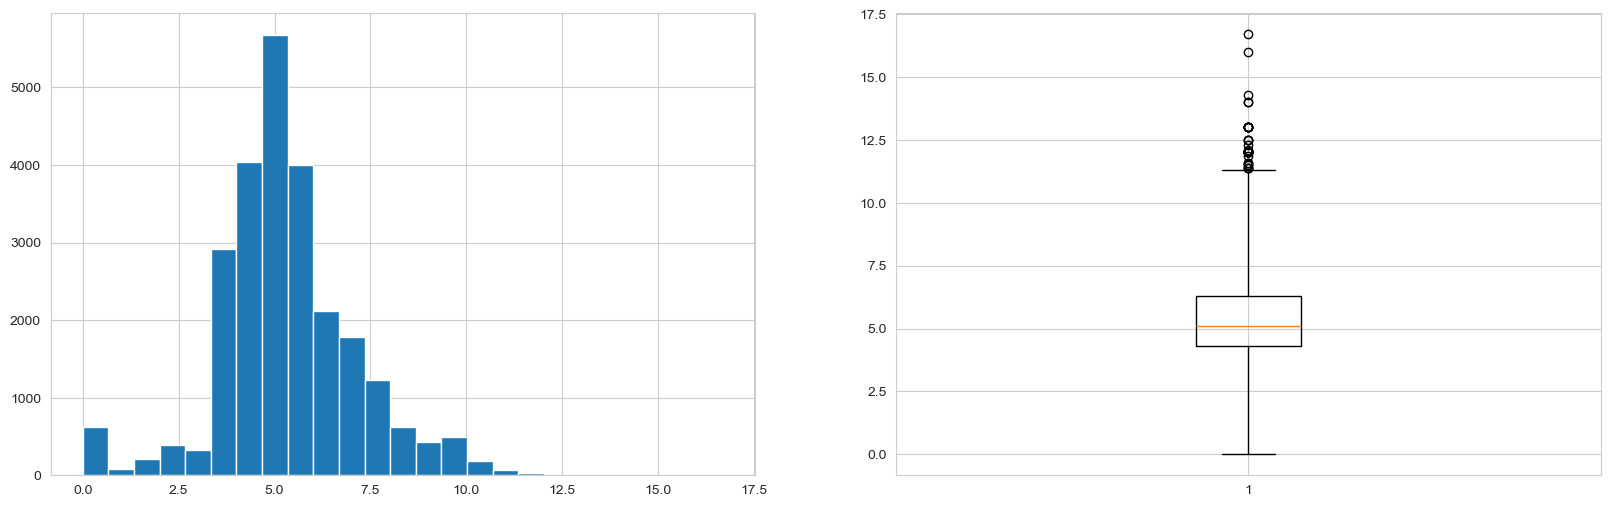

In [172]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.cons_avg, bins = 25)

plt.subplot(122)
plt.boxplot(df.cons_avg, whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

**🧐 SPECIAL NOTE:** Z-score is susceptible to extreme data points. If there is one extreme value, the z-score corresponding to that point will also be extreme. It has the potential to significantly move the mean away from its actual value. The modified z-score is somewhat more robust than the standard z-score since it is calculated from the median absolute deviation (MAD)

In [173]:
# len(df[df["fuel_type"] == "Electric"][["make_model", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "co_emissions", "cons_avg"]])

In [174]:
# Let's find the average cons_avg value

df["cons_avg"].mean()

5.327112893642306

In [175]:
# Let's find the cons_avg value at the middle

df["cons_avg"].median()

5.1

#### The examination of extreme values by means of z-score

In [176]:
# Print the number of rows before dropping outliers
print("Number of rows before dropping outliers:", len(df))

# Calculate the Modified z-scores for the feature
z_scores = np.abs((df["cons_avg"] - df["cons_avg"].median()) / df["cons_avg"].std())

# Drop the rows with z-scores above the threshold
df = df[z_scores < 3]

# Drop the rows with z-scores above the threshold
df.reset_index(drop=True, inplace=True)

# Print the number of rows after dropping outliers
print("Number of rows after dropping outliers:", len(df))

# ??????? We did NOT lose any car whose fuel type is Electric ????????

Number of rows before dropping outliers: 25245
Number of rows after dropping outliers: 25088


#### The distribution of Average Consumption values after modification by z-score

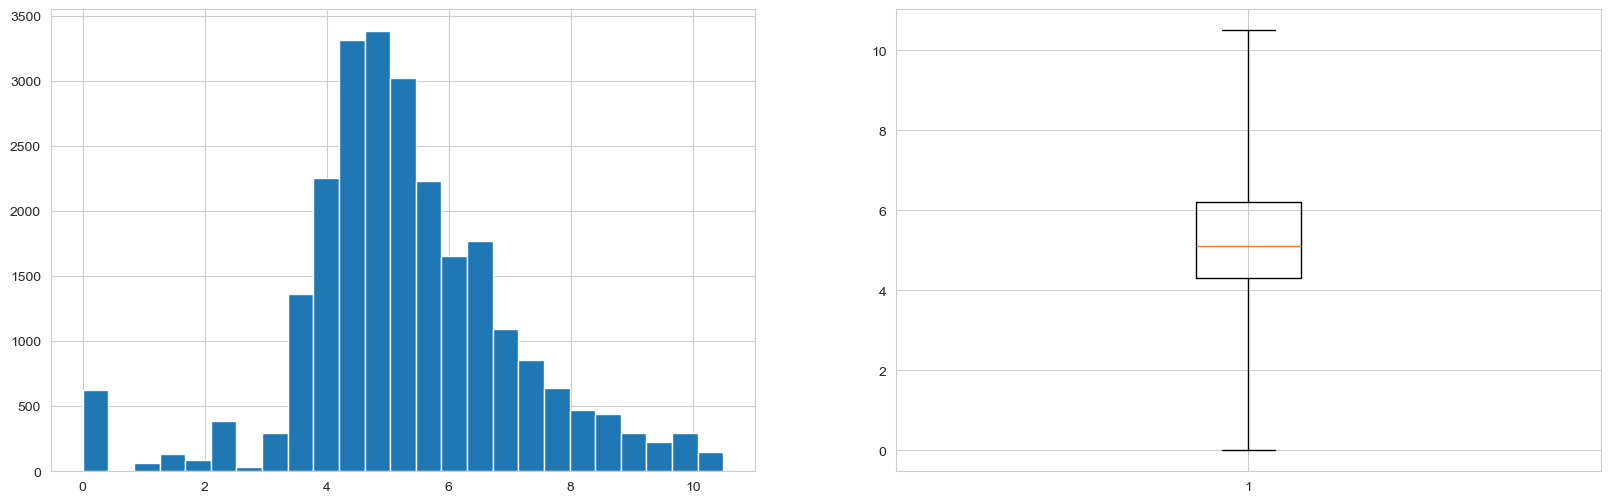

In [177]:
plt.figure(figsize = (20, 6))

plt.subplot(121)
plt.hist(df.cons_avg, bins = 25)

plt.subplot(122)
plt.boxplot(df.cons_avg, whis=2.5)  # boxplot based on 2.5 whisker after modification with z-score 

plt.show()

<Figure size 2000x600 with 0 Axes>

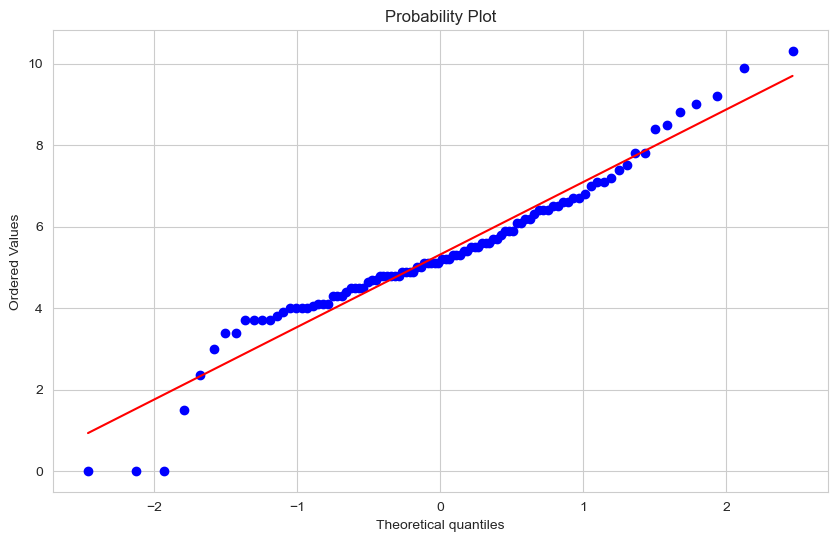

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(20, 6))

# Sample 50 observations from the 'cons_avg' column
my_data = df['cons_avg'].sample(100)

# Calculate the mean and standard deviation of the sample
mu = np.mean(my_data)
sigma = np.std(my_data)

# Generate a normal distribution with the same mean and standard deviation as the sample
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution as a dotted red line on the Q-Q plot
# plt.plot(x, y, 'r--', linewidth=2)

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(my_data, dist="norm", plot=ax)

# Show the plot
plt.show()

In [179]:
# Let's check some basic information after dropping/modifying extreme values in "cons_avg" feature

first_looking(df, "cons_avg")

# 25245 - 25088 = 157 extreme values were dropped from the dataset

column name    :  cons_avg
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  141
shape_of_df    :  (25088, 28)
--------------------------------
cons_avg
4.90     1024
5.00      948
5.10      873
4.50      869
5.30      819
4.70      704
5.40      700
4.60      670
4.80      648
5.60      640
4.30      630
0.00      625
3.80      599
4.10      599
5.20      599
4.20      595
5.90      580
5.70      564
4.00      545
5.50      541
4.40      510
6.00      475
3.70      473
6.30      466
6.40      443
5.80      442
3.60      390
3.90      386
2.36      335
6.50      325
6.90      315
3.40      299
7.00      297
7.40      286
6.10      283
6.60      280
6.20      277
6.70      252
7.10      251
6.80      226
7.30      206
7.20      206
3.50      193
7.60      189
7.70      188
8.40      176
8.00      170
7.80      167
7.50      130
8.20      130
9.80      122
3.30      115
8.30      105
9.20       99
3.00       91
9.60       83
8.50       81
8.90

## previous_owner

Being able to trace the car back to the original owner is important to some buyers, as you are able to directly find out about any faults with the vehicle. Having lots of previous_owners can be off-putting as it looks like the vehicle has lots of issues.

In [180]:
# Let's explore basic information about "previous_owner"

first_looking(df, "previous_owner")

column name    :  previous_owner
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  13
shape_of_df    :  (25088, 28)
--------------------------------
previous_owner
1.00     16545
2.00      6296
3.00      1495
4.00       383
5.00       172
6.00        75
8.00        63
7.00        38
9.00        15
10.00        2
12.00        2
14.00        1
13.00        1
Name: count, dtype: int64


In [181]:
# Let's explore Descriptive Satatistics on "previous_owner"

display(df.previous_owner.describe())

# Differences between intervals
diff1 = df.previous_owner.describe()['mean'] - df.previous_owner.describe()['std']
diff2 = df.previous_owner.describe()['25%'] - df.previous_owner.describe()['min']
diff3 = df.previous_owner.describe()['max'] - df.previous_owner.describe()['75%']

print(f"The difference between the {color.BOLD + color.BLUE}mean value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['mean']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}standard deviation{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['std']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff1:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}25th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['25%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}minimum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['min']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff2:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}75th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['75%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}maximum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['max']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff3:.2f}{color.RED + color.END}.")

count   25088.00
mean        1.49
std         0.90
min         1.00
25%         1.00
50%         1.00
75%         2.00
max        14.00
Name: previous_owner, dtype: float64

The difference between the mean value (19138.30) and the standard deviation (10461.16) is 0.59.
The difference between the 25th percentile (11900.00) and the minimum value (490.00) is 0.00.
The difference between the 75th percentile (25000.00) and the maximum value (51940.00) is 12.00.


#### The distribution of Previous Owner

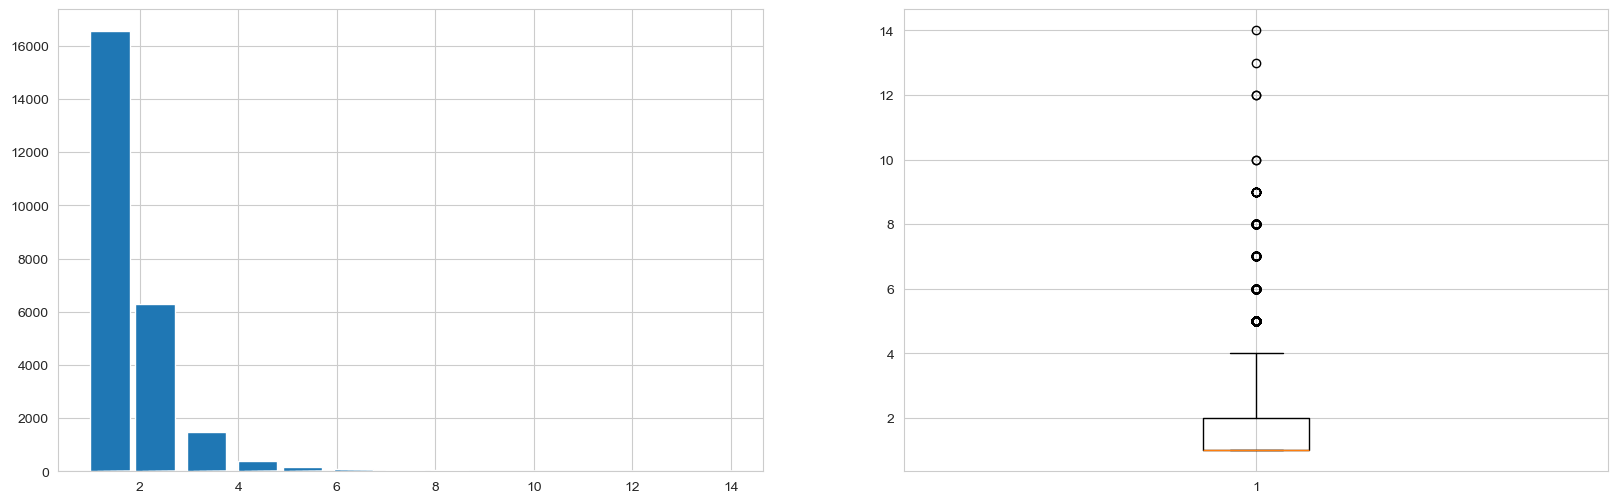

In [182]:
# Let's check how the observations in "previous_owner" feature are distributed via Histogram and Boxplot

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["previous_owner"], bins=100, width=0.8)

plt.subplot(122)
plt.boxplot(df["previous_owner"], whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

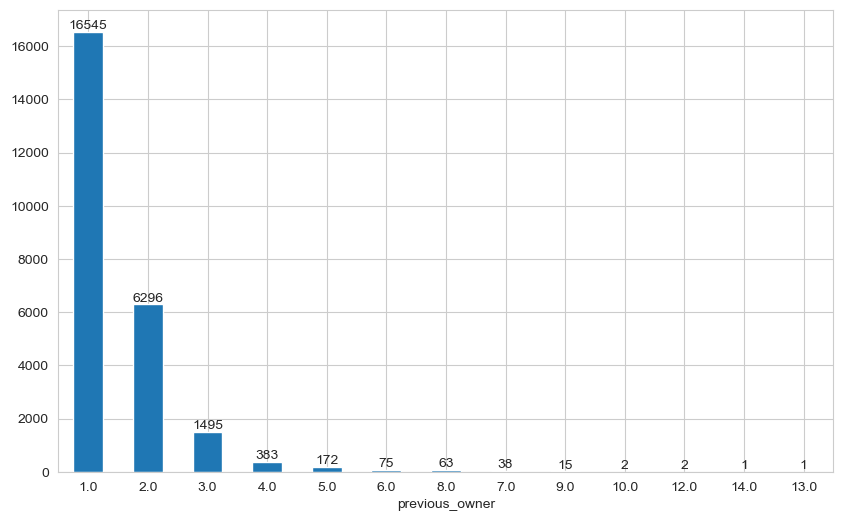

In [183]:
# Let's take a closer look at them

# create a plot
fig, ax = plt.subplots()

# plot the data
df["previous_owner"].value_counts(dropna = False).plot.bar()

# rotate the xticklabels by 0 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# label the bars
for container in ax.containers:
    ax.bar_label(container);

In [184]:
# Let's examine the first highest 20 observation in "previous_owner" to see if there have been some extreme values away from others

df.sort_values(by=["previous_owner"], ascending=False)["previous_owner"].head(20)

# df["previous_owner"].sort_values(ascending=False).head(20)

6371    14.00
6625    13.00
24778   12.00
24477   12.00
16034   10.00
6077    10.00
2188     9.00
6427     9.00
23508    9.00
6145     9.00
6167     9.00
6170     9.00
5376     9.00
22872    9.00
6387     9.00
5393     9.00
6294     9.00
23582    9.00
23505    9.00
23119    9.00
Name: previous_owner, dtype: float64

In [185]:
# Let's examine the first lowest 20 observation in "previous_owner" to see if there have been some extreme values away from others

df.sort_values(by=["previous_owner"], ascending=True)["previous_owner"].head(20)

# df["previous_owner"].sort_values(ascending=False).head(20)

12543   1.00
12038   1.00
12039   1.00
12040   1.00
20179   1.00
12042   1.00
20178   1.00
20177   1.00
12045   1.00
12046   1.00
12047   1.00
12048   1.00
12049   1.00
12050   1.00
20176   1.00
12037   1.00
12052   1.00
12054   1.00
12055   1.00
12056   1.00
Name: previous_owner, dtype: float64

In [186]:
# let's explore if there is any pattern among ""make_model", "body_type", "type", and "previous_owner" by "age"

df.groupby(["make_model", "body_type", "type", "previous_owner"]).age.describe()

count  mean  \
make_model        body_type        type          previous_owner                
Dacia 1300        Sedan            Used          1.00             1.00 47.00   
Dacia Break       Station Wagon    Demonstration 1.00             1.00  0.00   
Dacia Business    Compact          Demonstration 1.00             1.00  1.00   
Dacia Comfort Tce Station Wagon    Demonstration 1.00             1.00  0.00   
Dacia Dokker      Compact          Used          1.00             1.00  4.00   
...                                                                ...   ...   
Volvo Xc90        Off-Road/Pick-Up Used          2.00            33.00  5.64   
                                                 8.00             1.00  8.00   
                  Sedan            Used          1.00             1.00  3.00   
                                                 2.00             1.00  4.00   
                  Station Wagon    Used          1.00             4.00  6.00   

                                                                 std   min  \
make_model        body_type        type          previous_owner              
Dacia 1300        Sedan            Used          1.00            NaN 47.00   
Dacia Break       Station Wagon    Demonstration 1.00            NaN  0.00   
Dacia Business    Compact          Demonstration 1.00            NaN  1.00   
Dacia Comfort Tce Station Wagon    Demonstration 1.00            NaN  0.00   
Dacia Dokker      Compact          Used          1.00            NaN  4.00   
...                                                              ...   ...   
Volvo Xc90        Off-Road/Pick-Up Used          2.00           1.29  4.00   
                                                 8.00            NaN  8.00   
                  Sedan            Used          1.00            NaN  3.00   
                                                 2.00            NaN  4.00   
                  Station Wagon    Used          1.00           0.00  6.00   

                                                                  25%   50%  \
make_model        body_type        type          previous_owner               
Dacia 1300        Sedan            Used          1.00           47.00 47.00   
Dacia Break       Station Wagon    Demonstration 1.00            0.00  0.00   
Dacia Business    Compact          Demonstration 1.00            1.00  1.00   
Dacia Comfort Tce Station Wagon    Demonstration 1.00            0.00  0.00   
Dacia Dokker      Compact          Used          1.00            4.00  4.00   
...                                                               ...   ...   
Volvo Xc90        Off-Road/Pick-Up Used          2.00            5.00  5.00   
                                                 8.00            8.00  8.00   
                  Sedan            Used          1.00            3.00  3.00   
                                                 2.00            4.00  4.00   
                  Station Wagon    Used          1.00            6.00  6.00   

                                                                  75%   max  
make_model        body_type        type          previous_owner              
Dacia 1300        Sedan            Used          1.00           47.00 47.00  
Dacia Break       Station Wagon    Demonstration 1.00            0.00  0.00  
Dacia Business    Compact          Demonstration 1.00            1.00  1.00  
Dacia Comfort Tce Station Wagon    Demonstration 1.00            0.00  0.00  
Dacia Dokker      Compact          Used          1.00            4.00  4.00  
...                                                               ...   ...  
Volvo Xc90        Off-Road/Pick-Up Used          2.00            6.00  9.00  
                                                 8.00            8.00  8.00  
                  Sedan            Used          1.00            3.00  3.00  
                                                 2.00            4.00  4.00  
                  Station Wagon    Used      

**Let us examine previous owner values of vehicles equal to AND more than 10:**

In [187]:
# Let's explore the vehicles whose number of owner are equal to and  greater than ten (10)

df.loc[df["previous_owner"] >= 10][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg", "previous_owner"]]\
                                 .sort_values(by=["previous_owner"], ascending=False)

make_model   age      body_type    gearbox drivetrain  gears  \
6371   Peugeot 207 15.00    Convertible     Manual      Front   5.00   
6625   Peugeot 306 25.00    Convertible     Manual      Front   5.00   
24477    Volvo 945 25.00  Station Wagon     Manual       Rear   5.00   
24778    Volvo 945 25.00  Station Wagon     Manual       Rear   5.00   
6077   Peugeot 206 18.00        Compact  Automatic      Front   4.00   
16034  Toyota Mr 2 29.00          Coupe     Manual       Rear   5.00   

       engine_size           fuel_type  empty_weight  co_emissions  cons_avg  \
6371       1598.00             Benzine       1327.00        155.00      6.50   
6625       1998.00             Benzine       1245.00          0.00      7.60   
24477      1986.00  Liquid/Natural Gas       1320.00        124.00     10.20   
24778      1986.00  Liquid/Natural Gas       1320.00        124.00     10.20   
6077       1587.00             Benzine       1039.00        171.00      7.10   
16034      1998.00             Benzine       1290.00          0.00      7.40   

       previous_owner  
6371            14.00  
6625            13.00  
24477           12.00  
24778           12.00  
6077            10.00  
16034           10.00

In [188]:
# Let's assign the indeces of vehicles whose number of owner is equal to and  greater than ten (10)

drop_pre_owner_index = df[df["previous_owner"] >= 10].index
drop_pre_owner_index

Index([6077, 6371, 6625, 16034, 24477, 24778], dtype='int64')

In [189]:
# Let's drop these observations from DataaFrame

print(df.shape)
df.drop(drop_pre_owner_index, inplace=True)
print(df.shape)

(25088, 28)
(25082, 28)


#### The distribution of Previous Owner after modification

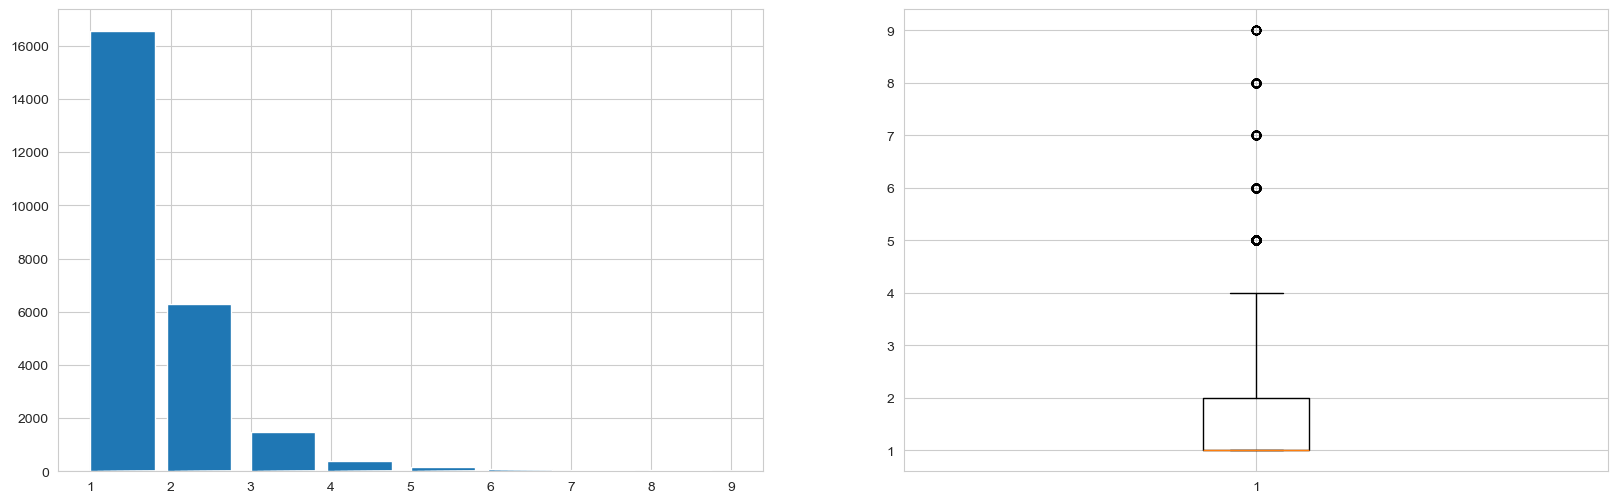

In [190]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["previous_owner"], bins=100, width=0.8)

plt.subplot(122)
plt.boxplot(df["previous_owner"], whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

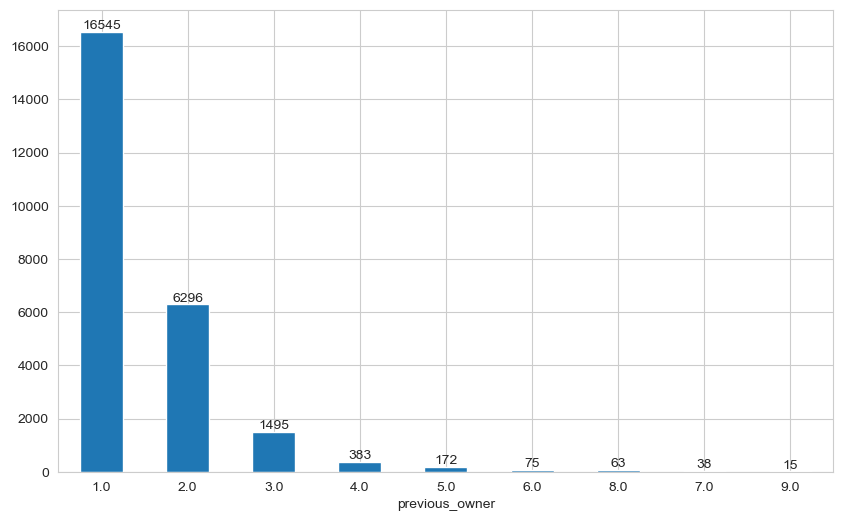

In [191]:
# Let's take a closer look at them

# create a plot
fig, ax = plt.subplots()

# plot the data
df["previous_owner"].value_counts(dropna = False).plot.bar()

# rotate the xticklabels by 0 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# label the bars
for container in ax.containers:
    ax.bar_label(container);

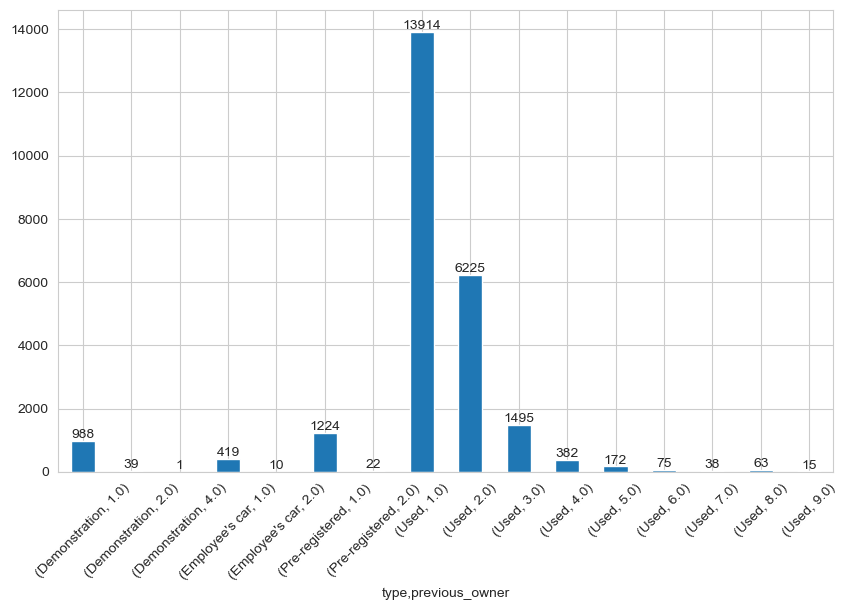

In [192]:
# Let's examine them in detail by type

fig, ax = plt.subplots()

df.groupby(["type", "previous_owner"])["previous_owner"].count().plot.bar()

# rotate the xticklabels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

for container in ax.containers:
    ax.bar_label(container);

<div style="background-color: lightgreen; padding: 10px; font-size: 14px; font-weight: bold;">
    <b><u>Conclusion:</u></b>

The majority of used cars on sale are 1, 2, and 3-year old ones.

</div>

In [193]:
# Let's check some basic information after dropping/modifying extreme values in "previous_owner" feature

first_looking(df, "previous_owner")

# 25088 - 25082 = 6 extreme values were dropped from the dataset

column name    :  previous_owner
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  9
shape_of_df    :  (25082, 28)
--------------------------------
previous_owner
1.00    16545
2.00     6296
3.00     1495
4.00      383
5.00      172
6.00       75
8.00       63
7.00       38
9.00       15
Name: count, dtype: int64


## age

Probably one of the most obvious factors. The older the car, the more worn it will be and therefore the less desirable it will become. Classics are the exception to this rule, but typically a 15 year old car will hold significantly less value than a five year old model.

In [194]:
# Let's explore basic information about "age"

first_looking(df, "age")

column name    :  age
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  79
shape_of_df    :  (25082, 28)
--------------------------------
age
3.00       3380
4.00       3258
0.00       2531
1.00       2381
5.00       2286
2.00       2224
6.00       1387
7.00       1154
8.00        868
9.00        640
10.00       604
11.00       577
12.00       470
15.00       395
14.00       377
13.00       350
16.00       303
17.00       193
18.00       159
19.00       159
20.00       144
22.00       141
21.00       138
23.00        98
24.00        67
27.00        61
28.00        61
25.00        59
30.00        51
26.00        50
31.00        47
32.00        45
29.00        44
49.00        25
50.00        24
34.00        22
35.00        21
44.00        19
33.00        19
56.00        16
36.00        16
52.00        14
55.00        14
37.00        14
51.00        13
47.00        13
54.00        12
53.00        12
43.00        11
46.00        10
45.00        

In [195]:
# Let's explore Descriptive Satatistics on "age"

display(df.age.describe())

# Differences between intervals
diff1 = df.age.describe()['mean'] - df.age.describe()['std']
diff2 = df.age.describe()['25%'] - df.age.describe()['min']
diff3 = df.age.describe()['max'] - df.age.describe()['75%']

print(f"The difference between the {color.BOLD + color.BLUE}mean value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['mean']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}standard deviation{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['std']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff1:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}25th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['25%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}minimum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['min']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff2:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}75th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['75%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}maximum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['max']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff3:.2f}{color.RED + color.END}.")

count   25082.00
mean        6.40
std         7.79
min      -180.00
25%         2.00
50%         4.00
75%         8.00
max       122.00
Name: age, dtype: float64

The difference between the mean value (19141.63) and the standard deviation (10460.06) is -1.39.
The difference between the 25th percentile (11900.00) and the minimum value (490.00) is 182.00.
The difference between the 75th percentile (25000.00) and the maximum value (51940.00) is 114.00.


<div style="background-color: #ffeeba; padding: 10px; font-size: 14px; font-weight: bold;">
    The age of some vehicles looks negative. Is it possible?
</div>

#### The distribution of Age

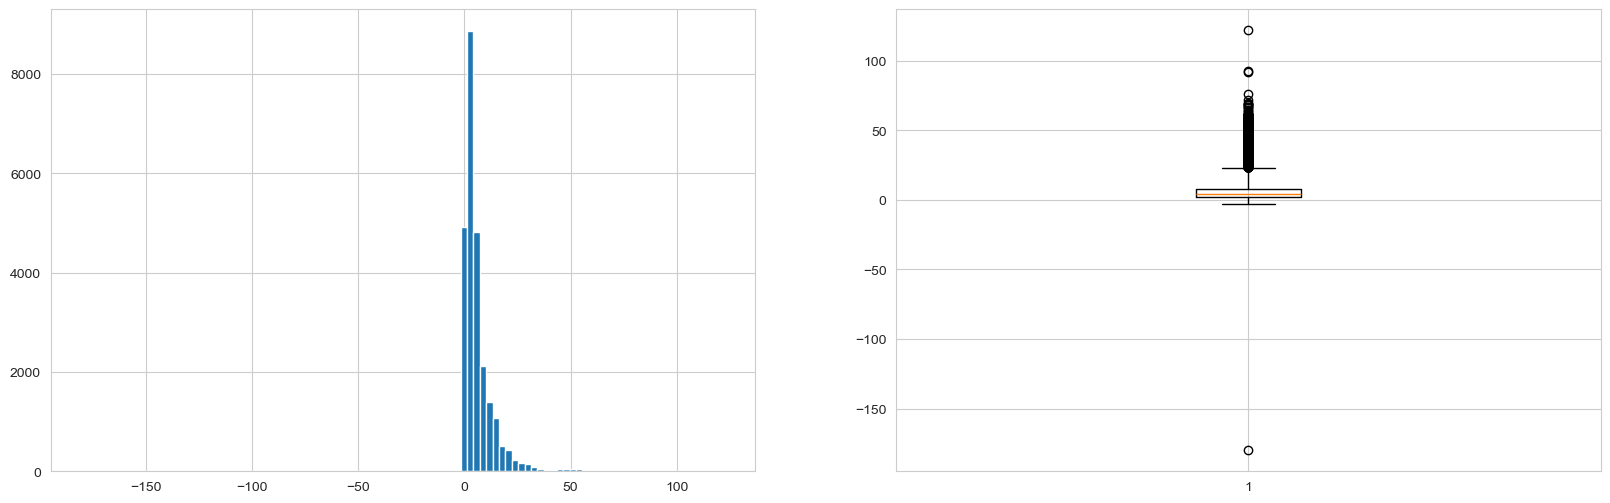

In [196]:
# Let's check how the observations in "age" feature are distributed via Histogram and Boxplot

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["age"], bins=100)

plt.subplot(122)
plt.boxplot(df["age"], whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

In [197]:
# Let's examine the first lowest 20 observation in "age" to see if there have been some extreme values away from others

df.sort_values(by=["age"], ascending=True)["age"].head(20)

# df["age"].sort_values(ascending=False).head(20)

5833    -180.00
8492      -3.00
17487     -1.00
21957      0.00
21953      0.00
18262      0.00
21952      0.00
21950      0.00
21949      0.00
18266      0.00
18267      0.00
21935      0.00
12024      0.00
21925      0.00
21960      0.00
8256       0.00
12019      0.00
12011      0.00
21909      0.00
21908      0.00
Name: age, dtype: float64

In [198]:
# Let's examine the first highest 20 observation in "age" to see if there have been some extreme values away from others

df.sort_values(by=["age"], ascending=False)["age"].head(20)

# df["age"].sort_values(ascending=False).head(20)

21931   122.00
19071    93.00
6827     92.00
8000     76.00
2355     72.00
4223     70.00
23477    69.00
23619    69.00
23450    68.00
23592    68.00
23408    67.00
23550    67.00
7867     66.00
2264     65.00
7861     64.00
12612    63.00
23565    62.00
8020     62.00
23423    62.00
9059     62.00
Name: age, dtype: float64

In [199]:
# let's explore if there is any pattern among ""make_model", "body_type", "type", and "previous_owner" by "age"

df.groupby(["make_model", "body_type", "type", "previous_owner"]).age.describe()

count  mean  \
make_model        body_type        type          previous_owner                
Dacia 1300        Sedan            Used          1.00             1.00 47.00   
Dacia Break       Station Wagon    Demonstration 1.00             1.00  0.00   
Dacia Business    Compact          Demonstration 1.00             1.00  1.00   
Dacia Comfort Tce Station Wagon    Demonstration 1.00             1.00  0.00   
Dacia Dokker      Compact          Used          1.00             1.00  4.00   
...                                                                ...   ...   
Volvo Xc90        Off-Road/Pick-Up Used          2.00            33.00  5.64   
                                                 8.00             1.00  8.00   
                  Sedan            Used          1.00             1.00  3.00   
                                                 2.00             1.00  4.00   
                  Station Wagon    Used          1.00             4.00  6.00   

                                                                 std   min  \
make_model        body_type        type          previous_owner              
Dacia 1300        Sedan            Used          1.00            NaN 47.00   
Dacia Break       Station Wagon    Demonstration 1.00            NaN  0.00   
Dacia Business    Compact          Demonstration 1.00            NaN  1.00   
Dacia Comfort Tce Station Wagon    Demonstration 1.00            NaN  0.00   
Dacia Dokker      Compact          Used          1.00            NaN  4.00   
...                                                              ...   ...   
Volvo Xc90        Off-Road/Pick-Up Used          2.00           1.29  4.00   
                                                 8.00            NaN  8.00   
                  Sedan            Used          1.00            NaN  3.00   
                                                 2.00            NaN  4.00   
                  Station Wagon    Used          1.00           0.00  6.00   

                                                                  25%   50%  \
make_model        body_type        type          previous_owner               
Dacia 1300        Sedan            Used          1.00           47.00 47.00   
Dacia Break       Station Wagon    Demonstration 1.00            0.00  0.00   
Dacia Business    Compact          Demonstration 1.00            1.00  1.00   
Dacia Comfort Tce Station Wagon    Demonstration 1.00            0.00  0.00   
Dacia Dokker      Compact          Used          1.00            4.00  4.00   
...                                                               ...   ...   
Volvo Xc90        Off-Road/Pick-Up Used          2.00            5.00  5.00   
                                                 8.00            8.00  8.00   
                  Sedan            Used          1.00            3.00  3.00   
                                                 2.00            4.00  4.00   
                  Station Wagon    Used          1.00            6.00  6.00   

                                                                  75%   max  
make_model        body_type        type          previous_owner              
Dacia 1300        Sedan            Used          1.00           47.00 47.00  
Dacia Break       Station Wagon    Demonstration 1.00            0.00  0.00  
Dacia Business    Compact          Demonstration 1.00            1.00  1.00  
Dacia Comfort Tce Station Wagon    Demonstration 1.00            0.00  0.00  
Dacia Dokker      Compact          Used          1.00            4.00  4.00  
...                                                               ...   ...  
Volvo Xc90        Off-Road/Pick-Up Used          2.00            6.00  9.00  
                                                 8.00            8.00  8.00  
                  Sedan            Used          1.00            3.00  3.00  
                                                 2.00            4.00  4.00  
                  Station Wagon    Used      

### 📝 Domain Knowledge About Age:


**🧐 [When does a car become a classic?](https://www.axa.ie/articles/driving/when-does-a-car-become-a-classic/#:~:text=Many%20insurance%20companies%20say%20a,used%20as%20a%20second%20car.)**

This is one of those question that produces a different answer depending on who you ask. Some people immediately think of James Bond’s Aston Martin DB5. Others will fondly mention the burgundy Mark II Jaguar Inspector Morse drove in the TV series of the same name.

UK motor tax laws define a vintage car as one that’s 30 or more years old. UK Revenue, however, specifies that a car is a classic if it is older than 15 years and has a value of more than £15,000, which would include cars such as Jaguars, Mercedes, Porsches and Triumphs. If you’re looking for classic car insurance, you’ll also find that each insurer has its own criteria. Many insurance companies say a classic car is one that’s more than 25 years old. It should be in excellent condition, driven 10,000 kilometres or less a year, and used as a second car. So, on that basis, it’s not all about Aston Martins and Porsches. In the US, they are much clearer on the subject. Their definition of a classic car comes from the Classic Car Club of America, which says that classic cars are ‘fine or unusual motor cars that were built between and including the years 1915 to 1948’. So, this would include the Aston Martin, Bentley and Austin - as well as the Jaguar, Rolls Royce, MG and Morris.

**🧐 [Understanding the Difference Between Classic, Antique, and Vintage Cars](https://americancollectors.com/articles/vintage-vs-classic-vs-antique-cars/)**

Many people classify vintage, antique and classic cars as the same thing. However, there are a few unique things that classify a car as “antique”, “classic”, or “vintage.” It is important to have a comprehensive understanding of your vehicle’s status. The key differences between vintage, classic and antique cars include:

- Price
- Historic Status
- Age

**Age**

The first key difference between the three types of collectors vehicles is their age. Classic, vintage and antique cars typically vary in age. Depending on your car’s classification, the age can interfere with the overall value and condition of your car. Older cars will need more work and care to remain in good condition. 

Here is how you can tell if your car is **``antique``**, **``classic``** or **``vintage``** by the year it was manufactured:

- **Vintage Car**: Manufactured between 1919 and 1930. Either a “survivor” or restored in conformance to the original manufacturer specifications
- **Antique Car**: Manufactured 1975 or earlier (>45 years old). Either a “survivor” or restored in conformance to the original manufacturer specifications
- **Classic Car**: Manufactured 2000 or earlier (>20 years old)



**Let us examine the age of vehicles equal to AND more than 20:**

In [200]:
# Let's explore the vehicles whose ages are equal to and  greater than twenty (20)

df.loc[df["age"] > 20][["make_model", "age", "previous_owner", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "cons_avg"]]\
                                 .sort_values(by=["age"], ascending=False)

make_model    age  previous_owner         body_type  \
21931           Hyundai Ioniq 122.00            1.00             Sedan   
19071                  Ford M  93.00            1.00       Convertible   
6827              Peugeot 201  92.00            3.00             Coupe   
8000              Peugeot 504  76.00            1.00             Sedan   
2355             Opel Olympia  72.00            2.00             Coupe   
4223              Renault 4Cv  70.00            3.00       Convertible   
23477            Volvo Buckel  69.00            3.00             Coupe   
23619            Volvo Buckel  69.00            3.00             Coupe   
23592             Volvo Pv544  68.00            3.00             Coupe   
23450             Volvo Pv544  68.00            3.00             Coupe   
23408               Volvo 444  67.00            2.00             Coupe   
23550               Volvo 444  67.00            1.00             Coupe   
7867          Peugeot Berline  66.00            4.00             Sedan   
2264              Opel Rekord  65.00            2.00             Coupe   
7861              Peugeot 403  64.00            3.00             Sedan   
12612           Skoda Felicia  63.00            2.00       Convertible   
8020              Peugeot 403  62.00            2.00             Sedan   
9059                 Fiat 500  62.00            2.00             Coupe   
23423             Volvo Pv544  62.00            2.00             Coupe   
23565             Volvo Pv544  62.00            2.00             Coupe   
12614           Skoda Felicia  61.00            4.00       Convertible   
4443           Renault Spider  61.00            4.00       Convertible   
23405       Volvo Pv544 Sport  61.00            4.00             Coupe   
23515             Volvo P1800  61.00            4.00             Coupe   
23547       Volvo Pv544 Sport  61.00            4.00             Coupe   
23373             Volvo P1800  61.00            4.00             Coupe   
23538             Volvo P1800  60.00            1.00             Coupe   
19108             Ford T-Bird  60.00            1.00       Convertible   
6499              Peugeot 404  60.00            1.00       Convertible   
23396             Volvo P1800  60.00            1.00             Coupe   
9285                 Fiat 600  59.00            2.00             Coupe   
10269              Fiat 1100D  59.00            1.00             Sedan   
9099                 Fiat 500  59.00            5.00             Coupe   
9096                 Fiat 130  59.00            5.00             Coupe   
8895                 Fiat 500  59.00            4.00       Convertible   
9299                 Fiat 600  58.00            2.00             Coupe   
23518             Volvo P1800  58.00            2.00             Coupe   
23514             Volvo P1800  58.00            2.00             Coupe   
2256              Opel Rekord  58.00            2.00             Coupe   
23376             Volvo P1800  58.00            2.00             Coupe   
23372             Volvo P1800  58.00            2.00             Coupe   
9148               Fiat Coupe  58.00            2.00             Coupe   
9218                 Fiat 600  57.00            4.00             Coupe   
9205                 Fiat 850  57.00            4.00             Coupe   
8358          Fiat 500 Abarth  57.00            4.00           Compact   
8376                 Fiat 500  57.00            4.00           Compact   
23585             Volvo P1800  57.00            3.00             Coupe   
23443             Volvo P1800  57.00            3.00             Coupe   
9138               Fiat Coupe  57.00            4.00             Coupe   
23403             Volvo P1800  56.00            2.00             Coupe   
23491            Volvo Amazon  56.00            2.00             Coupe   
9137                 Fiat 850  56.00            1.00             Coupe   
9279                 Fiat 850  56.00            2.00             Coupe   
9307                 Fi

<div style="background-color: lightpink; padding: 10px; font-size: 14px; font-weight: bold;">
    If you want, <code>``Vintage Cars``</code>, <code>``Antique Cars``</code>, and <code>``Classic Cars``</code> might be excluded from this analysis due to the lack of their counts AND a seperate analysis can be conducted.
</div>

In [201]:
# Let's explore occurances of each unique "age"

car_counts = df['age'].value_counts()
car_counts

age
3.00       3380
4.00       3258
0.00       2531
1.00       2381
5.00       2286
2.00       2224
6.00       1387
7.00       1154
8.00        868
9.00        640
10.00       604
11.00       577
12.00       470
15.00       395
14.00       377
13.00       350
16.00       303
17.00       193
18.00       159
19.00       159
20.00       144
22.00       141
21.00       138
23.00        98
24.00        67
27.00        61
28.00        61
25.00        59
30.00        51
26.00        50
31.00        47
32.00        45
29.00        44
49.00        25
50.00        24
34.00        22
35.00        21
44.00        19
33.00        19
56.00        16
36.00        16
52.00        14
55.00        14
37.00        14
51.00        13
47.00        13
54.00        12
53.00        12
43.00        11
46.00        10
45.00         9
41.00         9
39.00         9
38.00         9
48.00         7
58.00         7
57.00         7
61.00         6
42.00         5
40.00         5
59.00         5
62.00         4
60.0

In [202]:
# Let's assign the indeces of vehicles whose age is greater than twenty (20) OR less than zero (0)

drop_old_cars_index = df.loc[(df["age"] > 20) | (df["age"] < 0)].index
drop_old_cars_index

Index([   82,   365,   388,   423,   424,   426,   438,   455,   460,   473,
       ...
       24850, 24860, 24928, 24969, 24974, 24980, 25023, 25027, 25072, 25073],
      dtype='int64', length=1242)

In [203]:
# Let's drop these observations from DataaFrame

print(df.shape)
df.drop(drop_old_cars_index, axis=0, inplace=True)
print(df.shape)

(25082, 28)
(23840, 28)


In [204]:
# Let's re-examine occurances of each unique "age"

car_age_counts = df['age'].value_counts()
car_age_counts

# # Select the values where the count is less than 10 (or whatever you desire)
# drop_age_cars_index = car_age_counts[car_age_counts < 10].index

# df.drop(drop_age_cars_index, axis=0, inplace=True)

# OR

# # Keep rows where the age column is not in to_remove
# # df = df[~df.age.isin(drop_age_cars_index)]

age
3.00     3380
4.00     3258
0.00     2531
1.00     2381
5.00     2286
2.00     2224
6.00     1387
7.00     1154
8.00      868
9.00      640
10.00     604
11.00     577
12.00     470
15.00     395
14.00     377
13.00     350
16.00     303
17.00     193
18.00     159
19.00     159
20.00     144
Name: count, dtype: int64

#### The distribution of Age after modification

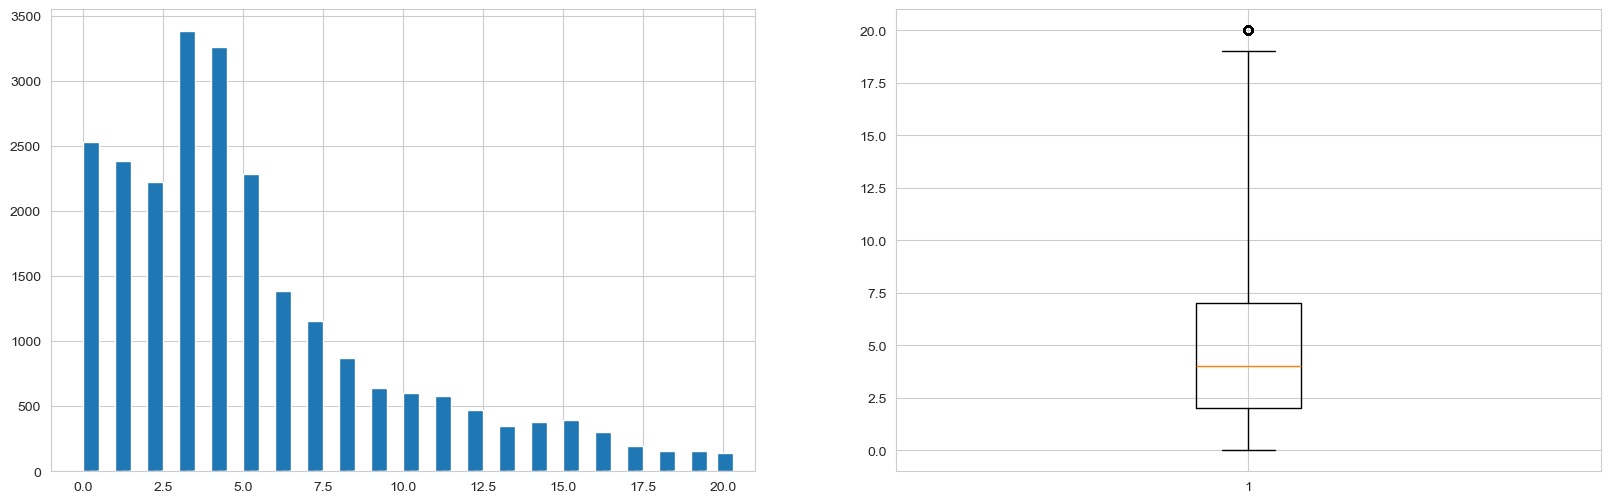

In [205]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["age"], bins=100, width=0.5)

plt.subplot(122)
plt.boxplot(df["age"], whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

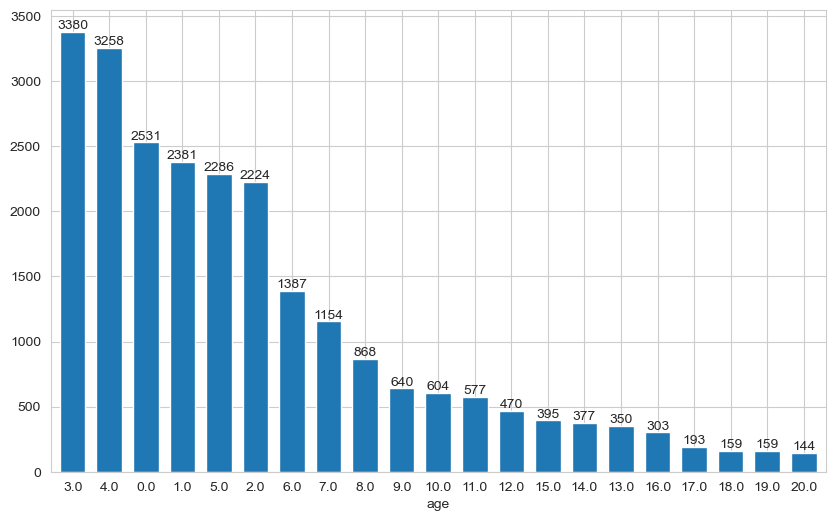

In [206]:
# Let's take a closer look at them

fig, ax = plt.subplots()

df["age"].value_counts(dropna=False).plot.bar(width=0.7)

plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container);

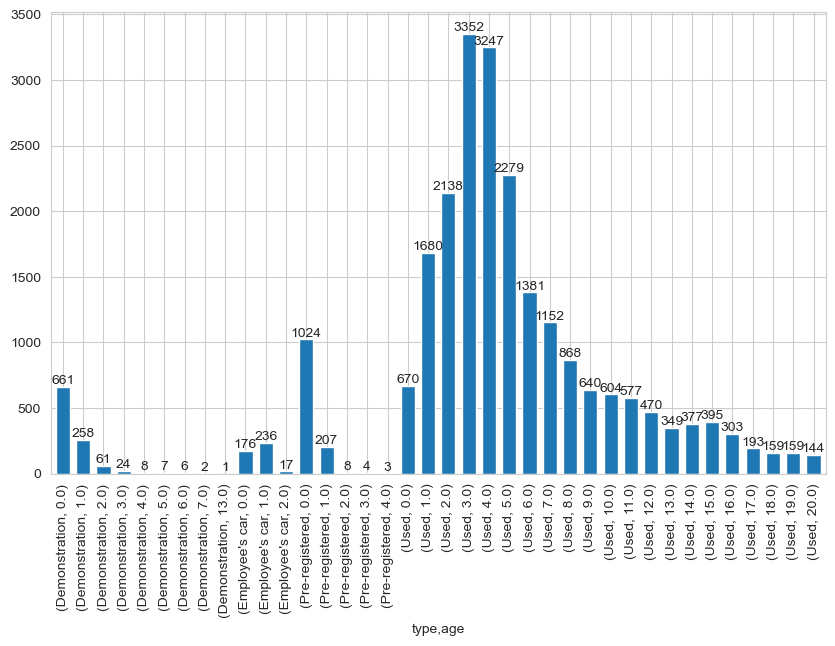

In [207]:
# Let's examine them in detail by type

fig, ax = plt.subplots()

df.groupby(["type", "age"])["age"].count().plot.bar(width=0.7)

for container in ax.containers:
    ax.bar_label(container);

In [208]:
# Let's check some basic information after dropping/modifying extreme values in "age" feature

first_looking(df, "age")

# 25082 - 23840 = 1242 extreme values were dropped from the dataset

column name    :  age
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  21
shape_of_df    :  (23840, 28)
--------------------------------
age
3.00     3380
4.00     3258
0.00     2531
1.00     2381
5.00     2286
2.00     2224
6.00     1387
7.00     1154
8.00      868
9.00      640
10.00     604
11.00     577
12.00     470
15.00     395
14.00     377
13.00     350
16.00     303
17.00     193
18.00     159
19.00     159
20.00     144
Name: count, dtype: int64


## power_kW

In [209]:
# Let's explore basic information about "power_kW"

first_looking(df, "power_kW")

column name    :  power_kW
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  220
shape_of_df    :  (23840, 28)
--------------------------------
power_kW
110.00    1957
96.00     1337
88.00     1178
81.00     1139
66.00     1071
85.00      984
103.00     965
74.00      886
140.00     739
51.00      701
70.00      683
100.00     630
55.00      495
92.00      456
147.00     390
125.00     380
120.00     326
80.00      314
90.00      311
132.00     302
135.00     301
118.00     245
84.00      222
130.00     217
115.00     213
67.00      211
82.00      200
77.00      200
63.00      184
53.00      184
97.00      180
173.00     179
145.00     173
221.00     162
104.00     160
150.00     152
59.00      143
73.00      136
206.00     134
68.00      129
202.00     127
87.00      122
60.00      122
107.00     119
44.00      119
54.00      117
121.00     115
75.00      112
52.00      110
184.00     107
165.00     107
112.00      98
50.00       95
180.00 

In [210]:
# Let's explore Descriptive Satatistics on "power_kW"

display(df.power_kW.describe())

# Differences between intervals
diff1 = df.power_kW.describe()['mean'] - df.power_kW.describe()['std']
diff2 = df.power_kW.describe()['25%'] - df.power_kW.describe()['min']
diff3 = df.power_kW.describe()['max'] - df.power_kW.describe()['75%']

print(f"The difference between the {color.BOLD + color.BLUE}mean value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['mean']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}standard deviation{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['std']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff1:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}25th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['25%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}minimum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['min']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff2:.2f}{color.RED + color.END}.")
print(f"The difference between the {color.BOLD + color.BLUE}75th percentile{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['75%']:.2f}){color.BLUE + color.END} and the {color.BOLD + color.BLUE}maximum value{color.BLUE + color.END} ({color.BOLD + color.GREEN}{df.price.describe()['max']:.2f}{color.GREEN + color.END}) is {color.BOLD + color.RED}{diff3:.2f}{color.RED + color.END}.")

count   23840.00
mean      103.42
std        41.51
min         1.00
25%        74.00
50%        96.00
75%       118.00
max       330.00
Name: power_kW, dtype: float64

The difference between the mean value (19457.71) and the standard deviation (10337.76) is 61.91.
The difference between the 25th percentile (12150.00) and the minimum value (490.00) is 73.00.
The difference between the 75th percentile (25490.00) and the maximum value (51940.00) is 212.00.


#### The distribution of Power KW

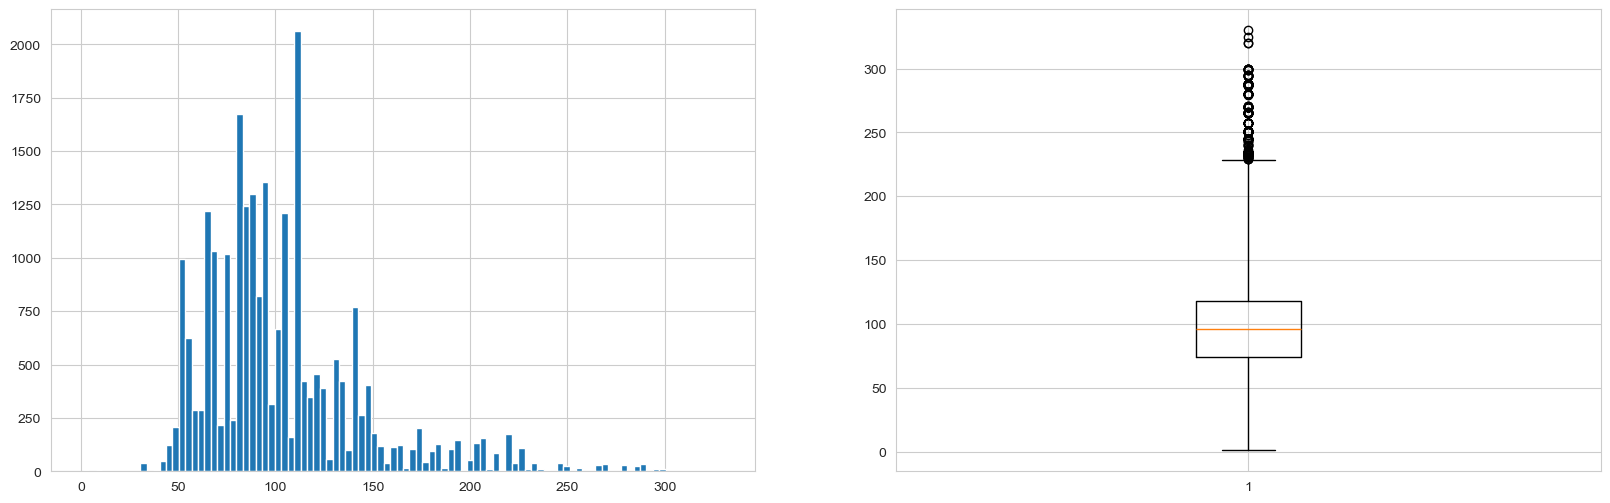

In [211]:
# Let's check how the observations in "power_kW" feature are distributed via Histogram and Boxplot

plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["power_kW"], bins=100)

plt.subplot(122)
plt.boxplot(df["power_kW"], whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

In [212]:
# Let's examine the first highest 20 observation in "power_kW" to see if there have been some extreme values away from others

df.sort_values(by=["power_kW"], ascending=False)["power_kW"].head(20)

# df["kW"].sort_values(ascending=False).head(20)

783     330.00
1314    325.00
932     320.00
934     320.00
2212    300.00
24053   300.00
23776   300.00
24414   300.00
24717   300.00
24904   300.00
24938   299.00
23641   299.00
23921   299.00
1050    295.00
1072    295.00
939     295.00
1364    295.00
23868   294.00
20712   294.00
2079    294.00
Name: power_kW, dtype: float64

In [213]:
# Let's examine the first lowest 20 observation in "power_kW" to see if there have been some extreme values away from others

# df.sort_values(by=["kW"], ascending=True)["kW"].head(20)

df["power_kW"].sort_values(ascending=True).head(20)

4107     1.00
4345     1.00
19324    3.00
4781     4.00
5006     4.00
4655     4.00
4618     4.00
5045     4.00
21592    6.00
4454     7.00
4795     8.00
4769     8.00
4680     8.00
4074     9.00
3779    12.00
4698    12.00
3827    13.00
15077   18.00
15022   18.00
15012   19.00
Name: power_kW, dtype: float64

In [214]:
# let's explore if there is any pattern among ""make_model", "body_type", and "fuel_type" by "power_kW"

df.groupby(["make_model", "body_type", "fuel_type"]).power_kW.describe()

count   mean  \
make_model               body_type        fuel_type                          
Dacia Break              Station Wagon    Benzine              1.00 110.00   
Dacia Business           Compact          Benzine              1.00  33.00   
Dacia Comfort Tce        Station Wagon    Benzine              1.00  81.00   
Dacia Dokker             Compact          Diesel               1.00  66.00   
                         Off-Road/Pick-Up Benzine              1.00  75.00   
                                          Liquid/Natural Gas   1.00  75.00   
                         Sedan            Diesel               1.00  55.00   
                         Station Wagon    Benzine             17.00  82.18   
                                          Diesel              28.00  63.50   
                                          Liquid/Natural Gas   6.00  72.00   
Dacia Duster             Convertible      Liquid/Natural Gas   1.00  84.00   
                         Off-Road/Pick-Up Benzine            129.00  91.73   
                                          Diesel             164.00  81.91   
                                          Liquid/Natural Gas  27.00  77.56   
                         Sedan            Benzine              1.00  92.00   
                                          Diesel               2.00  80.00   
                                          Liquid/Natural Gas   1.00  74.00   
                         Station Wagon    Benzine              5.00  91.80   
                                          Diesel              17.00  80.41   
                                          Liquid/Natural Gas   1.00  67.00   
Dacia Essential          Compact          Benzine              2.00  33.00   
Dacia Jogger             Off-Road/Pick-Up Liquid/Natural Gas   1.00  74.00   
                         Sedan            Benzine              1.00  81.00   
                         Station Wagon    Benzine             79.00  80.91   
                                          Liquid/Natural Gas   5.00  74.00   
Dacia Lodgy              Compact          Diesel               1.00  85.00   
                         Sedan            Diesel               1.00  85.00   
                                          Liquid/Natural Gas   1.00  75.00   
                         Station Wagon    Benzine             34.00  83.38   
                                          Diesel              32.00  80.69   
                                          Liquid/Natural Gas   2.00  70.50   
Dacia Logan              Compact          Benzine              8.00  54.88   
                                          Diesel               4.00  63.25   
                                          Liquid/Natural Gas   1.00  66.00   
                         Sedan            Benzine             29.00  55.76   
                                          Diesel               2.00  66.00   
                                          Liquid/Natural Gas   3.00  71.33   
                         Station Wagon    Benzine            104.00  62.39   
                                          Diesel              31.00  64.65   
                                          Liquid/Natural Gas  12.00  67.33   
Dacia Sandero            Compact          Benzine            252.00  64.51   
                                          Diesel              76.00  65.84   
                                          Liquid/Natural Gas  11.00  72.64   
                         Convertible      Benzine              1.00  66.00   
                         Coupe            Benzine              2.00  60.50   
                         Off-Road/Pick-Up Benzine             41.00  66.63   
                                          Diesel               2.00  62.50   
                                          Liquid/Natural Gas   7.00  73.00   
                         Sedan            Benzine            255.00  64.07   
                                          Diesel              59.00  65.75   
      

**Let us examine Power KW values of vehicles equal to 9 OR equal to 12:**

In [215]:
# Let's explore the vehicles whose Power KW values of vehicles equal to nine (9) OR equal to twelve (12)

df.loc[(df["power_kW"] == 9) | (df["power_kW"] == 12)][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg", "power_kW"]]\
                                 .sort_values(by=["power_kW"], ascending=False)

make_model   age body_type    gearbox drivetrain  gears  \
3779   Renault Twizy 10.00   Compact  Automatic       Rear   1.00   
4698  Renault Megane  9.00     Coupe     Manual      Front   6.00   
4074   Renault Twizy  0.00   Compact  Automatic       Rear   1.00   

      engine_size fuel_type  empty_weight  co_emissions  cons_avg  power_kW  
3779      1598.00  Electric        473.00          0.00      2.36     12.00  
4698      1998.00   Benzine       1387.00        178.00      7.60     12.00  
4074      1598.00  Electric        562.00          0.00      2.36      9.00

In [216]:
# Let's take a close look at some of these observations for examining if their powe KW values reflect the reality when compared with their counterparts 

# df.loc[df.make_model == "Renault Twizy"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg", "power_kW"]]
# df.loc[df.make_model == "Renault Megane"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg", "power_kW"]]

**Let's focus on the consumption average values of "Renault Twizy"**

In [217]:
# define a function to highlight the highest, median, and minimum values in a column
def highlight_max_median_min(s):
    is_max = s == s.max()
    is_median = s == s.median()
    is_min = s == s.min()
    return ["background-color: pink" if v else "background-color: lightgreen" if w else "background-color: yellow" if x else "" for v, w, x in zip(is_max, is_median, is_min)]

# filter the DataFrame and apply the styling function
styled_df = df.loc[df.make_model == "Renault Twizy"][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight", "co_emissions", "cons_avg", "power_kW"]].style.apply(highlight_max_median_min, subset=["power_kW"])

# display the styled DataFrame
styled_df

### 📝 Domain Knowledge on kW of Some Cars:

- Nissan Leaf - 110kW
- Hyundai Kona Electric – 150kW
- Mercedes-Benz EQC - 300kW
- Porsche Taycan Turbo S – 560kW
- Tesla Model S Performance – 595kW

**🧐 [List of production cars by power output](https://en.wikipedia.org/wiki/List_of_production_cars_by_power_output)**

In [218]:
# Let's explore occurances of each unique "power_kW"

car_kW_counts = df['power_kW'].value_counts()
car_kW_counts

power_kW
110.00    1957
96.00     1337
88.00     1178
81.00     1139
66.00     1071
85.00      984
103.00     965
74.00      886
140.00     739
51.00      701
70.00      683
100.00     630
55.00      495
92.00      456
147.00     390
125.00     380
120.00     326
80.00      314
90.00      311
132.00     302
135.00     301
118.00     245
84.00      222
130.00     217
115.00     213
67.00      211
82.00      200
77.00      200
63.00      184
53.00      184
97.00      180
173.00     179
145.00     173
221.00     162
104.00     160
150.00     152
59.00      143
73.00      136
206.00     134
68.00      129
202.00     127
87.00      122
60.00      122
107.00     119
44.00      119
54.00      117
121.00     115
75.00      112
52.00      110
184.00     107
165.00     107
112.00      98
50.00       95
180.00      94
143.00      90
117.00      89
99.00       89
133.00      89
114.00      87
169.00      84
105.00      83
65.00       82
49.00       80
62.00       79
190.00      78
116.00      76
2

In [219]:
# Let's see the observations whose occurances of each unique value in "power_kW" are less than 10

car_kW_counts[car_kW_counts < 10]

power_kW
224.00    9
127.00    9
187.00    9
102.00    8
131.00    8
123.00    8
156.00    8
69.00     8
182.00    7
153.00    7
232.00    7
231.00    7
300.00    6
40.00     6
111.00    6
203.00    6
148.00    5
4.00      5
294.00    5
193.00    5
295.00    4
146.00    4
166.00    4
106.00    4
109.00    4
94.00     4
299.00    3
186.00    3
174.00    3
178.00    3
188.00    3
240.00    3
196.00    3
229.00    3
149.00    3
215.00    3
271.00    3
266.00    3
8.00      3
320.00    2
18.00     2
214.00    2
12.00     2
227.00    2
58.00     2
35.00     2
243.00    2
124.00    2
222.00    2
1.00      2
167.00    2
47.00     2
6.00      1
325.00    1
46.00     1
239.00    1
3.00      1
286.00    1
189.00    1
330.00    1
39.00     1
13.00     1
279.00    1
32.00     1
216.00    1
24.00     1
207.00    1
217.00    1
45.00     1
7.00      1
34.00     1
19.00     1
183.00    1
31.00     1
9.00      1
172.00    1
242.00    1
236.00    1
126.00    1
89.00     1
41.00     1
Name: count, dtype:

In [220]:
# Let's put ALL these observations into list and assign them to an object named less_freq_kW

# run the command %pprint. This turns pretty printing off. The list will now display horizontally.
%pprint

less_freq_kW = car_kW_counts[car_kW_counts < 10].index.to_list()
less_freq_kW

Pretty printing has been turned OFF


[224.0, 127.0, 187.0, 102.0, 131.0, 123.0, 156.0, 69.0, 182.0, 153.0, 232.0, 231.0, 300.0, 40.0, 111.0, 203.0, 148.0, 4.0, 294.0, 193.0, 295.0, 146.0, 166.0, 106.0, 109.0, 94.0, 299.0, 186.0, 174.0, 178.0, 188.0, 240.0, 196.0, 229.0, 149.0, 215.0, 271.0, 266.0, 8.0, 320.0, 18.0, 214.0, 12.0, 227.0, 58.0, 35.0, 243.0, 124.0, 222.0, 1.0, 167.0, 47.0, 6.0, 325.0, 46.0, 239.0, 3.0, 286.0, 189.0, 330.0, 39.0, 13.0, 279.0, 32.0, 216.0, 24.0, 207.0, 217.0, 45.0, 7.0, 34.0, 19.0, 183.0, 31.0, 9.0, 172.0, 242.0, 236.0, 126.0, 89.0, 41.0]

In [221]:
# If you wish them drop from dataset, use the following code:

# # Select the values where the count is less than 10 (or whatever you desire)
# drop_kW_index = car_kW_counts[car_kW_counts < 10].index

# df.drop(drop_kW_index, axis=0, inplace=True)

# OR

# # Keep rows where the kW column is not in to_remove
# # df = df[~df.kW.isin(drop_kW_index)]

**Let us assign the values of observations whose frequencies are less than 10 to NaN:** 

In [222]:
# Let us assign the values of observations whose frequencies are less than 10 to NaN:

df["power_kW"].replace(less_freq_kW, np.nan, inplace=True)

In [223]:
# Let's explore how many NaN values there have been in "power_kW"

df["power_kW"].isnull().sum()

257

In [224]:
# This DEF will fill the missing values in the "power_kW" with the median value based on "make_model" and "body_type"

fill(df, "make_model", "body_type", "power_kW", "median")

COLUMN NAME    :  power_kW
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  143
--------------------------------
power_kW
33.00       42
43.00       47
44.00      119
48.00       31
49.00       81
50.00       96
51.00      704
52.00      110
53.00      185
54.00      119
55.00      496
56.00       11
57.00       20
59.00      155
60.00      122
61.00       22
62.00       79
63.00      184
64.00       64
65.00       82
66.00     1074
67.00      213
68.00      130
70.00      686
71.00       33
72.00       46
73.00      136
74.00      893
75.00      112
76.00       18
77.00      200
78.00       16
79.00       23
80.00      315
81.00     1142
82.00      201
83.00       21
84.00      223
85.00      985
86.00       35
87.00      122
88.00     1182
90.00      312
91.00       21
92.00      463
93.00       33
93.50        1
95.00       13
96.00     1371
97.00      180
98.00       47
98.50        1
99.00       89
100.00     633
101.00      33
103.00 

In [225]:
# Let's find the average power_kW value

df["power_kW"].mean()

103.03609479865771

In [226]:
# Let's find the power_kW value at the middle

df["power_kW"].median()

96.0

#### The examination of extreme values by means of z-score

In [227]:
# Print the number of rows before dropping outliers
print("Number of rows before dropping outliers:", len(df))

# Calculate the Modified z-scores for the feature
z_scores = np.abs((df["power_kW"] - df["power_kW"].median()) / df["power_kW"].std())

# Drop the rows with z-scores above the threshold
df = df[z_scores < 3]

# Drop the rows with z-scores above the threshold
df.reset_index(drop=True, inplace=True)

# Print the number of rows after dropping outliers
print("Number of rows after dropping outliers:", len(df))

Number of rows before dropping outliers: 23840
Number of rows after dropping outliers: 23239


#### The distribution of Power KW after modification by z-score

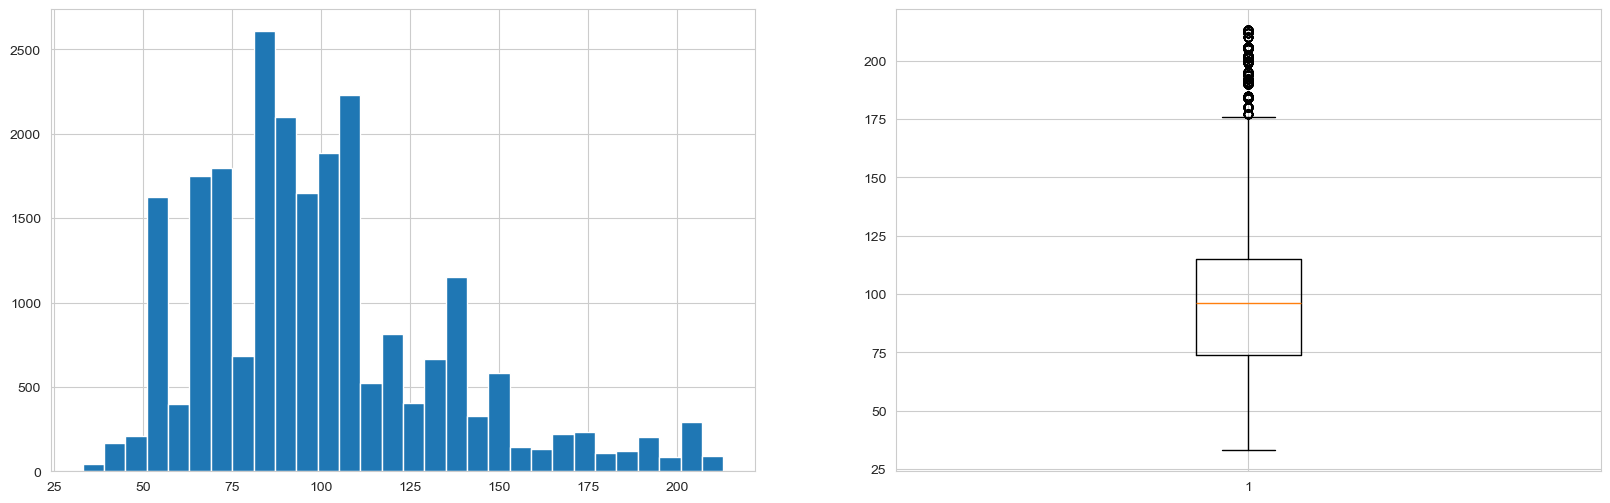

In [228]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["power_kW"], bins=30)

plt.subplot(122)
plt.boxplot(df["power_kW"])

plt.show()

<Figure size 2000x600 with 0 Axes>

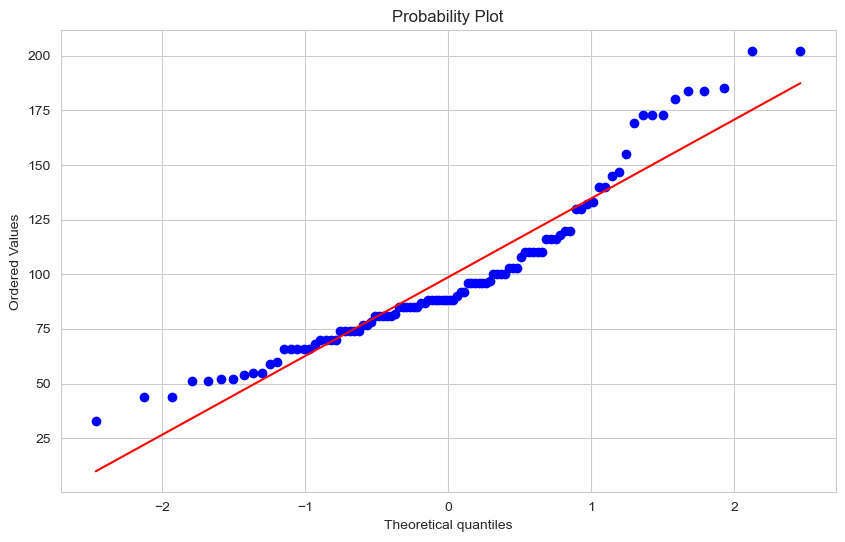

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

plt.figure(figsize=(20, 6))

# Sample 50 observations from the 'power_kW' column
my_data = df['power_kW'].sample(100)

# Calculate the mean and standard deviation of the sample
mu = np.mean(my_data)
sigma = np.std(my_data)

# Generate a normal distribution with the same mean and standard deviation as the sample
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution as a dotted red line on the Q-Q plot
# plt.plot(x, y, 'r--', linewidth=2)

# Create the Q-Q plot
fig, ax = plt.subplots()
stats.probplot(my_data, dist="norm", plot=ax)

# Show the plot
plt.show()

In [230]:
# Let's check some basic information after dropping/modifying extreme values in "power_kW" feature

first_looking(df, "power_kW")

# 23840 - 23239 = 601 extreme values were dropped from the dataset

column name    :  power_kW
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  127
shape_of_df    :  (23239, 28)
--------------------------------
power_kW
110.00    1982
96.00     1371
88.00     1182
81.00     1142
66.00     1074
85.00      985
103.00     969
74.00      893
140.00     743
51.00      704
70.00      686
100.00     633
55.00      496
92.00      463
147.00     399
125.00     381
120.00     333
80.00      315
90.00      312
132.00     303
135.00     301
118.00     246
84.00      223
130.00     220
67.00      213
115.00     213
145.00     206
82.00      201
77.00      200
173.00     187
53.00      185
63.00      184
97.00      180
104.00     160
59.00      155
150.00     152
73.00      136
206.00     134
68.00      130
202.00     127
60.00      122
87.00      122
54.00      119
107.00     119
44.00      119
121.00     118
75.00      112
52.00      110
184.00     107
165.00     107
112.00      98
50.00       96
180.00      94
105.00 

## Final_Step

In [ ]:
df.head(3).T

In [ ]:
df.info()

In [ ]:
numeric_col = df.select_dtypes(include='number')
numeric_col.head()

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(numeric_col.corr(), annot=True, cmap="Blues", linewidths=0.2, annot_kws={"size": 12});

In [ ]:
# function for set text color of correlation values in Dataframes

def color_correlation(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'cyan'    
    else:
        color = 'black'
    return 'color: %s' % color
 
numeric_col.corr().style.applymap(color_correlation)

### The Examination of Multicolineraty

If there is a strong correlation between the independent variables, this situation is called **multicolineraty**.
 
**Multicolineraty** prevents my model from detecting important features.

The problem of multicollinearity can be overcome by several different methods. However, each method has its own cons and prons. To get the best trade off in terms of cons and pros, you need domain knowledge and a good understanding of the problem at hand.

To overcome multicollinearity;

- Remove some of the highly correlated independent variables,

- Linearly combine the independent variables, such as adding them together,

- Perform an analysis designed for highly correlated variables, such as principal components analysis or partial least squares regression.

- Use regularization models like Lasso and Ridge.

Depending on the situation, it may not be a problem for your model if only slight or moderate collinearity issue occurs. However, it is strongly advised to solve the issue if severe collinearity issue exists(e.g. correlation >0.8 between 2 variables or Variance inflation factor(VIF) >20 )

**🧐 [Multi-Collinearity in Regression](https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea)**

In [ ]:
from termcolor import cprint

def multicolinearity_control(df):                    
    df_temp = df.corr()
    count = 'Done'
    feature =[]
    collinear= []
    for col in df_temp.columns:
        for i in df_temp.index:
            if abs(df_temp[col][i] > .6 and df_temp[col][i] < 1):
                    feature.append(col)
                    collinear.append(i)
                    cprint(f"Multicolinearity alert in between --> {col} - {i} --> {round(df_temp[col][i], 6)}", "red", attrs=["bold"])
    else:
#         cprint(f"There is NO multicollinearity problem.", "blue", attrs=["bold"])
        pass

In [ ]:
multicolinearity_control(numeric_col)

In [ ]:
target = 'price'

corr_by_target = numeric_col.corr()[target].sort_values()
corr_by_target

In [ ]:
ax = sns.barplot(y = corr_by_target.index, x = corr_by_target)
plt.xticks(rotation=90)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fontsize=11, rotation=0, label_type='center', color="white")

In [ ]:
# def check_dist(numeric_col, var):
#     plt.figure(figsize=(15,6))
#     plt.subplot(1, 2, 1)
#     sns.histplot(x=var, data=numeric_col)
#     plt.subplot(1, 2, 2)
#     stats.probplot(numeric_col[var], dist="norm", plot=plt)
#     plt.show()

In [ ]:
# for col in numeric_col.drop("price", axis=1).columns:
#     check_dist(numeric_col, col)

In [ ]:
# sns.pairplot(df_num, size=2.5);

In [ ]:
df.info()

In [ ]:
df.duplicated(keep=False).sum()

# At the beginning of this notebook, it was 3803

In [ ]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

### ⚠️ Should we remove duplicates from a dataset❓


There has been a hot debate on this issue: While some people claim that "**Yes**. You ALWAYS remove duplicate values, regardless of the model used. The cleaner the data, the better the results." and others mention that "**No**. The duplicates indicate frequency which is important, especially in Bayesian based methods. Ordinates that are more frequent in the training data should be more likely to come up in testing". On the other haand, some are inclined to the situation stating that "**It...depends**. Mostly it depends on what your goals are and what your dataset looks like" or "Like all things it depends on the end goal. In fact, sometimes we put in duplicates!"

Our approach is that: Yes and No according to the results models (metrics, such as RMSE or R2, accuracy scores etc.).

 - Removing duplicates is recommended if you find out they are just–duplicated records. This is because duplicates can add the weights of samples and can cause bias. They can also make training longer as they’d increase data size.

 - No, because the duplicates could be the actual nature of the dataset. Also, some datasets can have oversampled samples intentionally. So it's important first to figure that out.
 
**🧐 [Should we remove duplicates from a data-set while training a Machine Learning algorithm (shallow and/or deep methods)?](https://www.quora.com/Should-we-remove-duplicates-from-a-data-set-while-training-a-Machine-Learning-algorithm-shallow-and-or-deep-methods)**

**🧐 [Should I remove duplicates from a data set in machine learning?](https://www.quora.com/Should-I-remove-duplicates-from-a-data-set-in-machine-learning)**

**Summary:**

Keeping duplicate features in your dataset introduces the problem of multicollinearity.
 - In the case of linear models, weights distribution between the two features will be problematic.
 - If you are using tree-based models, it won’t matter unless you are looking at feature importance.
 - In the case of distance-based models, it will make that feature count more in the distance.

**🧐 [2 Types of Duplicate Features in Machine Learning](https://towardsdatascience.com/2-types-of-duplicate-features-in-machine-learning-2931de6c949b)**

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Models with Duplicates</p>
<img src=https://i.ibb.co/KFV30q0/models-with-duplicates.png width="900" height="100"><br>


## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Models without Duplicates</p>
<img src=https://i.ibb.co/024brch/models-without-duplicates.png width="900" height="100"><br>

**When the results above are evaluated it looks like continuing without duplicates would be more suitable for further analysis**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Some Specific Questions on Analysis</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### <span style="color:#7c2267">1) Suppose you work for a car rental company and your boss has asked you to analyze the mileage of the vehicles in your fleet. Specifically, they want to know the average mileage of vehicles based on their make and model, as well as their body type.</span>

#### a) What is the average mileage of vehicles by make & model and body type?

In [ ]:
# Average mileage of Vehicles by make_model & body_type

avg_mileage = df.groupby(["make_model", "body_type"]).mileage.mean().sort_values(ascending=False)
avg_mileage

In [ ]:
# Top 10 avg_mileage by make_model & body_type
top10_highest_avg_mileage = avg_mileage.sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize=(20, 8))

# Plot the bar chart with top10_avg_mileage by make_model & body_type
top10_highest_avg_mileage.plot.bar(ax=ax, x='Body Type', y='Average Mileage', width=0.8, rot=80, fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fontsize=18, rotation=0)

ax.set_xlabel('Body Type', fontsize=25)
ax.set_ylabel('Average Mileage in KM', fontsize=25)

# Add title to the plot
ax.set_title('Top 10 Highest Average Mileage by Make & Model and Body Type', fontsize=30)

plt.show()

#### b) What is the average mileage of vehicles by body type?

In [ ]:
# Average mileage of each body_type

avg_mileage_body = df.groupby("body_type").mileage.mean().sort_values(ascending=False)
avg_mileage_body

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the bar chart with sorted avg_mileage_body
avg_mileage_body.plot.bar(ax=ax, x='Body Type', y='Average Mileage', width=0.8, rot=0, fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fontsize=18, rotation=0)

ax.set_xlabel('Body Type', fontsize=25)
ax.set_ylabel('Average Mileage in KM', fontsize=25)

# Add title to the plot
ax.set_title('Average Mileage by Body Type', fontsize=30)

plt.show()

### <span style="color:#7c2267">2) Suppose you work for a car rental company and your boss has asked you to analyze the price of the vehicles in your fleet. Specifically, they want to compare the average price of vehicles based on their makes, models, and as well as body types, and then in detail analyse them broken by their gearbox.</span>

**Let's first explore the average price of vehicles by their makes & models, makes, body types and gear boxes individually:** 

#### a) What is the average price of vehicles by makes & models?

In [ ]:
# Average Price by makes & models

avg_price_make_model = df.groupby("make_model").price.mean().sort_values(ascending=False)
avg_price_make_model

In [ ]:
# Top 10 highest average price by make_model
top10_highest_avg_price_make_model = avg_price_make_model.sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize=(20, 8))

# Plot the bar chart with top10 average price by make_model & body_type
top10_highest_avg_price_make_model.plot.bar(ax=ax, x='Make & Model', y='Average Price', width=0.8, rot=70, fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fontsize=18, rotation=0)

ax.set_xlabel('Make & Model', fontsize=25)
ax.set_ylabel('Average Price in €', fontsize=25)

# Add title to the plot
ax.set_title('Top 10 Average Price by Make & Model', fontsize=30)

plt.show()

#### b) What is the average price of vehicles by makes?

In [ ]:
# Average Price by makes

avg_price_make = df.groupby("make").price.mean().sort_values(ascending=False)
avg_price_make

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the bar chart with average price by make
avg_price_make.plot.bar(ax=ax, x='Make', y='Average Price', width=0.8, rot=0, fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fontsize=18, rotation=0)

ax.set_xlabel('Make', fontsize=25)
ax.set_ylabel('Average Price in €', fontsize=25)

# Add title to the plot
ax.set_title('The Average Price by Make', fontsize=30)

plt.show()

#### c) What is the average price of vehicles by body types?

In [ ]:
# Average Price by body types

avg_price_body = df.groupby("body_type").price.mean().sort_values(ascending=False)
avg_price_body

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the bar chart with average price by body_type
avg_price_body.plot.bar(ax=ax, x='Body Type', y='Average Price', width=0.8, rot=0, fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fontsize=18, rotation=0)

ax.set_xlabel('Body Type', fontsize=25)
ax.set_ylabel('Average Price in €', fontsize=25)

# Add title to the plot
ax.set_title('The Average Price by Body Type', fontsize=30)

plt.show()

#### d) What is the average price of vehicles by gearbox?

In [ ]:
# Average Price by gearbox

avg_price_gearbox = df.groupby("gearbox").price.mean().sort_values(ascending=False)
avg_price_gearbox

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the bar chart with average price by gearbox
avg_price_gearbox.plot.bar(ax=ax, x='Gearbox', y='Average Price', width=0.8, rot=0, fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fontsize=18, rotation=0)

ax.set_xlabel('Gearbox', fontsize=25)
ax.set_ylabel('Average Price in €', fontsize=25)

# Add title to the plot
ax.set_title('The Average Price by Gearbox', fontsize=30)

plt.show()

#### e) What is the average price of vehicles by makes & models and body types?

**Now let's explore the average price of vehicles according to their makes & models and gear boxes:** 

In [ ]:
# Average Price of Vehicles by make_model and gearbox

avg_price_make_model_by_gearbox = df.groupby(["make_model", "gearbox"]).price.mean()#.sort_values(ascending=False)
avg_price_make_model_by_gearbox

In [ ]:
# Top 10 average price by make_model and gearbox
top10_highest_avg_price_make_model_by_gearbox = avg_price_make_model_by_gearbox.sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize=(20, 8))

# Plot the bar chart with top10 average price by make_model & gearbox
top10_highest_avg_price_make_model_by_gearbox.plot.bar(ax=ax, x='Make & Model and Gearbox', y='Average Price', width=0.8, rot=70, fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fontsize=18, rotation=0)

ax.set_xlabel('Make & Model and Gearbox', fontsize=25)
ax.set_ylabel('Average Price in €', fontsize=25)

# Add title to the plot
ax.set_title('Top 10 Average Price by Make & Model and Gearbox', fontsize=30)

plt.show()

#### f) What is the average price of vehicles by makes and body types?

**Now let's explore the average price of vehicles according to their makes and gear boxes:** 

In [ ]:
# Average Price of Vehicles by make_model and gearbox

avg_price_make_by_gearbox = df.groupby(["make", "gearbox"]).price.mean()#.sort_values(ascending=False)
avg_price_make_by_gearbox

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the bar chart with average price by Make & Gearbox
avg_price_make_by_gearbox.plot.bar(ax=ax, x='Make & Gearbox', y='Average Price', width=0.8, rot=90, fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fontsize=18, rotation=90)

ax.set_xlabel('Make & Gearbox', fontsize=25)
ax.set_ylabel('Average Price in €', fontsize=25)

# Add title to the plot
ax.set_title('The Average Price by Make & Gearbox', fontsize=30)

plt.show()

#### g) What is the average price of vehicles by body types and gearboxes?

**Now let's explore the average price of vehicles according to their body types and gearboxes:** 

In [ ]:
# Average Price of Vehicles by body_type and gearbox

avg_price_body_type_by_gearbox = df.groupby(["body_type", "gearbox"]).price.mean().sort_values(ascending=False)
avg_price_body_type_by_gearbox

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the bar chart with average price by Make & Gearbox
avg_price_body_type_by_gearbox.plot.bar(ax=ax, x='Body Type & Gearbox', y='Average Price', width=0.8, rot=80, fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fontsize=14, rotation=0)

ax.set_xlabel('Body Type & Gearbox', fontsize=25)
ax.set_ylabel('Average Price in €', fontsize=25)

# Add title to the plot
ax.set_title('The Average Price by Body Type & Gearbox', fontsize=30)

plt.show()

### <span style="color:#7c2267">3) Suppose you work for a car dealership and your manager has asked you to analyze the prices of the vehicles in your inventory. Specifically, they want you to determine the average price of the vehicles based on the fuel types they use, broken down by make & model, makes, and body types.</span>

#### a) What is the average price of vehicles by fuel types?

In [ ]:
# Average Price by fuel_type

avg_price_fuel = df.groupby("fuel_type").price.mean().sort_values(ascending=False)
avg_price_fuel

In [ ]:
ax = avg_price_fuel.sort_values(ascending=False).plot.bar(figsize=(25, 10), fontsize=20, width=0.8, rot=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=25, rotation=0)
    
ax.set_xlabel('Fuel Type', fontsize=30)
ax.set_ylabel('Average Price in €', fontsize=25);

#### b) What is the average price of vehicles by makes & models and fuel types?

In [ ]:
# Average Price of Vehicles by make_model & fuel_type 

avg_price_fuel_make_model = df.groupby(["make_model", "fuel_type"]).price.mean()
avg_price_fuel_make_model

In [ ]:
# Top 10 average price by make_model and fuel_type
top10_avg_price_fuel_make_model = avg_price_fuel_make_model.sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize=(20, 8))

# Plot the bar chart with top10 average price by make_model & gearbox
top10_avg_price_fuel_make_model.plot.bar(ax=ax, x='Make & Model and Fuel Type', y='Average Price', width=0.8, rot=70, fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fontsize=18, rotation=0)

ax.set_xlabel('Make & Model and Fuel Type', fontsize=25)
ax.set_ylabel('Average Price in €', fontsize=25)

# Add title to the plot
ax.set_title('Top 10 Average Price by Make & Model and Fuel Type', fontsize=30)

plt.show()

#### c) What is the average price of vehicles by makes and fuel types?

In [ ]:
# Average Price of Vehicles by make & fuel_type 

avg_price_fuel_make = df.groupby(["make", "fuel_type"]).price.mean()#.sort_values(ascending=False)
avg_price_fuel_make

In [ ]:
ax = avg_price_fuel_make.sort_values(ascending=False).plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=90)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=90)
    
ax.set_xlabel('Make', fontsize=30)
ax.set_ylabel('Average Price in €', fontsize=25);
# plt.legend(title="fuel_type", title_fontsize=16, prop={'size': 16}, loc='best');

In [ ]:
# Top 10 average price by make_model and fuel_type
top10_avg_price_fuel_make = avg_price_fuel_make.sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize=(20, 8))

# Plot the bar chart with top10 average price by make & fuel_type
top10_avg_price_fuel_make.plot.bar(ax=ax, x='Make and Fuel Type', y='Average Price', width=0.8, rot=70, fontsize=16)

for container in ax.containers:
    ax.bar_label(container, fontsize=18, rotation=0)

ax.set_xlabel('Make and Fuel Type', fontsize=25)
ax.set_ylabel('Average Price in €', fontsize=25)

# Add title to the plot
ax.set_title('Top 10 Average Price by Make and Fuel Type', fontsize=30)

plt.show()

#### d) What is the average price of vehicles by makes and body types?

In [ ]:
# Average Price of Vehicles by make & body_type 

avg_price_fuel_body_type = df.groupby(["body_type", "fuel_type"]).price.mean().sort_values(ascending=False)
avg_price_fuel_body_type

In [ ]:
# Top 10 average price by body_type and fuel_type
# top10_avg_price_fuel_body = avg_price_fuel_body_type.sort_values(ascending=False)[:10]

fig, ax = plt.subplots(figsize=(20, 8))

# Plot the bar chart with top10 average price by body_type & fuel_type
avg_price_fuel_body_type.plot.bar(ax=ax, x='Body Type and Fuel Type', y='Average Price', width=0.8, rot=80, fontsize=16)
# ax = avg_price_fuel_body_type.plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=90)

for container in ax.containers:
    ax.bar_label(container, fontsize=12, rotation=0)

ax.set_xlabel('Body Type and Fuel Type', fontsize=25)
ax.set_ylabel('Average Price in €', fontsize=25)

# Add title to the plot
ax.set_title('Top 10 Average Price by Body Type and Fuel Type', fontsize=30)

plt.show()

### <span style="color:#7c2267">4) Suppose you work for a car dealership and your manager has asked you to analyze the sales data for the vehicles in your inventory. Specifically, they want to know which make and model has the highest number of vehicles on sale.</span>

In [ ]:
# The make & model having highest number on sale

df["make_model"].value_counts().nlargest(1)

### BONUS: 🧐 Pareto Rule 🤔

In [ ]:
num_sale = df["make_model"].value_counts()
total_sale = df.groupby("make_model")["price"].sum()

# Rename the index and column name
num_sale_df = num_sale.rename_axis('Make & Model').reset_index(name='Num of Sales')
sum_sale_df = total_sale.rename_axis('Make & Model').reset_index(name='Sum of Sales')
sale_df = pd.merge(num_sale_df, sum_sale_df, on='Make & Model')
sale_df['avg_sale_price'] = sale_df['Sum of Sales'] / sale_df['Num of Sales']

According to **[Wikipedia](https://en.wikipedia.org/wiki/Pareto_principle)**, The ``Pareto Principle`` states that for many outcomes, roughly 80% of consequences come from 20% of causes (the "vital few"). Other names for this principle are the 80/20 rule, the law of the vital few, or the principle of factor sparsity. In other words, The Pareto principle, also known as the 80/20 rule, is a theory maintaining that 80 percent of the output from a given situation or system is determined by 20 percent of the input. So it can be stated that a small percentage of causes have an outsized effect. This concept is important to understand because it can help you identify which initiatives to prioritize so you can make the most impact.

**🧐 [Understanding the Pareto principle (The 80/20 rule)](https://asana.com/resources/pareto-principle-80-20-rule)**<br>
**🧐 [The 80/20 Rule Explained (Guide to the Pareto Principle)](https://www.indeed.com/career-advice/career-development/80-20-rule-explained)**

In [ ]:
# Let us test the PARETO RULE in this dataset

num_sale /= num_sale.sum()/100

category_classes = pd.qcut(num_sale, q=[0, 0.80, 1.], 
                   labels=['Bottom 20%', 'Top 20%'])

prob_groups = num_sale.groupby(category_classes).sum().sort_values(ascending=False)

display(prob_groups)
display(category_classes)

In [ ]:
PARETO_category = category_classes.rename_axis('Make & Model').reset_index(name='PARETO Category')

PARETO_Rule = pd.merge(sale_df, PARETO_category, on="Make & Model")

PARETO_Rule

In [ ]:
PARETO_Rule['PARETO Category'].value_counts(normalize=True)

In [ ]:
PARETO_Rule.groupby('PARETO Category')['Num of Sales'].sum() / PARETO_Rule['Num of Sales'].sum()

In [ ]:
PARETO_Rule.groupby('PARETO Category')['Sum of Sales'].sum() / PARETO_Rule['Sum of Sales'].sum()

In [ ]:
top20 = PARETO_Rule[PARETO_Rule["PARETO Category"] == "Top 20%"]

In [ ]:
ax = prob_groups.plot(kind='bar')

display(top20.T)

for container in ax.containers:
    ax.bar_label(container, fontsize=14, rotation=0, fmt='%.2f%%')
    
ax.set_xlabel('The Percentage of Make & Models by Pareto Rule of 80/20', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)

plt.xticks(rotation=0)
plt.show()

### <span style="color:#7c2267">5) Suppose you work for a car rental company and your boss has asked you to analyze the fuel consumption data for the vehicles in your fleet. Specifically, they want to know the lowest average fuel consumption for each make & model and make, respectively, by body_type and the fuel types for those vehicles.</span>

#### a) What is the lowest average fuel consumption of vehicles by makes & models?

In [ ]:
# Minimum Average Fuel Consumption of Vehicles by body_type & make_model

min_cons_avg_make_model_body_type = df.groupby(["make_model", "body_type", "fuel_type"]).cons_avg.min()
min_cons_avg_make_model_body_type

#### b) What is the lowest average fuel consumption of vehicles by makes and body types?

In [ ]:
# Minimum Average Fuel Consumption of Vehicles by body_type & make

cons_avg = df.groupby(["make", "body_type", "fuel_type"]).cons_avg.min()
cons_avg

### BONUS:

In [ ]:
# BONUS:

# Average Price by make & fuel_type

avg_price_make_fuel_type = df.groupby(["make", "fuel_type"]).price.mean().sort_values(ascending=False)
avg_price_make_fuel_type

In [ ]:
ax = avg_price_make_fuel_type.plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=90)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=90)
    
ax.set_xlabel('Make', fontsize=30);
ax.set_ylabel('Average Price in €', fontsize=25);

#### c) What is the average fuel consumption of vehicles by makes & fuel types?

In [ ]:
# Average fuel_consumption by make & fuel_type

avg_fuel_cons_make_fuel_type = df.groupby(["make", "fuel_type"]).cons_avg.mean().sort_values(ascending=True)
avg_fuel_cons_make_fuel_type

In [ ]:
ax = avg_fuel_cons_make_fuel_type.plot.bar(figsize=(25, 12), fontsize=16, width=0.8, rot=90)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=90, label_type='edge', 
                 labels=[f'{x:.2f}' for x in container.datavalues])

ax.set_xlabel('Make', fontsize=30);
ax.set_ylabel('Avg. Fuel Consumption in L (converted for Electric Cars)', fontsize=22);

### <span style="color:#7c2267">6) Suppose you work for a car dealership and your manager has asked you to analyze the sales data for the vehicles in your inventory. Specifically, they want you to determine the lowest and highest sales prices for each make and model, find the selling price difference for each make and model group, and identify the group with the biggest price difference.</span>   

#### a) What is the lowest price of vehicles by makes & models?

In [ ]:
# The lowest prices of the vehicles on sale according to their make & model

df.groupby(["make_model"]).price.min().sort_values()

#### b) What is the highest price of vehicles by makes & models?

In [ ]:
# The highest prices of the vehicles on sale according to their make & model

df.groupby(["make_model"]).price.max().sort_values(ascending=False)

In [ ]:
min_max_price_make_model = df.groupby(["make_model"]).agg({'price': ['max', 'min']}).sort_values(by=("price", 'max'), ascending=False)
min_max_price_make_model

In [ ]:
# Let's plot bar showing the first 20 highest & lowest prices of the vehicles on sale according to their make & model


ax = min_max_price_make_model[:20].plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=70)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=0)
    
ax.set_xlabel('Make & Model', fontsize=30);
ax.set_ylabel('Min-Max Price in €', fontsize=25)

plt.legend(title="Max & Min Price", title_fontsize=16, prop={'size': 20}, bbox_to_anchor=(0.47, 1));

In [ ]:
min_max_price_make = df.groupby(["make"]).agg({'price': ['max', 'min']}).sort_values(by=("price", 'max'), ascending=False)
min_max_price_make

In [ ]:
# Let's plot bar showing the highest & lowest prices of the vehicles on sale according to their make

ax = min_max_price_make.plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=0)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=0)
    
ax.set_xlabel('Make', fontsize=30);
ax.set_ylabel('Min-Max Price in €', fontsize=25)

plt.legend(title="Max & Min Price", title_fontsize=16, prop={'size': 20}, bbox_to_anchor=(0.47, 1));

**Let us also see the Price differences for each Make & Model and Make in the plot.**

In [ ]:
min_max_price_make_model.columns

In [ ]:
min_max_price_make_model['price', 'difference'] = min_max_price_make_model['price', 'max'] - min_max_price_make_model['price', 'min']
sorted_min_max_price_make_model = min_max_price_make_model.sort_values(by=('price', 'difference'), ascending=False)
sorted_min_max_price_make_model

In [ ]:
# Let's plot bar showing TOP 10 highest & lowest price differences of the vehicles on sale according to their make & model

from itertools import cycle, islice

# Make a list by cycling through the colors we care about to match the length of our data.
my_colors = list(islice(cycle(['b', 'g', 'k']), None, len(min_max_price_make)))

ax = sorted_min_max_price_make_model[:10].plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=0, color=my_colors)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=90)
    
ax.set_xlabel('Make', fontsize=30);
ax.set_ylabel('Min-Max Price in €', fontsize=25)

plt.legend(title="Max & Min Price", title_fontsize=16, prop={'size': 20}, bbox_to_anchor=(0.47, 1));

In [ ]:
# Let's calculate the differences between the minimum and maximum prices of vehicles by their makes

min_max_price_make['price', 'difference'] = min_max_price_make['price', 'max'] - min_max_price_make['price', 'min']
min_max_price_make.sort_values(by=('price', 'difference'), ascending=False)

In [ ]:
# Let's plot bar showing the highest & lowest price differences of the vehicles on sale according to their make

from itertools import cycle, islice

# Make a list by cycling through the colors we care about to match the length of our data.
my_colors = list(islice(cycle(['b', 'g', 'k']), None, len(min_max_price_make)))

ax = min_max_price_make.plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=0, color=my_colors)

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=90)
    
ax.set_xlabel('Make', fontsize=30);
ax.set_ylabel('Min-Max Price in €', fontsize=25)

plt.legend(title="Max & Min Price", title_fontsize=16, prop={'size': 20}, bbox_to_anchor=(0.47, 1));

### <span style="color:#7c2267">7) Suppose you work for a car dealership and your manager has asked you to analyze the sales data for the vehicles in your inventory. Specifically, they want you to determine the average selling price of vehicles whose make & model is Ford Fiesta and whose body type is Sedan.</span>  

In [ ]:
df[(df["make_model"] == "Ford Fiesta") & (df["body_type"] == "Sedan")].price.mean()

### <span style="color:#7c2267">8) Suppose you work for a car dealership and your manager has asked you to analyze the sales data for the vehicles in your inventory. Specifically, they want you to determine the average, minimum, and maximum selling prices of vehicles by body_type.</span>  

In [ ]:
# Average, minimum, and maximum price for sale by make_maodel & body_type

df.groupby(['make_model', 'body_type']).agg({'price': ['mean', 'min', 'max']})

In [ ]:
# Average, minimum, and maximum price for sale by body_type

min_max_avg_price = df.groupby(['body_type']).agg({'price': ['max', 'min', 'mean']}).sort_values(by=('price', 'max'), ascending=False)
min_max_avg_price

In [ ]:
ax = min_max_avg_price.plot.bar(figsize=(25, 10), fontsize=16, width=0.8, rot=0, colormap='Paired')

for container in ax.containers:
    ax.bar_label(container, fontsize=20, rotation=0)
    
ax.set_xlabel('Make', fontsize=30);
ax.set_ylabel('Min-Max Price in €', fontsize=25)

plt.legend(title="Max & Min Price", title_fontsize=16, prop={'size': 20}, bbox_to_anchor=(0.40, 1));

### <span style="color:#7c2267">9) Suppose you work for a car dealership and your manager has asked you to analyze the sales data for the vehicles in your inventory. Specifically, they want to know which Make & Models are on sale between 51000 and 51500 euros (inclusive).</span> 

In [ ]:
df[(df.price >= 51000) & (df.price <= 51500)]["make_model"].unique()

### <span style="color:#7c2267">10) Suppose you work for a car dealership and your manager has asked you to analyze the gearbox data for the vehicles in your inventory. Specifically, they want to know the most common gearbox type for Peugeot 508 Sedans that are currently for sale.</span>  

In [ ]:
df[(df["make_model"] == "Peugeot 508") & (df["body_type"] == "Sedan")].gearbox.mode()

### <span style="color:#7c2267">11) What is the most common make & model in the dataset?</span> 

In [ ]:
# Group the dataframe by make and model, and count the number of vehicles in each group
make_model_counts = df.groupby(["make_model"])["make_model"].count()

# Sort the make and model counts in descending order
sorted_counts = make_model_counts.sort_values(ascending=False)

# Print the most common make and model
most_common = sorted_counts.index[0]
print(f"The most common make & model in the dataset is {most_common}")

### <span style="color:#7c2267">12) How does the average mileage of all Renault Megane compare to the average mileage of all vehicles?</span>  

In [ ]:
# Calculate the average mileage of all vehicles
avg_mileage_all = df["mileage"].mean()
display(f"The average mileage of all cars on sale is {avg_mileage_all}")

# Calculate the average mileage of all Renault Megane
avg_mileage_Renault_Megane = df[df["make_model"] == "Renault Megane"]["mileage"].mean()
display(f"The average mileage of all Renault Megane is {avg_mileage_Opel_Insignia}")

# Compare the two averages
if avg_mileage_Renault_Megane > avg_mileage_all:
    print("The average mileage of all Renault Megane is higher than the average mileage of all vehicles.")
elif avg_mileage_Renault_Megane < avg_mileage_all:
    print("The average mileage of all Renault Megane is lower than the average mileage of all vehicles.")
else:
    print("The average mileage of all Renault Megane is the same as the average mileage of all vehicles.")

### <span style="color:#7c2267">13) What is the average price of the most common make & model?</span> 

In [ ]:
# Group the dataframe by make & model, and count the number of vehicles in each group
make_model_counts = df.groupby(["make_model"])["make_model"].count()

# Sort the make and model counts in descending order
sorted_counts = make_model_counts.sort_values(ascending=False)

# Get the most common make and model
most_common = sorted_counts.index[0]

# Filter the dataframe to include only the most common make & model
most_common_df = df[df["make_model"] == most_common]

# Calculate the average price of the most common make & model
avg_price = most_common_df["price"].mean()

# Print the average price of the most common make and model
print(f"The average price of the most common make & model ({most_common}) is {avg_price:.2f} euros.")

### <span style="color:#7c2267">14) Can you provide a breakdown for all vehicles in the dataset?</span> 

In [ ]:
# Calculate the count of vehicles for each mileage range
mileage_ranges = [(0, 10000), (10000, 20000), (20000, 30000), (30000, 40000), (40000, 50000), (50000, 60000), (60000, 70000)]

mileage_counts = []
for start, end in mileage_ranges:
    count = len(df[(df["mileage"] >= start) & (df["mileage"] < end)])
    mileage_counts.append(count)

# Print the breakdown of all vehicle mileage ranges
for i, (start, end) in enumerate(mileage_ranges):
    count = mileage_counts[i]
    print(f"Vehicles with mileage between {start} and {end} km: {count}")

### <span style="color:#7c2267">15) Can you provide a breakdown of the make & model of all vehicles in the dataset?</span> 

In [ ]:
# Group the dataframe by make and model, and count the number of vehicles in each group
make_model_counts = df.groupby(["make_model"])["make_model"].count()

# Print the breakdown of all make and model counts
for make_model, count in make_model_counts.items():
    print(f"{make_model}: {count}")

### <span style="color:#7c2267">16) Can you provide a breakdown of the mileage of all Renault Megane vehicles in the dataset?</span> 

In [ ]:
# Filter the dataframe to include only Renault Megane vehicles
Renault_Megane_df = df[df["make_model"] == "Renault Megane"]

# Calculate the count of Renault Megane vehicles for each mileage range
mileage_ranges = [(0, 10000), (10000, 20000), (20000, 30000), (30000, 40000), (40000, 50000), (50000, 60000), (60000, 70000)]
mileage_counts = []
for start, end in mileage_ranges:
    count = len(Renault_Megane_df[(Renault_Megane_df["mileage"] >= start) & (Renault_Megane_df["mileage"] < end)])
    mileage_counts.append(count)

# Print the breakdown of Renault Megane mileage ranges
for i, (start, end) in enumerate(mileage_ranges):
    count = mileage_counts[i]
    print(f"Renault Megane vehicles with mileage between {start} and {end} km: {count}")

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">An Analysis of Inferential Statistics/Hypothesis Testing on Some Specific Features</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Statistics is one of the essential subject matters in data science, which provides tools and methods to give more in-depth insights into data. Besides, Statistical Analysis of data is important because it saves time and optimizes the problem. It is carried out efficiently in python. Python libraries are used to take every analysis of data. Python libraries can smartly handle small issues like the scaling of data while analyzing statistical properties. Python replaces a complex mathematical expression with the functions that are present in its libraries. It is fast and provides accurate knowledge about data which can be used to process further for predictions or classifications like problems. Statistical analysis is important to good decisions on data. Statistical analysis of data helps us to access effective data only with good efficiency. It helps us to decide an optimal path for data accessing and processing.

**Descriptive Statistics:**

Descriptive statistics are used to identifying hidden patterns in the data. It just describes the data through statistics. It doesn’t make any predictions about the data. Several methods are used to analyze descriptive statistics of data such as mean, median, mode, variance, and standard deviation. Descriptive statistics frequently use the following statistical measures to describe groups: 
 - Central tendency : Use the mean or the median to locate the center of the dataset. This measure tells you where most values fall.
 - Dispersion: How far out from the center do the data extend? You can use the range or standard deviation to measure the dispersion. A low dispersion indicates that the values cluster more tightly around the center. Higher dispersion signifies that data points fall further away from the center. We can also graph the frequency distribution.

 - Skewness: The measure tells you whether the distribution of values is symmetric or skewed.

**Inferential Statistics:**

This type of statistical analysis is intended to extract inferences or hypotheses from a sample of large data. Prediction about the population is carried out from random samples of data. The prediction of the dependent variable based on the independent variable is carried out in inferential statistics. 

**🧐 [Difference between Descriptive and Inferential Statistics](https://statisticsbyjim.com/basics/descriptive-inferential-statistics/)**<br>
**🧐 [Introduction to Statistical Analysis in Python](https://www.educba.com/statistical-analysis-in-python/)**

<img src=https://i.ibb.co/ZMyccvG/statistical-tests.png width="500" height="100">

**🧐 [Measure the correlation between numerical and categorical variables and the correlation between two categorical variables in Python: Chi-Square and ANOVA](http://www.sefidian.com/2021/07/02/measure-the-correlation-between-numerical-and-categorical-variables-and-the-correlation-between-two-categorical-variables-in-python-chi-square-and-anova/)**<br>
**🧐 [Inferential Statistics: Data Analysis](https://towardsdatascience.com/inferential-statistics-data-analysis-e59adc75c6eb)**<br>
**🧐 [Statistical Inference in Python using Pandas, NumPy](https://towardsdatascience.com/statistical-inference-in-pyhton-using-pandas-numpy-part-i-c2ac0320dffe)**

<img src=https://i.ibb.co/mJCKMTw/rejection-area.png width="500" height="100">

In [ ]:
df0.select_dtypes(exclude=["number", "bool_"]).head(3)

As seen above, there are many categorical features in the dataset such as ``"make_model"``, ``"make"``, ``"body_type"``, ``"type"``, ``"warranty"``, ``"gearbox"``, ``"fuel_type"``, ``"seller"``, etc. We will be using some of these features and check whether one feature effect affects other features using several tests i.e ``Z-Test``, ``correlation test``, ``ANOVA test``, and ``Chi-square test``.

### ANOVA:

ANOVA stands for Analysis Of Variance. Actually, this test measures if there are any significant differences between the means of the values of the numeric variable for each categorical value. This is something that you can visualize using a box plot as well.

In the below example, we are trying to measure if there is any correlation between fuel types on car prices. Here **``fuel_type``** is a categorical predictor and **``price`**` is the numeric target/label variable.

**🧐 [There are three primary assumptions in ANOVA:](https://online.stat.psu.edu/stat500/lesson/10/10.2/10.2.1)**
- The responses for each factor level have a normal population distribution.
- These distributions have the same (equal) variance.
- The data are independent.

**🧐 [How to Perform an ANOVA with Unequal Sample Sizes](https://www.statology.org/anova-unequal-sample-size/)**<br>
**🧐 [Analysis of variance with different sized samples in Python](https://vknight.org/unpeudemath/python/2016/08/13/Analysis-of-variance-with-different-sized-sample.html)**<br>
**🧐 [ONE-WAY ANOVA](https://www.pythonfordatascience.org/anova-python/)**<br>
**🧐 [Extremely unequal sample size in anova](https://stats.stackexchange.com/questions/593195/extremely-unequal-sample-size-in-anova)**<br>
**🧐 [ANOVA using Python (with examples)](https://www.reneshbedre.com/blog/anova.html)**<br>
**🧐 [Is Unequal Sample Size in ANOVA a problem?](https://www.quora.com/Is-Unequal-Sample-Size-in-ANOVA-a-problem)**

### Is there statistacally any correlation between fuel types on car prices❓

In [ ]:
# f_oneway() function takes the group data as input and returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between price and fuel_type
# Assumption(H0) is that fuel_type and price are NOT correlated
# H0: μ1 = μ2 = μ3 ... = μk (Means are all equal)

print(f"Null Hypothesis: There is NO significant difference between the mean price among different groups of dependents.")
print(f"Alternate  Hypothesis: There is significant difference between the mean price among different groups of dependents.")
print("*"*120)
 
# Finds out the price for each fuel_type as a list
CategoryGroupLists = df0.groupby('fuel_type')['price'].apply(list)
 
# Performing the ANOVA test
# We accept/fail to reject the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)

print('F-Value for Anova is: ', AnovaResults[0], '\nP-Value for Anova is: ', AnovaResults[1])
print("*"*45)

# Defining significance level
alpha = 0.05

if AnovaResults[1] <= alpha:
    print(f"Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is rejected.\nCONCLUSION:\nThere is a statistically significant difference between the groups and their effects on price F={AnovaResults[0]}, p-value={AnovaResults[1]}")
else:
    print(f"Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is failed to reject/accepted.\nCONCLUSION:\nThere is NO a statistically significant difference between the groups and their effects on price F={AnovaResults[0]}, p-value={AnovaResults[1]}")     

In [ ]:
AnovaResults

In [ ]:
# # Perform ANOVA
# f_statistic, p_value = stats.f_oneway(*CategoryGroupLists)

# # Print results
# print('F-statistic:', f_statistic)
# print('p-value:', p_value)

The **Null hypothesis** in the ANOVA test is; **Ho: Two variables are NOT correlated.**<br>
Hence, if the p-value comes as 0, we will reject H0 and say the variables are correlated with each other.

**As the output of the P-value is almost zero, hence, we reject H0. Which means the variables are CORRELATED with each other.**

🔥 👉 P-Value of 6.285388473498683e-63 means 6.285388473498683×10−63. For example; e-5 just means x 10^(-5), i.e. divided by 100000.

**🧐 [How to measure the correlation between a numeric and a categorical variable in Python](https://thinkingneuron.com/how-to-measure-the-correlation-between-a-numeric-and-a-categorical-variable-in-python/)**

Now in the below example, we are trying to measure if there is any correlation between body types on car prices. Here **``body_type``** is a categorical predictor and **``price`**` is the numeric target/label variable.

**A violin plot with a regression line fitted to the mean of the data**

In [ ]:
import numpy as np  # For the median
import matplotlib.pyplot as plt  # For the plot

# Fit line to median of distributions
x = range(1, len(CategoryGroupLists)+1)
y = [np.mean(sample) for sample in CategoryGroupLists]
slope, intercept, r_val, p_val, slope_std_error = stats.linregress(x, y)

def line(x):
    """The regression line"""
    return slope * x + intercept

plt.figure()
plt.violinplot(CategoryGroupLists);
x1, x2 = plt.xlim()
plt.plot((x1, x2), (line(x1), line(x2)), '--',
         label="$y = {0:.2f}x + {1:.2f}$ ($p={2:.2f}$)".format(slope,
                                                               intercept,
                                                               p_val),
         ),

plt.legend(loc=1);

**Is Unequal Sample Size in ANOVA a problem?**

Yes, unequal sample size in ANOVA (Analysis of Variance) MIGHT be a problem. ANOVA assumes that the sample sizes of the groups being compared are equal. If the sample sizes are NOT equal, the results of the ANOVA may not be accurate or reliable. This is because the variance of the sample means will be different for each group, which can affect the test's assumptions and conclusions. In order to address this problem, there are several methods that can be used, such as Welch's ANOVA, which is robust to unequal sample sizes, or using a correction factor for the degrees of freedom. It is important to keep this in mind when planning and analyzing your study.

**[How to Perform Welch’s ANOVA in Python](https://www.geeksforgeeks.org/how-to-perform-welchs-anova-in-python/)**

In [ ]:
df0.fuel_type.value_counts()

**Let us check whether there is equal variance between scores of those four fuel types:**

In [ ]:
# Import library
import scipy.stats as stats

# perform Bartlett's test
stats.bartlett(*CategoryGroupLists)

The p-value (.0) from Bartlett’s test is less than α=.05, which means we can reject the null hypothesis that each group has the same variance. Thus, the assumption of equal variances is violated and we can proceed to perform **``Welch’s ANOVA``**.

**Now apply Welch’s ANOVA to the data:**

In Python, we can use the Pingouin package’s welch_anova() function to perform Welch’s ANOVA. Make sure we have installed ‘pingouin’ library before applying Welch’s ANOVA.

In [ ]:
# !pip install  pingouin

In [ ]:
import pingouin as pg

In [ ]:
# perform Welch's ANOVA
pg.welch_anova(dv='price', between='fuel_type', data=df0)

The overall p-value (0.000) from the ANOVA table is less than α=.05, which means we can REJECT the null hypothesis that the price is equal between the four fuel types (Benzine, Diesel, Electric, and Liquid/Natural Gas).

### Is there statistically any correlation between body types on car prices❓

In [ ]:
# f_oneway() function takes the group data as input and returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between price and body_type
# Assumption(H0) is that body_type and price are NOT correlated
# H0: μ1 = μ2 = μ3 ... = μk (Means are all equal)

print(f"Null Hypothesis: There is NO significant difference between the mean price among different groups of dependents.")
print(f"Alternate  Hypothesis: There is significant difference between the mean price among different groups of dependents.")
print("*"*120)
 
# Finds out the price for each fuel_type as a list
CategoryGroupLists = df0.groupby('body_type')['price'].apply(list)
 
# Performing the ANOVA test
# We accept/fail to reject the Assumption(H0) only when P-Value > 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('F-Value for Anova is: ', AnovaResults[0], '\nP-Value for Anova is: ', AnovaResults[1])
print("*"*45)

# Defining significance level
alpha = 0.05

if AnovaResults[1] <= alpha:
    print(f"Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is rejected.\nCONCLUSION:\nThere is a statistically significant difference between the groups and their effects on price F={AnovaResults[0]}, p-value={AnovaResults[1]}")
else:
    print(f"Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is failed to reject/accepted.\nCONCLUSION:\nThere is NO a statistically significant difference between the groups and their effects on price F={AnovaResults[0]}, p-value={AnovaResults[1]}")     

**As the output of the P-value is almost zero, hence, we reject H0. Which means the variables are correlated with each other.**

In [ ]:
df0['make'].unique()

### Is there statistically any correlation between some of car makes (Mercedes-Benz, Opel, Volvo) on car prices❓

In [ ]:
# f_oneway() function takes the group data as input and returns F-statistic and P-value
from scipy.stats import f_oneway

# derive the groups (i.e. types of makes)
groups = pd.unique(df0.make.values)

# Create a dictionary to hold respective price of the types of make groups
statData = {grp: df0['price'][df0['make'] == grp] for grp in groups}
F, p = stats.f_oneway(statData['Mercedes-Benz'], statData['Opel'], statData['Volvo'])

print('F-Value for Anova is: ', F, '\nP-Value for Anova is: ', p)
print("*"*45)

# Defining significance level
alpha = 0.05

if AnovaResults[1] <= alpha:
    print(f"Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is rejected.\nCONCLUSION:\nThere is a statistically significant difference between the groups and their effects on price F={F}, p-value={p}")
else:
    print(f"Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is failed to reject/accepted.\nCONCLUSION:\nThere is NO a statistically significant difference between the groups and their effects on price F={F}, p-value={p}")     

**Interpretation of results:**

The null hypothesis is rejected, with a p-value less than 0.05. There is a significant difference between the price of the analyzed groups of make.

**[Navigating Statistical Tests](https://towardsdatascience.com/levels-of-measurement-statistics-and-python-implementations-8ff8e7867d0b)**

### z-test & t-test

**``Z-test``** is the statistical test, used to analyze whether two population means are different or not when the variances are known and the sample size is large. This test statistic is assumed to have a normal distribution, and **standard deviation** must be **known** to perform an accurate z-test.

A z-statistic, or z-score, is a number representing the value’s relationship to the mean of a group of values, it is measured with population parameters such as population standard deviation and used to validate a hypothesis. For example, the null hypothesis is “sample mean is the same as the population mean”, and alternative hypothesis is “the sample mean  is not the same as the population mean”. Z-test is not prefered to be implemented when the sample size is less than 30.

In order to know how significant the difference between two groups are, **``T-test``** is used, basically it tells that difference (measured in means) between two separate groups could have occurred by chance. This test assumes to have a normal distribution while based on t-distribution, and **population parameters such as mean, or standard deviation** are **unknown**.

The ratio between the difference between two groups and the difference within the group is known as T-score. Greater is the t-score, more is the difference between groups, and smaller is the t-score, more similarities are there among groups. For example, a t-score value of 2 indicates that the groups are two times as different from each other as they are with each other.

**Key Differences between t-test and z-test can be drawn clearly on the following grounds:**
 - The t-test can be understood as a statistical test which is used to compare and analyse whether the means of the two population is different from one another or not when the standard deviation is not known. As against, Z-test is a parametric test, which is applied when the standard deviation is known, to determine, if the means of the two datasets differ from each other.
 - The t-test is based on Student’s t-distribution. On the contrary, z-test relies on the assumption that the distribution of sample means is normal. Both student’s t-distribution and normal distribution appear alike, as both are symmetrical and bell-shaped. However, they differ in the sense that in a t-distribution, there is less space in the centre and more in the tails.
 - One of the important conditions for adopting t-test is that population variance is unknown. Conversely, population variance should be known or assumed to be known in case of a z-test.
 - Z-test is used to when the sample size is large, i.e. n > 30, and t-test is appropriate when the size of the sample is small, in the sense that n < 30.

<img src=https://i.ibb.co/vhms6Jr/parametric-test.png width="500" height="100">
 
**🧐 [What are the Differences Between Z-test and T-test?](https://www.analyticssteps.com/blogs/what-are-differences-between-z-test-and-t-test)**<br>
**🧐 [Difference Between T-test and Z-test](https://keydifferences.com/difference-between-t-test-and-z-test.html)**<br>
**🧐 [Statistics for Analytics and Data Science: Hypothesis Testing and Z-Test vs. T-Test](https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/)**<br>
**🧐 [What Is the Difference Between a T-Test and a Z-Test?](https://knowledgehound.com/data/what-is-the-difference-between-a-t-test-and-a-z-test/)**<br>
**🧐 [Z-test](https://www.geeksforgeeks.org/z-test/)**<br>
**🧐 [Feature Selection using Statistical Tests](https://www.analyticsvidhya.com/blog/2021/06/feature-selection-using-statistical-tests/)**

### Is there statistically significant difference in price among the groups of car makes❓

In [ ]:
df0.make.unique()

**Let us calculate the ``mean`` of each make for price:**

In [ ]:
Mercedes_mean = df0.loc[df0['make'] == 'Mercedes-Benz', 'price'].mean()
Opel_mean = df0.loc[df0['make'] == 'Opel', 'price'].mean()
Renault_mean = df0.loc[df0['make'] == 'Renault', 'price'].mean()
Peugeot_mean = df0.loc[df0['make'] == 'Peugeot', 'price'].mean()
Fiat_mean = df0.loc[df0['make'] == 'Fiat', 'price'].mean()
SEAT_mean = df0.loc[df0['make'] == 'SEAT', 'price'].mean()
Skoda_mean = df0.loc[df0['make'] == 'Skoda', 'price'].mean()
Dacia_mean = df0.loc[df0['make'] == 'Dacia', 'price'].mean()
Toyota_mean = df0.loc[df0['make'] == 'Toyota', 'price'].mean()
Nissan_mean = df0.loc[df0['make'] == 'Nissan', 'price'].mean()
Ford_mean = df0.loc[df0['make'] == 'Ford', 'price'].mean()
Hyundai_mean = df0.loc[df0['make'] == 'Hyundai', 'price'].mean()
Volvo_mean = df0.loc[df0['make'] == 'Volvo', 'price'].mean()

In [ ]:
# print("The Price Mean of Mercedes-Benz make is", Mercedes_mean, "€")
# print("The Price Mean of Opel make is", Opel_mean, "€")
# print("The Price Mean of Renault make is", Renault_mean, "€")
# print("The Price Mean of Peugeot make is", Peugeot_mean, "€")
# print("The Price Mean of Fiat make is", Fiat_mean, "€")
# print("The Price Mean of SEAT make is", SEAT_mean, "€")
# print("The Price Mean of Skoda make is", Skoda_mean, "€")
# print("The Price Mean of Dacia make is", Dacia_mean, "€")
# print("The Price Mean of Toyota make is", Toyota_mean, "€")
# print("The Price Mean of Nissan make is", Nissan_mean, "€")
# print("The Price Mean of Ford make is", Ford_mean, "€")
# print("The Price Mean of Hyundai make is", Hyundai_mean, "€")
# print("The Price Mean of Volvo make is", Volvo_mean, "€")

def displaymean(df, group_col, target_col):
    mean_lst = []
    for group in df[group_col].unique():
        cond = df[group_col] == group
        unique_mean = df[cond][target_col].mean()
        mean_lst.append(unique_mean)
#     print(mean_lst)
        print("The Price Mean of", group, "is", unique_mean)
        
displaymean(df0, "make", "price") 

**Let us calculate the ``standard deviation`` of each make for price:**

In [ ]:
Mercedes_std = df0.loc[df0['make'] == 'Mercedes-Benz', 'price'].std()
Opel_std = df0.loc[df0['make'] == 'Opel', 'price'].std()
Renault_std = df0.loc[df0['make'] == 'Renault', 'price'].std()
Peugeot_std = df0.loc[df0['make'] == 'Peugeot', 'price'].std()
Fiat_std = df0.loc[df0['make'] == 'Fiat', 'price'].std()
SEAT_std = df0.loc[df0['make'] == 'SEAT', 'price'].std()
Skoda_std = df0.loc[df0['make'] == 'Skoda', 'price'].std()
Dacia_std = df0.loc[df0['make'] == 'Dacia', 'price'].std()
Toyota_std = df0.loc[df0['make'] == 'Toyota', 'price'].std()
Nissan_std = df0.loc[df0['make'] == 'Nissan', 'price'].std()
Ford_std = df0.loc[df0['make'] == 'Ford', 'price'].std()
Hyundai_std = df0.loc[df0['make'] == 'Hyundai', 'price'].std()
Volvo_std = df0.loc[df0['make'] == 'Volvo', 'price'].std()

# for make in df0.make.unique():
#     make_std = df0.loc[df0['make'] == make, 'price'].std()
#     print("The Standard Deviation of", make, "make is", make_std)

def displaystd(df, group_col, target_col):
    for group in df[group_col].unique():
        cond = df[group_col] == group
        unique_std = df[cond][target_col].std()
#         print(unique_std)
        print("The Standard Deviation of", group, "is", unique_std)
        
displaystd(df0, "make", "price")        

**Let us calculate the ``number`` of each make:**

In [ ]:
Mercedes_num = df0.loc[df0['make'] == 'Mercedes-Benz', 'price'].count()
Opel_num = df0.loc[df0['make'] == 'Opel', 'price'].count()
Renault_num = df0.loc[df0['make'] == 'Renault', 'price'].count()
Peugeot_num = df0.loc[df0['make'] == 'Peugeot', 'price'].count()
Fiat_num = df0.loc[df0['make'] == 'Fiat', 'price'].count()
SEAT_num = df0.loc[df0['make'] == 'SEAT', 'price'].count()
Skoda_num = df0.loc[df0['make'] == 'Skoda', 'price'].count()
Dacia_num = df0.loc[df0['make'] == 'Dacia', 'price'].count()
Toyota_num = df0.loc[df0['make'] == 'Toyota', 'price'].count()
Nissan_num = df0.loc[df0['make'] == 'Nissan', 'price'].count()
Ford_num = df0.loc[df0['make'] == 'Ford', 'price'].count()
Hyundai_num = df0.loc[df0['make'] == 'Hyundai', 'price'].count()
Volvo_num = df0.loc[df0['make'] == 'Volvo', 'price'].count()

# for make in df0.make.unique():
#     make_num = df0.loc[df0['make'] == make, 'price'].count()
#     print("The number of", make, "make is", make_num)
    
def displaystd(df, group_col, target_col):
    for group in df[group_col].unique():
        cond = df[group_col] == group
        unique_count = df[cond][target_col].count()
#         print(unique_count)
        print("The number of", group, "is", unique_count)
        
displaystd(df0, "make", "price")     

**The above code is calculating the ``means`` of car prices for each make, their ``standard deviations``, and the ``number`` of samples of each make.**

**``twoSampZ``** **function belove will calculate the z-statistic and p-value bypassing the input parameters calculated above.**

In [ ]:
from numpy import sqrt, abs, round
import scipy.stats as stats
from scipy.stats import norm
from  scipy.stats import zscore

def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z, 3), pval

z, p = twoSampZ(Skoda_mean, Opel_mean, 0, Skoda_std, Opel_std, Skoda_num, Opel_num)
print('The Z-score of z-test is', z, '\nThe P-Value of z-test is', p)
print("*"*45)
    
# Defining significance level
alpha = 0.05

if AnovaResults[1] <= alpha:
    print(f"Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is rejected.\nCONCLUSION:\nThere is a statistically significant difference between the groups and their effects on price z-score={z}, p-value={p}")
else:
    print(f"Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is failed to reject/accepted.\nCONCLUSION:\nThere is NO a statistically significant difference between the groups and their effects on price z-score={z}, p-value={p}")         

**Interpretation of results:**

Since value p is less than 0.5 we **reject the null hypothesis**. Therefore, it can be concluded that there is **significant difference** in price among make groups.

### Mann-Whitney U:

Also known as Mann Whitney Wilcoxon Test or Wilcoxon Rank Sum Test.

Compares differences between two variables when the dependent variable is either ordinal or continuous & not normally distributed.
independent variable should consist of two categorical, independent groups.

### Is there statistically significant difference between warranty, Yes & No, and car prices❓

In [ ]:
# mann-whitney u test
stats.mannwhitneyu(x=df0['warranty'].map({"No": 0, "Yes": 1}),
                   y=df0['price'])

**Interpretation of results:**

With a p-value less than 0.05, we can **reject the null hypothesis** assuming that there is **statistically difference** between warranty, Yes & No, and car prices.

### Point-biserial correlation:

 - Used to measure the strength and direction of the association
 - Between continuous & categorical variable

### Are X ('warranty') and y ('price') statistically dependent with each other❓

In [ ]:
# point-biserial correlation
# output is a tuple

X = df0['warranty'].map({"No": 0, "Yes": 1})
y = df0['price']
                        
result = stats.pointbiserialr(X, y)
print(f'correlation between X and y: {result[0]:.2f}')
print(f'p-value: {result[1]:.2g}')

**Interpretation of results:**

With a p-value less than 0.05, we **reject the null hypothesis**. X ``('warranty')`` and y ``('price')`` are **dependent**; with a strong association between them.

### The Chi-Square Test:

The chi-square test is a hypothesis test designed to test for a statistically significant relationship between nominal and ordinal variables organized in a bivariate table. In other words, it tells us whether two variables are independent of one another. so when the target variable and the predictors are categorical, then the strength of the relationship between them can be measured using a Chi-square test.

🔥 👉 **SPECIAL NOTE:** Even if our **target variable**, "price", is **NOT categorical**, we will test some of other categorical variables in our DataFrame to practice Chi-Square Testing for courtesy.

**🧐 [A beginner’s guide to Chi-square test in python from scratch](https://analyticsindiamag.com/a-beginners-guide-to-chi-square-test-in-python-from-scratch/)**

**🧐 [Measure the correlation between numerical and categorical variables and the correlation between two categorical variables in Python: Chi-Square and ANOVA](http://www.sefidian.com/2021/07/02/measure-the-correlation-between-numerical-and-categorical-variables-and-the-correlation-between-two-categorical-variables-in-python-chi-square-and-anova/)**

### Is there statistically significant association between 'gearbox' and 'body_type'❓

In [ ]:
# Cross tabulation between "gearbox" and "body_type"
CrosstabResult = pd.crosstab(index=df0['gearbox'], columns=df0['body_type'])
print(CrosstabResult)
 
# Importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept (Fail to reject) the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

Chi-square test between two categorical variables to find the correlation

We now define the null hypothesis and alternate hypothesis:

 - H₀ (Null Hypothesis) — that the 2 categorical variables being compared are independent of each other.
 - H₁ (Alternate Hypothesis) — that the 2 categorical variables being compared are dependent on each other.
 
 And we draw conclusions based on the following p-value conditions:

 - p < 0.05 — this means the two categorical variables are correlated.
 - p > 0.05 — this means the two categorical variables are not correlated.

**Interpretation of results:**

In the above example, the p-value came ``less than 0.05`` with a value of ``2.4978488898651774e-284``. Hence **H0 will be rejected**. This means the variables are **CORRELATED** with each other. This means that if two variables are correlated, then the p-value is expected to come very close to zero, which is the case above.

### Is there statistically significant association between 'warranty' and 'type'❓

In [ ]:
def chi2_by_hand(df, col1, col2):   
    # Creating the contingency table
    print('---Crosstab Contingency Table---')
    df_cont = pd.crosstab(index=df[col1], columns=df[col2])
    
    # Calculating degree of freedom
    degree_f = (df_cont.shape[0]-1) * (df_cont.shape[1]-1)
    #  Note: The degrees of freedom for a test of independence equals the product of the number of categories 
    #  in each variable minus 1. In this case we have a 4×2 table, so degrees of freedom = 3×1 = 3.

    display(df_cont)    
    
    # Summing up the totals for row and columns
    print('---Observed (O) Contingency Table---')
    df_cont.loc[:, 'Row Totals'] = df_cont.sum(axis=1)
    df_cont.loc['Column Totals'] = df_cont.sum()
    display(df_cont)    
  
    # Creating the expected value dataframe
    print('---Expected (E) Contingency Table---')
    df_exp = df_cont.copy()   
    df_exp.iloc[:,:] = np.multiply.outer(df_cont.sum(1).values, df_cont.sum().values) / df_cont.sum().sum()           
    display(df_exp)    
    
    # Calculating chi-square values
    print('---Chi-Square---')
    df_chi2 = ((df_cont - df_exp)**2) / df_exp   
    df_chi2.loc[:, 'Row Totals'] = df_chi2.sum(axis=1)
    df_chi2.loc['Column Totals'] = df_chi2.sum()
    display(df_chi2)  
    
    # Getting the chi-square score  
    chi_square_score = df_chi2.iloc[:-1, :-1].sum().sum()

    #  Calculating the p-value
    from scipy import stats
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)   
    return chi_square_score, degree_f, p

chi_score, degree_f, p = chi2_by_hand(df,'type','warranty')
print(f'Chi2_score: {chi_score}, Degrees of freedom: {degree_f}, p-value: {p}')

print("*"*85)
# Defining significance level
alpha = 0.05

if p <= alpha:
    conclusion1 = "Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is rejected."
    print(conclusion1)
else:
    conclusion2 = "Null Hypothesis, H0: μ1 = μ2 = μ3 ... = μk (Means are all equal), is failed to reject (accepted)."
    print(conclusion2) 

In the above example, as the calculated chi-square score of ``62.4196182391055`` is greater than ``7.81`` found in the chi-square Distribution Table at ``α = 0.05`` significance level and ``degrees of freedom = 3``, it, therefore, falls in the rejection region, and hence **the null hypothesis is rejected** and the alternate hypothesis is accepted (Fail to reject).

<img src=https://i.ibb.co/VVdn8Fd/chi-square.png width="600" height="100">

Recalling our alternate hypothesis as H₁ (Alternate Hypothesis) — that the 2 categorical variables being compared are dependent on each other. So we can either accept or reject the hypotheses and form the conclusion based on the following p-value conditions:

 - p < 0.05 — this means the two categorical variables are correlated.
 - p > 0.05 — this means the two categorical variables are not correlated.

**Interpretation of results:**

In this sense, since the p-value came less than 0.05, p < 0.05, — this means the two categorical variables, ``"warranty"`` and ``"type"``, are **CORRELATED** and **dependent** on each other. 

### Pearson Correlation Coefficient:

It is used to measure the linear correlation between 2 variables. Its values lie between -1 and 1.

If the value of r is 0, it means there is no relationship between variables X and Y.

If the value of r is between 0 and 1, it means there is a positive relation between X and Y, and their strength increases from 0 to 1. Positive relation means if the value of X increases, the value of Y also increases.

If the value of r is between -1 and 0, it means there is a negative relation between X and Y, and their strength decreases from -1 to 0. Negative relation means if the value of X increases, the value of Y decreases.

In [ ]:
df0.select_dtypes(include="number").head(3)

**Numpy makes it easy to calculate the correlation matrix between different variables. The library has a function named ``.corrcoef()``. We can pass in two columns from a Pandas Dataframe to calculate the correlation matrix between them.**

### Is there statistically significant association between 'price' and 'mileage'❓

In [ ]:
pearson = np.corrcoef(df0.price, df0.mileage)
print(pearson)

The values on the diagonals indicate the correlation of features with themselves. -0.3265212 represent that there is some **negative correlation** between the two features.

**While numpy makes it easy to calculate the correlation coefficient, we can also make use of the popular SciPy library. We can use the ``scipy.stats.pearsonr()`` function to calculate Pearson’s r. The function takes two parameters, an x and a y value.**

### Is there statistically significant association between 'price' and 'age'❓

In [ ]:
import scipy.stats as stats

stats.pearsonr(df0['price'], df0['age'])

**We can also simply call the ``.corr()`` method on the dataframe of interest. The method returns a correlation matrix that shows the coefficient of correlation between different variables.**

In [ ]:
df0.select_dtypes(include="number").corr()

**What does this matrix tell us?** You’ll notice that the columns of our dataframe are represented using both rows and columns. The row-column intersection represents the coefficient of correlation between two variables. Because of this, the diagonal line will always be 1 (since it compares a variable to itself). Similarly, the matrix will be a mirror along the diagonal line.

Many people take these matrices and visualize them using heat maps which we did above before. 

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dummy Operation</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

A typical data scientist spends 70 – 80% of his time cleaning and preparing the data. And converting categorical data is an unavoidable activity. It not only elevates the model quality but also helps in better feature engineering. Now the question is, how do we proceed? Which categorical data encoding method should we use? In this part of our study, we will be explaining various types of categorical data encoding methods with implementation in Python.

🧐 **[Here’s All you Need to Know About Encoding Categorical Data (with Python code)](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)**

**What is a dummy variable?** 

A dummy variable is a variable that takes values of 0 and 1, where the values indicate the presence or absence of something (e.g., a 0 may indicate a placebo and 1 may indicate a drug). Where a categorical variable has more than two categories, it can be represented by a set of dummy variables, with one variable for each category. Dummy variables are also known as indicator variables, design variables, contrasts, one-hot coding, and binary basis variables. Dummy data is kind a safety mechanism for data integrity.

In [ ]:
df.info()

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

In [ ]:
# Before going further for Encoding process, let us save the dateset

df.to_csv("final_scout_not_dummy2022.csv", index=False)
pd.read_csv("final_scout_not_dummy2022.csv")

In [ ]:
print(df.shape)
# df.drop(["location", "full_location", "zip_country", "latitude", "longitude"], axis=1, inplace=True)
df.drop(["location"], axis=1, inplace=True)
print(df.shape)

In [ ]:
categoric_col = df.select_dtypes(include="object")
display(categoric_col.columns)

In [ ]:
from termcolor import colored

print(colored("Number of Uniques:\n", 'blue', attrs=['bold']),
      colored("****"*10, "green"),'\n',
      categoric_col.nunique())

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">Different Encoding Approaches</p>

<img src=https://i.ibb.co/0tm5VLB/get-dummies.png width="500" height="100">

<img src=https://i.ibb.co/ZBqHKSq/different-encoding-approache.png width="500" height="100">

## Aproach 1: Using factorize() method for some categorical features:

Pandas is the best python module for manipulating dataframes. It has many useful functions. The pandas ``factorize()`` method is one of them. So what does it do? It finds out the uniques values in the array and returns it as a numerical value. This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values.

**🧐 [Pandas: How to Use factorize() to Encode Strings as Numbers](https://www.statology.org/pandas-factorize/)**<br>
**🧐 [Pandas factorize: a fast track from text to numbers](https://towardsdatascience.com/pandas-factorize-a-fast-track-from-text-to-numbers-2a343d91b1f9)**<br>
**🧐 [Pandas Factorize Implementation in Python with Examples](https://www.datasciencelearner.com/pandas-factorize-python-examples/)**<br>

``pd.factorize()`` is a pandas function that converts a sequence of values into an array of integers, where each unique value is assigned a unique integer. The function returns a tuple containing the array of integers and an array of unique values in the original sequence, in the order they appear in the integer array.

The function takes a single argument: values: a sequence of values to be factorized.<br>
The function is useful for converting categorical data into numerical form, which is required for many machine learning algorithms that cannot handle categorical variables directly.

The function uses the following steps:

 - uniques, labels = pd.factorize(values) applies the pd.factorize() function to the values sequence and assigns the resulting tuple to two variables.
 - uniques is an array of integers where each unique value in values is assigned a unique integer.
 - labels is an array of unique values in the original sequence, in the order they appear in the integer array.

**Let us examine how Pandas factorize() method works on our DataFrame:**

In [ ]:
# Encoding the object as an enumerated type or categorical variable.

pd.factorize(df["make_model"])

In [ ]:
pd.set_option('max_colwidth', 1000)
df["make_model"].apply(lambda x: pd.factorize(x))

In [ ]:
df.info()

In [ ]:
# Encoding all categorical variable (except for "make", "body_type", "fuel_type", seller", drivetrain", "extras", "full_service_history", "upholstery", "energy_efficiency_class", "comfort_convenience_package", "entertainment_media_package", "safety_security_package") in our DataFrame.

df[["make_model_ordinal", "type_ordinal", "warranty_ordinal", "gearbox_ordinal"]] = df[["make_model", "type", "warranty", "gearbox"]].apply(lambda x: pd.factorize(x)[0])
df.head()

In [ ]:
make_model_ordinal = df.pop("make_model_ordinal")
df.insert(1, 'make_model_ordinal', make_model_ordinal)
df.head()

**Since this is the first time, let us check how factorize() method made changes on the DataFrame:** 

In [ ]:
df["make_model"].unique()

In [ ]:
display(df[df["make_model"] == "Mercedes-Benz A 160"][["make_model", "make_model_ordinal"]].sample(5))
display(df[df["make_model"] == "Opel Insignia"][["make_model", "make_model_ordinal"]].sample(5))
display(df[df["make_model"] == "Renault Megane"][["make_model", "make_model_ordinal"]].sample(5))
display(df[df["make_model"] == "Peugeot 5008"][["make_model", "make_model_ordinal"]].sample(5))
display(df[df["make_model"] == "Fiat Panda"][["make_model", "make_model_ordinal"]].sample(5))
display(df[df["make_model"] == "Seat Ibiza"][["make_model", "make_model_ordinal"]].sample(3))
display(df[df["make_model"] == "Skoda Superb"][["make_model", "make_model_ordinal"]].sample(5))
display(df[df["make_model"] == "Toyota Camry"][["make_model", "make_model_ordinal"]].sample(5))
display(df[df["make_model"] == "Nissan Qashqai"][["make_model", "make_model_ordinal"]].sample(5))
display(df[df["make_model"] == "Volvo C70"][["make_model", "make_model_ordinal"]].sample(5))
display(df[df["make_model"] == "Hyundai Genesis"][["make_model", "make_model_ordinal"]].sample(5))

**It's time to change the location of all features factorized:**

In [ ]:
# list_of_ordinal_features = ["type_ordinal", "Fuel_ordinal", "Paint_type_ordinal", "upholstery_type_ordinal", "Gearing_type_ordinal", "Drive_chain_ordinal", "comfort_convenience_package_ordinal", "entertainment_media_package_ordinal", "safety_security_package_ordinal"]

# pop() method works for a single column and returns a Series

type_ordinal = df.pop("type_ordinal")
warranty_ordinal = df.pop("warranty_ordinal")
gearbox_ordinal = df.pop("gearbox_ordinal")

# Let's insert the columns we have popp

df.insert(6, "type_ordinal", type_ordinal)
df.insert( 8, "warranty_ordinal", warranty_ordinal)
df.insert(11, "gearbox_ordinal", gearbox_ordinal)

df.head()

**Let us drop unnecassary features from our DataFrame.**

In [ ]:
print(df.shape)
df.drop(["make_model", "type", "warranty", "gearbox"], axis=1, inplace=True)
print(df.shape)

df.head()

In [ ]:
df.dtypes

## Aproach 2: Using ``count()`` method for "extras" feature

In Python, count() is a built-in method that can be used to count the number of occurrences of a specified element in a list or string. It returns the count as an integer value.

The count() method can be used on a list or a string and takes a single argument:

value: the element to count the occurrences of.

In [ ]:
df.extras.str.count(",").add(1)

In [ ]:
df["extras"].apply(lambda x: x.count(",")).add(1)

In [ ]:
df["num_of_extras"] = df["extras"].apply(lambda x: x.count(",")).add(1)

df.head()

In [ ]:
print(df.shape)
df.drop("extras", axis=1, inplace=True)
print(df.shape)

df.head().T

In [ ]:
df.dtypes

## Aproach 3: Using ``map()`` for ``"fuel_type"``, ``"seller"``, ``"drivetrain"``, ``"full_service_history"``, ``"upholstery"``, & ``"energy_efficiency_class"`` features

In pandas, **map()** is a method that can be used to transform values in a pandas Series or DataFrame. It can be used to apply a function or a dictionary to replace values in a Series or DataFrame.

The map() method takes a single argument:

arg: a function, a dictionary, or a pandas Series to apply to the values in the Series or DataFrame.
When arg is a function, map() applies the function to each value in the Series or DataFrame and returns a new Series or DataFrame with the transformed values. When arg is a dictionary or a pandas Series, map() replaces the values in the Series or DataFrame with the corresponding values from the dictionary or Series.

In [ ]:
df.info()

In [ ]:
df["fuel_type"].value_counts()

In [ ]:
df["seller"].value_counts()

In [ ]:
df["drivetrain"].value_counts()

In [ ]:
df["full_service_history"].value_counts()

In [ ]:
df["upholstery"].value_counts()

In [ ]:
df["energy_efficiency_class"].value_counts()

In [ ]:
df["fuel_type"] = df["fuel_type"].map({"Benzine":0, "Diesel":1, "Liquid/Natural Gas":2, "Electric":3})
df["seller"] = df["seller"].map({"Private seller":0, "Dealer":1})
df["drivetrain"] = df["drivetrain"].map({"Rear":0, "Front":1, "4WD":2})
df["full_service_history"] = df["full_service_history"].map({"No":0, "Yes":1})
df["upholstery"] = df["upholstery"].map({"Cloth":0, "Part/Full Leather":1})
df["energy_efficiency_class"] = df["energy_efficiency_class"].map({"unefficient":0, "efficient":1})

df.head()

In [ ]:
df.dtypes

## Aproach 4: Using ``cat.codes`` for 'comfort_convenience_package' feature

In pandas, **cat.codes** is an attribute that can be used to convert categorical data in a Pandas Series to numerical data. It returns an array of integers, where each unique category in the Series is assigned a unique integer.

The cat.codes attribute is only available for Pandas Series that have been converted to a categorical data type using the astype('category') method or by passing the dtype='category' argument when creating the Series.

cat.codes is used to convert the categorical data in the s_cat Series to numerical data. The resulting Series s_codes has the same index as the original Series s_cat, with the categorical values replaced by the corresponding numerical codes. 

Note that the cat.codes attribute returns an array of integers with the int8 data type by default, which can be more memory-efficient than the int64 data type used by Pandas for regular integer arrays. However, if the number of unique categories in the Series exceeds the range of int8, pandas will automatically use a larger data type.

In [ ]:
df.info()

In [ ]:
df["comfort_&_convenience_Package"].value_counts()

In [ ]:
df["comfort_&_convenience_Package"] = df["comfort_&_convenience_Package"].astype("category")

df.dtypes

In [ ]:
# We can access the codes of the categories by running df["comfort_convenience_package"].cat.codes

df["comfort_&_convenience_Package"] = df["comfort_&_convenience_Package"].cat.codes

df.head()

In [ ]:
df["comfort_&_convenience_Package"].value_counts()

In [ ]:
df["comfort_&_convenience_Package"] = df["comfort_&_convenience_Package"].map({0:1, 1:2, 2:0})

In [ ]:
df["comfort_&_convenience_Package"].value_counts()

In [ ]:
df.dtypes

## Aproach 5: Using ``LabelEncoder()`` method for 'safety_security_package' & 'entertainment_media_package' features

Before going further, it's important to say somthing about label encoding. In label encoding in Python, we replace the categorical value with a numeric value between 0 and the number of classes minus 1. For example, if the categorical variable, such as "type" in our DataFrame, contains 5 distinct classes that is not very machine-friendly, 0, 1, 2, 3, and 4 are used to identify these classes (sub-categories).

Label Encoding can be performed in 2 ways namely:
- LabelEncoder class using scikit-learn library 
- Category codes (We did it at "Approach 4"

As seen above, it can be noticed that the datatype of ``'safety_security_package'`` & ``'entertainment_media_package'`` features is an object. Now we can proceed with LabelEncoding.

🧐 **[Categorical encoding using Label-Encoding and One-Hot-Encoder](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd)**

In [ ]:
from termcolor import colored

for column in df[["safety_&_security_Package", "entertainment_&_media_Package"]]:
    print(colored("****"*10, "green"))
    print(colored(f"Column Name: {column}", "blue"))
    print(df[column].value_counts(dropna=False))

### Label Encoding using ``LabelEncoder()`` class from ``sklearn`` Module in Python:

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Creating an instance of LabelEncoder() and storing it in labelencoder variable/object
labelencoder = LabelEncoder()

# Applying LabelEncoder for the columns of "safety_security_package" & "entertainment_media_package"
df[["safety_security_package_labeled", "entertainment_media_package_labeled"]] = df[["safety_&_security_Package", "entertainment_&_media_Package"]].apply(labelencoder.fit_transform)
df[["safety_&_security_Package", "safety_security_package_labeled", "entertainment_&_media_Package", "entertainment_media_package_labeled"]]

In [ ]:
columns = ["safety_&_security_Package", "safety_security_package_labeled", "entertainment_&_media_Package", "entertainment_media_package_labeled"]

for column in columns:
    print(colored("****"*13, "green"))
    print(colored(f"Column Name: {column}", "blue"))
    print(df[column].value_counts(dropna=False))

In [ ]:
display(df[df["safety_&_security_Package"] == "Safety Premium Package"][["safety_&_security_Package", "safety_security_package_labeled"]].sample(5))
display(df[df["safety_&_security_Package"] == "Safety Premium Plus Package"][["safety_&_security_Package", "safety_security_package_labeled"]].sample(5))
display(df[df["safety_&_security_Package"] == "Safety Standard Package"][["safety_&_security_Package", "safety_security_package_labeled"]].sample(5))
# display(df[df["entertainment_&_media_Package"] == "Plus"][["entertainment_&_media_Package", "entertainment_media_package_labeled"]].sample(5))
# display(df[df["entertainment_&_media_Package"] == "Standard"][["entertainment_&_media_Package", "entertainment_media_package_labeled"]].sample(5))

### Label Encoding using ``OrdinalEncoder()`` class from ``category_encoders`` Module in Python:

**category_encoders** is a Python library that provides several methods for encoding categorical variables in a way that can be used for machine learning models. It provides flexible and efficient implementations of various encoding techniques that can handle different types of categorical data.

category_encoders provides the following encoding techniques:

- **Ordinal Encoding:** This technique assigns each category a unique integer value based on the order of their frequency in the data.

- **One-Hot Encoding:** This technique creates a binary column for each category, where the value is 1 if the category is present and 0 otherwise.

- **Binary Encoding:** This technique creates binary columns for each category, where each column represents a bit in the binary representation of the integer assigned to each category.

- **Base-N Encoding:** This technique creates a set of columns representing each digit in the base-N representation of the integer assigned to each category.

- **Hashing Encoding:** This technique uses a hash function to assign a unique integer value to each category.

- **Target Encoding:** This technique replaces each category with the mean of the target variable for that category.

- **CatBoost Encoding:** This technique is similar to Target Encoding, but uses a smoothing parameter to reduce overfitting.

In [ ]:
import category_encoders as ce

# Creating an Object for Label (Ordinal) Encoding
encoder= ce.OrdinalEncoder(cols=['safety_&_security_Package', "entertainment_&_media_Package"], return_df=True, 
                           mapping=[{'col':'safety_&_security_Package', 'mapping':{'Safety Standard Package':0, 'Safety Premium Package':1, 'Safety Premium Plus Package':2}},
                                   {'col':'entertainment_&_media_Package', 'mapping':{'Standard Media':0, 'Premium Media':1}}])

In [ ]:
data_encoded_LE = encoder.fit_transform(df[['safety_&_security_Package', "entertainment_&_media_Package"]])

data_encoded_LE

In [ ]:
data_encoded_LE.value_counts(sort=0, dropna=False)

In [ ]:
df[["safety_security_package_labeled", "entertainment_media_package_labeled"]] = encoder.fit_transform(df[["safety_&_security_Package", "entertainment_&_media_Package"]])

In [ ]:
columns = ["safety_&_security_Package", "safety_security_package_labeled", "entertainment_&_media_Package", "entertainment_media_package_labeled"]

for column in columns:
    print(colored("****"*13, "green"))
    print(colored(f"Column Name: {column}", "blue"))
    print(df[column].value_counts(dropna=False))

In [ ]:
# df["safety_security_package_labeled"] = df["safety_security_package_labeled"].map({0:2, 1:1, 2:0})
# df["entertainment_media_package_labeled"] = df["entertainment_media_package_labeled"].map({0:1, 1:0})

# display(df["safety_security_package_labeled"].value_counts())
# display(df["entertainment_media_package_labeled"].value_counts())

In [ ]:
df.dtypes

### Difference between LabelEncoding() and OrdinalEncoder()

Both ``LabelEncoder()`` and ``OrdinalEncoder()`` are classes from the sklearn module in Python that can be used to encode categorical variables as numerical values. However, they have some differences in their implementation and usage.

Here are some key differences between LabelEncoder() and OrdinalEncoder():

**Input type:**

- LabelEncoder() can be used to encode a 1D array or a pandas Series of categorical variables.
- OrdinalEncoder() can be used to encode a 2D array, where each column represents a categorical variable to be encoded.

**Encoding method:**

- LabelEncoder() encodes categorical variables using a single column of integers, where each unique category is assigned a unique integer value.
- OrdinalEncoder() encodes categorical variables using multiple columns of binary indicator variables, where each unique category is assigned a unique combination of 0s and 1s.

**Output format:**

- LabelEncoder() returns a 1D array of encoded values.
- OrdinalEncoder() returns a 2D array of encoded values, where each column corresponds to an encoded categorical variable.

**Handling of missing values:**

- LabelEncoder() does not handle missing values in the input array and raises an error if any missing values are encountered.
- OrdinalEncoder() can handle missing values in the input array and assigns a unique code to missing values.

## Aproach 6: Using OneHotEncoder() method for 'safety_security_package' & 'entertainment_media_package' features

### One-Hot Encoding using ``OneHotEncoder()`` class from ``sklearn`` Module in Python:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df.info()

In [ ]:
# df.reset_index(drop=True, inplace=True)
# df.info()

In [ ]:
# encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

In [ ]:
# create an instance of the encoder

encoder = OneHotEncoder(sparse=False,
                        drop=None,
                        categories='auto',
                        handle_unknown='error')

In [ ]:
# fit and transform the data
data_encoded_LE = pd.DataFrame(encoder.fit_transform(df[["entertainment_&_media_Package"]]))

# get the column names
col_names = encoder.get_feature_names_out(["entertainment_&_media_Package"])

# assign column names to the encoded DataFrame
data_encoded_LE.columns = col_names

# join the encoded data to the original DataFrame
data_encoded_LE = df[["entertainment_&_media_Package"]].join(data_encoded_LE)

# display the result
data_encoded_LE

### One-Hot Encoding using ``OneHotEncoder`` class from ``category_encoders`` Module in Python:

<div style="background-color: lightpink; padding: 10px; font-size: 14px; font-weight: bold;">
    This part will NOT work if you upgrade your <code>Pandas to 2.0</code> iteritems is removed from Pandas 2.0
</div>

In [ ]:
import category_encoders as ce

# Creating an Instance/Object for One-Hot Encoding
# encoder = ce.OneHotEncoder(cols=['safety_&_security_Package', "entertainment_&_media_Package"], handle_unknown='return_nan', return_df=True, use_cat_names=True)

In [ ]:
#Fit and transform Data
# data_encoded_OHE = encoder.fit_transform(df[['safety_&_security_Package', "entertainment_&_media_Package"]])

# data_encoded_OHE

### Last Word:

It is generally recommended to split the data into training and testing sets before performing any data preprocessing steps, including dummy encoding.

This is because preprocessing steps like dummy encoding may involve looking at the entire dataset to determine the categories and labels to be encoded. If you split the data first and then perform the preprocessing steps separately on the training and testing sets, there is a risk of information leakage from the training set to the testing set.
Information leakage can happen if, for example, a category that appears only in the testing set is encoded in the same way as a category that appears in the training set. This can lead to overfitting and unrealistic evaluation metrics.
Therefore, it’s best to split the data into training and testing sets first, and then perform any preprocessing steps like dummy encoding separately on each set.

- Pay attention to the cardinality. We don't want too many unique values in categorical features. To ensure this, we applied many methods in this project solution session and other in-class sessions, so refer to them. 
- To prevent possible overfitting, we apply encoding (converting categorical values to numeric values) on the ML side after splitting our data into train and test sets. 
- We pay much more attention to outliers in linear models. If you get unexpectedly low scores from your model, reevaluate from the perspective of outliers.

**Now it's time to drop unnecassary columns.**

In [ ]:
df.head(5).T

In [ ]:
print(df.shape)
df.drop(["model", "safety_&_security_Package", "entertainment_&_media_Package"], axis=1, inplace=True)
print(df.shape)

In [ ]:
df.head(6).T

## Aproach 7: Using str.get_dummies() method for 'make' feature

In [ ]:
first_looking(df, "make")

In [ ]:
first_looking(df, "body_type")

In [ ]:
# df = df.join(df["make"].str.get_dummies()).drop('make', axis=1)
# df = df.join(df["body_type"].str.get_dummies()).drop('body_type', axis=1)

for column in ['make', 'body_type']:
    dummies = pd.get_dummies(df[column])
    df[dummies.columns] = dummies
    df.drop(column, axis=1, inplace=True)
    
df.T

🤔 🔥 **``One potential issue with label encoding``** is that most of the time, there is no relationship of any kind between categories, while label encoding introduces a relationship. 

In our DataFrame above, three (3) classes’ example for ``“Fuel”`` column, the relationship looks as follows: 0 < 1 < 2. It means that numeric values can be misjudged by algorithms as having some sort of order in them. This does not make much sense if the categories indicate, for example, types of Fuel. 

In the above scenario, the Fuel's classes do not have an order or rank. But, when label encoding is performed, the type of Fuel will be ranked based on the alphabets. Due to this, there is a very high probability that the model captures the relationship between countries such as Benzine < Diesel < LPG/CNG.

🧐 Also Read: **[5 common errors to avoid while working with ML](https://www.mygreatlearning.com/blog/5-common-mistakes-while-working-with-machine-learning-algorithms/)**

In fact, there is no such relation in the original data with the actual fuel_types, but, by using numerical values as we did above, a number-related connection between the encoded data might be made. To overcome this kind of problem, it is recommended that we SHOULD use **``One-Hot Encoding (OHE)``** which will be explained in your Machine Learning Module.

For Machine Learning, you almost definitely want to use ``sklearn.OneHotEncoder``. For other tasks like simple analyses, you might be able to use ``pd.get_dummies``, which is a bit more convenient.

The crux of it is that the sklearn encoder creates a function which persists and can then be applied to new data sets which use the same categorical variables, with consistent results.

Note how we apply the same encoder we created via X_train to the new data set X_test.

Consider what happens if X_test contains different levels than X_train for one of its variables. For example, let's say X_train["color"] contains only "red" and "green", but in addition to those, X_test["color"] sometimes contains "blue".

If we use pd.get_dummies, X_test will end up with an additional "color_blue" column which X_train doesn't have, and the inconsistency will probably break our code later on, especially if we are feeding X_test to an sklearn model which we trained on X_train.

And if we want to process the data like this in production, where we're receiving a single example at a time, pd.get_dummies won't be of use.

With sklearn.OneHotEncoder on the other hand, once we've created the encoder, we can reuse it to produce the same output every time, with columns only for "red" and "green". And we can explicitly control what happens when it encounters the new level "blue": if we think that's impossible, then we can tell it to throw an error with handle_unknown="error"; otherwise we can tell it to continue and simply set the red and green columns to 0, with handle_unknown="ignore".

The real magic is handling unknown categorical features which are bound to pop up in production.

If you use ``pandas.get_dummies`` on the train and test data separately you will likely run into issues because it is likely that there are new values in the test dataset which are not in the training dataset. It is, therefore, better to use something like ``sklearn.preprocessing.OneHotEncoder`` which can save state and encode the test dataset based on the values that were seen in the training dataset.

🧐 **[When To Use One Hot Encoding?](https://analyticsindiamag.com/when-to-use-one-hot-encoding-in-deep-learning/)**

We should prefer using the One Hot Encoding method when :

- The categorical features present in the data is not ordinal (like the countries above)
- When the number of categorical features present in the dataset is less so that the one-hot encoding technique can be effectively applied while building the model.

**We should not use the One Hot Encoding method when:**

- When the categorical features present in the dataset are ordinal i.e for the data being like Junior, Senior, Executive, Owner. 
- When the number of categories in the dataset is quite large. One Hot Encoding should be avoided in this case as it can lead to high memory consumption.

### 🔥 👉 HOT REMARK ON ENCODING CATEGORICAL VARIABLES 

If you perform the encoding before the split, it will lead to data leakage (train-test contamination) In the sense, you will introduce new data (integers of Label Encoders) and use it for your models thus it will affect the end predictions results (good validation scores but poor in deployment).

**If you train the encoder model on the whole dataset before you split it into train/validation/test sets you will introduce bias into the training. The introduction of bias happens because the encoded categories will now contain information about the samples that will be in your validation and/or test sets.**

This is commonly called **data leakage**, and it is a problem because the purpose of your validation and test sets is to apply your trained model to data that it has not seen before. But this would not be the case if your encoder has information about the data distribution of the entire dataset.

**Always split the data before performing preprocessing steps. If you perform the encoder on the whole dataset before you split it into train/validation/test sets you will introduce bias into the training. The introduction of bias happens because the encoded categories will now contain information about the samples that will be in your validation and/or test sets. This is commonly called data leakage (train-test contamination), and it is a problem because the purpose of your validation and test sets is to apply your trained model to data that it has not seen before. But this would not be the case if your encoder has information about the data distribution of the entire dataset. The steps, such as discretization, grouping categories to a single category to reduce cardinality, converting categorical variables to binary variables, etc. may lead to Data Leakage** Think of the data being organized in rows (instances) and columns (features). Any pre-processing step which mixes information between/across rows may lead to data leakage since you introduce new data (integers of Label Encoders) and use it for your models. As such, it will affect the end predictions results (good validation scores but poor in deployment).

A typical example is standardization or normalization. Applying min-max-scaling, for example, on the whole dataset would leak information since it is an aggregation across rows/instances. Another typical example is encoding categorical variables. When you train your encoder before the split you're taking into considerations values which you should not have seen before. Because when applied on real data, you might be presented unknown data values too.

The guiding principle here is, that your test strategy should resemble the real application in order to estimate the ability of your model to generalize to unseen data.

The safest way to avoid data leakage is to split the data before applying any pre-processing. Moreover, this approach supports designing the pipeline in a way that you can apply it to validation/test and later production data the same way you applied it on training data.

🧐 **[Encoding before vs after train test split?](https://datascience.stackexchange.com/questions/107714/encoding-before-vs-after-train-test-split)**<br>
🧐 **[List of categorical encoding techniques for machine learning](https://ashokpalivela.medium.com/feature-engineering-with-feature-engine-part-1-828d0906e21e#:%7E:text=1.,It%20prevents%20over%2Dfitting)**<br>
🧐 **[Should I encode the categorical data before making a training validation split?]()**<br>
🧐 **[Does label encoding an entire dataset cause data leakage?](https://datascience.stackexchange.com/questions/78146/does-label-encoding-an-entire-dataset-cause-data-leakage)**<br>
🧐 **[Why One-Hot Encode Data in Machine Learning?](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)**<br>
🧐 **[Ordinal and One-Hot Encodings for Categorical Data](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)**<br>
🧐 **[Avoid Data Leakage — Split Your Data Before Processing](https://towardsdatascience.com/avoid-data-leakage-split-your-data-before-processing-a7f172632b00)**<br>
🧐 **[Why label encoding before split is data leakage?](https://datascience.stackexchange.com/questions/108663/why-label-encoding-before-split-is-data-leakage)**<br>

Besides, there have been some other ways to encode categorical features as well. The following are some of them:

- Target encoding
- Frequency / count encoding
- Binary encoding
- Feature Hashing

For more information, you can apply to these 🧐 **[Article](https://towardsdatascience.com/6-ways-to-encode-features-for-machine-learning-algorithms-21593f6238b0)**, **[Article](https://medium.com/analytics-vidhya/different-type-of-feature-engineering-encoding-techniques-for-categorical-variable-encoding-214363a016fb)** & **[Kaggle Kernel](https://www.kaggle.com/code/shahules/an-overview-of-encoding-techniques/notebook)**

**Let us check how our DataFrame looks like after the transformation of categorical features**

In [ ]:
# Try this, to convert the whole data frame all at once:

df = df.astype('float')
df

In [ ]:
df.info()

In [ ]:
df.shape

### 🔥 👉 BE CAREFUL: 
**The Dummy Operation done above is for analysis of our DataFrame in the Data Analytics (DA) Module, not for modelling algorithms in the Machine Learning (ML) Module, due to some concerns explained above. Your ML instructors will lecture in detail why and where you exactly will apply Label & One-Hot Encoding for modelling algorithms.**

We can save our DataFrame encoded by Dummy Operation now:

In [ ]:
df.to_csv("final_scout_dummy2022_full.csv", index=False)

In [ ]:
df_final = pd.read_csv("final_scout_dummy2022_full.csv")
df_final.head().T

In [ ]:
df.columns

In [ ]:
df1 = df.drop(['Dacia', 'Fiat', 'Ford', 'Hyundai', 'Mercedes-Benz', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'Seat', 'Skoda', 'Toyota', 'Volvo'], axis=1)

df1.to_csv("final_scout_dummy2022_make_model.csv", index=False)

pd.read_csv("final_scout_dummy2022_make_model.csv")

In [ ]:
df2 = df.drop(['make_model_ordinal'], axis=1)

df2.to_csv("final_scout_dummy2022_make.csv", index=False)

pd.read_csv("final_scout_dummy2022_make.csv")

In [ ]:
df3 = df.drop(['full_service_history', 'upholstery', 'previous_owner'], axis=1)

df3.to_csv("final_scout_dummy2022_short1.csv", index=False)

pd.read_csv("final_scout_dummy2022_short1.csv")

In [ ]:
df4 = df.drop(["make_model_ordinal", 'full_service_history', 'upholstery', 'previous_owner'], axis=1)

df4.to_csv("final_scout_dummy2022_short2.csv", index=False)

pd.read_csv("final_scout_dummy2022_short2.csv")

In [ ]:
df5 = df.drop(["energy_efficiency_class", "gears", "warranty_ordinal", 'full_service_history', 'upholstery', 'previous_owner'], axis=1)

df5.to_csv("final_scout_dummy2022_short3.csv", index=False)

pd.read_csv("final_scout_dummy2022_short3.csv")

In [ ]:
df6 = df.drop(["energy_efficiency_class", "gears", "warranty_ordinal", 'full_service_history', 'upholstery', 'previous_owner', 'Dacia', 'Fiat', 'Ford', 'Hyundai', 'Mercedes-Benz', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'Seat', 'Skoda', 'Toyota', 'Volvo'], axis=1)

df6.to_csv("final_scout_dummy2022_short4.csv", index=False)

pd.read_csv("final_scout_dummy2022_short4.csv")

In [ ]:
df7 = df.drop(["type_ordinal", "num_of_extras", "co_emissions", "cons_avg", "energy_efficiency_class", "gears", "warranty_ordinal", 'full_service_history', 'upholstery', 'previous_owner', 'Dacia', 'Fiat', 'Ford', 'Hyundai', 'Mercedes-Benz', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'Seat', 'Skoda', 'Toyota', 'Volvo'], axis=1)

df7.to_csv("final_scout_dummy2022_short5.csv", index=False)

pd.read_csv("final_scout_dummy2022_short5.csv")

In [ ]:
df8 = df.drop(['seller', 'comfort_&_convenience_Package', 'Compact', 'Convertible', 'Coupe', 'Off-Road/Pick-Up', 'Sedan', 'Station Wagon', 'fuel_type', "safety_security_package_labeled", "entertainment_media_package_labeled", "type_ordinal", "num_of_extras", "co_emissions", "cons_avg", "energy_efficiency_class", "gears", "warranty_ordinal", 'full_service_history', 'upholstery', 'previous_owner', 'Dacia', 'Fiat', 'Ford', 'Hyundai', 'Mercedes-Benz', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'Seat', 'Skoda', 'Toyota', 'Volvo'], axis=1)

df8.to_csv("final_scout_dummy2022_short6.csv", index=False)

pd.read_csv("final_scout_dummy2022_short6.csv")

In [ ]:
df9 = df.drop(['seller', 'full_service_history', 'upholstery', 'previous_owner', "warranty_ordinal", "fuel_type", "drivetrain", "energy_efficiency_class"], axis=1)

df9.to_csv("final_scout_dummy2022_short7.csv", index=False)

pd.read_csv("final_scout_dummy2022_short7.csv")

<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of Handling with Outliers (Part - 03)</p>


<p style="text-align: center;"><img src="https://i.ibb.co/99DQ3TY/DS-Courses.png" class="img-fluid" 
alt="CLRSWY"></p>

<a href="https://clarusway.com/"><img align="center" src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" alt="CLRSWY" title="Way to Reinvent Yourself"></a><br/>


## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:120%; text-align:center; border-radius:10px 10px;">Way to Reinvent Yourself</p>
___

<a href="https://clarusway.com/contact-us/"><img align="center" src="https://i.ibb.co/B43qn24/officially-licensed-logo.png" alt="Open in Clarusway LMS" width="110" height="200" title="This notebook is licensed by Clarusway IT training school. Please contact the authorized persons about the conditions under which you can use or share."></a>